# Import libraries, Load & Inspect Data

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


# Step 2: Load dataset from OWID GitHub
URL = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(URL)

# Step 3: Basic inspection
print("Shape of dataset:", df.shape)
print("\nFirst 15 columns:")
print(df.columns[:15].tolist())

# Step 4: Preview data
df.head()


Shape of dataset: (50191, 79)

First 15 columns:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp']


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

# Data Cleaning and Wrangling

In [3]:
df.isnull().sum()
pd.set_option('display.max_rows', 100)  
print(df.isnull().sum())



country                                          0
year                                             0
iso_code                                      7929
population                                    9172
gdp                                          34940
cement_co2                                   21328
cement_co2_per_capita                        24833
co2                                          21054
co2_growth_abs                               23210
co2_growth_prct                              24189
co2_including_luc                            26606
co2_including_luc_growth_abs                 26906
co2_including_luc_growth_prct                26906
co2_including_luc_per_capita                 26696
co2_including_luc_per_gdp                    33401
co2_including_luc_per_unit_energy            40490
co2_per_capita                               24009
co2_per_gdp                                  32663
co2_per_unit_energy                          39841
coal_co2                       

In [4]:
import pandas as pd

# Load your dataset
df_final = pd.read_csv("co2_filtered.csv")  
# Step: Clean the 'country' column to retain only sovereign nations

# List of non-country entries to exclude
non_countries = [
    'World', 'Antarctica', 'Asia (GCP)','Asia','Africa (GCP)','Europe', 'European Union (28)', 'International transport','Africa', 'Oceania', 'North America', 'South America',
    'European Union', 'European Union (27)', 'High-income countries', 'Low-income countries', 'Non-OECD (GCP)', 'North America (GCP)', 'North America (excl. USA)',
    'Upper-middle-income countries', 'Lower-middle-income countries','Least developed countries (Jones et al.)','South America (GCP)',
    'Asia (excl. China and India)', 'Micronesia (country)', 'Hong Kong', 'Macao','Middle East (GCP)', 'OECD (GCP)','OECD (Jones et al.)','Oceania (GCP)', 'Kuwaiti Oil Fires','Kuwaiti Oil Fires (GCP)',
    'Cook Islands', 'Niue', 'Turks and Caicos Islands', 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'Central African Republic','Central America (GCP)','International aviation','International shipping'
]

# Remove rows where 'country' is in the exclusion list
df_final = df_final[~df_final['country'].isin(non_countries)]

# Rename ambiguous entry
df_final['country'] = df_final['country'].replace({'Congo': 'Republic of the Congo'})

# Reset index for cleanliness
df_final.reset_index(drop=True, inplace=True)

# Confirm result
final_country_list = sorted(df_final['country'].unique())
print("Final country count:", len(final_country_list))
print("Sample countries:", final_country_list[:10])


Final country count: 213
Sample countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba']


In [5]:
# Replace ambiguous entry
df_final['country'] = df_final['country'].replace({'Congo': 'Republic of the Congo'})

sovereign_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
    'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad',
    'Chile', 'China', 'Colombia', 'Comoros', 'Republic of the Congo', 'Democratic Republic of Congo', 'Costa Rica',
    'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
    'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland',
    'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
    'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
    'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania',
    'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
    'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama',
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
    'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain',
    'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
    'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
    'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

# Filter using the verified list
df_final = df_final[df_final['country'].isin(sovereign_countries)]

# Reset index
df_final.reset_index(drop=True, inplace=True)

# Confirm result
print("Final country count:", len(df_final['country'].unique()))
print("Sample countries:", sorted(df_final['country'].unique())[:10])


Final country count: 191
Sample countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']


In [6]:
# Create a restricted version of df_final for 1992–2022
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Double‑check the range
print("Year range in df_final_92:", df_final_92['year'].min(), "to", df_final_92['year'].max())
print("Number of unique years:", df_final_92['year'].nunique())
print("Number of unique countries:", df_final_92['country'].nunique())

# (Optional) Save to CSV
df_final_92.to_csv("df_final_92.csv", index=False)
print("CSV file 'df_final_92.csv' created.")



Year range in df_final_92: 1992 to 2022
Number of unique years: 31
Number of unique countries: 191
CSV file 'df_final_92.csv' created.


In [7]:
# Display all countries in the cleaned list
for country in final_country_list:
    print(country)


Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Chad
Chile
China
Christmas Island
Colombia
Comoros
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liec

Decided to keep columns that provide the following information:
- Who is emitting? 
- How much? 
- From what sources? 
- And what are the economic and environmental consequences? 

In [8]:
import pandas as pd

# Load dataset from the CSV you saved earlier
df_final_92 = pd.read_csv("df_final_92.csv")

# Define columns to keep
columns_to_keep = [
    'country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'co2_per_gdp', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]

# (Optional) restrict to just these columns if needed
df_final_92 = df_final_92[columns_to_keep].copy()

# Quick check
print("df_final_92 shape:", df_final_92.shape)
print("Year range:", df_final_92['year'].min(), "to", df_final_92['year'].max())
print("Unique countries:", df_final_92['country'].nunique())



df_final_92 shape: (5921, 25)
Year range: 1992 to 2022
Unique countries: 191


In [9]:
# Number of unique countries
num_countries = df_final_92['country'].nunique()
print(f"Number of unique countries: {num_countries}")

# List of unique country names
unique_countries = df_final_92['country'].unique()
print("\nUnique countries:")
print(unique_countries)

# (Optional) show the first 20 for a quick peek
print("\nSample of first 20 countries:")
print(unique_countries[:20])


Number of unique countries: 191

Unique countries:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Republic of the Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Ki

Missing Value Percentage by Column:

energy_per_gdp                       84.67%
energy_per_capita                    79.86%
primary_energy_consumption           79.78%
co2_per_unit_energy                  79.38%
gdp                                  69.61%
flaring_co2                          68.22%
co2_per_gdp                          65.08%
gas_co2                              64.11%
coal_co2                             56.66%
oil_co2                              49.76%
co2_growth_prct                      48.19%
co2_per_capita                       47.84%
co2_growth_abs                       46.24%
cement_co2                           42.49%
co2                                  41.95%
land_use_change_co2                  25.81%
total_ghg                            25.46%
methane                              25.46%
nitrous_oxide                        23.73%
temperature_change_from_co2          18.31%
temperature_change_from_ghg          18.31%
population                           18

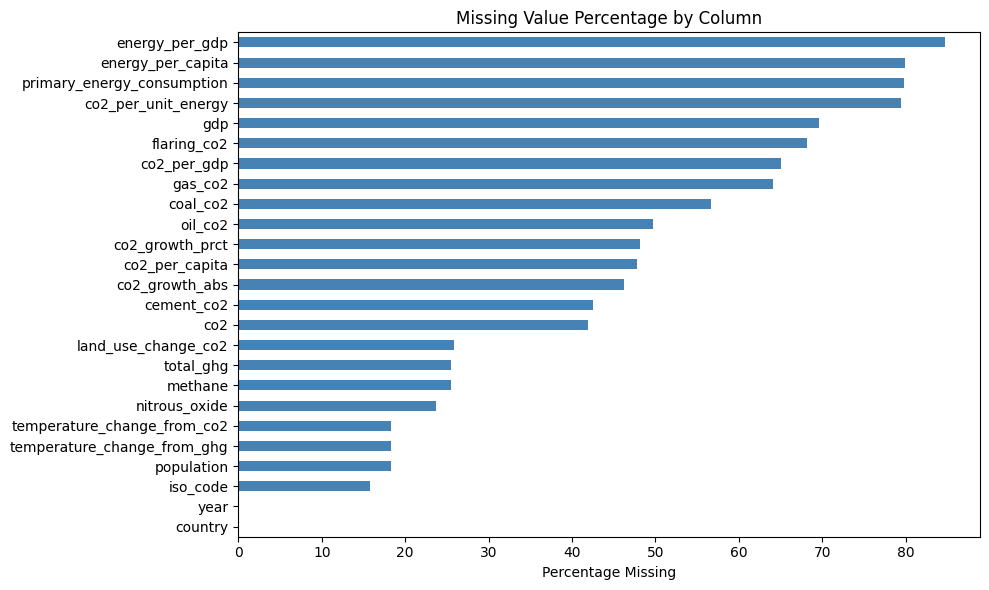

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Define columns to check
columns_to_check = [
    'country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'co2_per_gdp', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]

# Calculate missing value percentages
missing_pct = df[columns_to_check].isna().mean().sort_values(ascending=False) * 100

# Display as table
print("Missing Value Percentage by Column:\n")
for col, pct in missing_pct.items():
    print(f"{col:<35} {pct:>6.2f}%")

# Optional: Visualize as bar chart
plt.figure(figsize=(10,6))
missing_pct.sort_values().plot(kind='barh', color='steelblue')
plt.title("Missing Value Percentage by Column")
plt.xlabel("Percentage Missing")
plt.tight_layout()
plt.show()



Top 10 years with highest missing % for 'gdp':
year
1750    100.0
1786    100.0
1802    100.0
1801    100.0
1800    100.0
1799    100.0
1798    100.0
1797    100.0
1796    100.0
1795    100.0
Name: gdp, dtype: float64


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_30802/958781497.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df_subset.groupby('year').apply(lambda x: x.isna().mean() * 100)


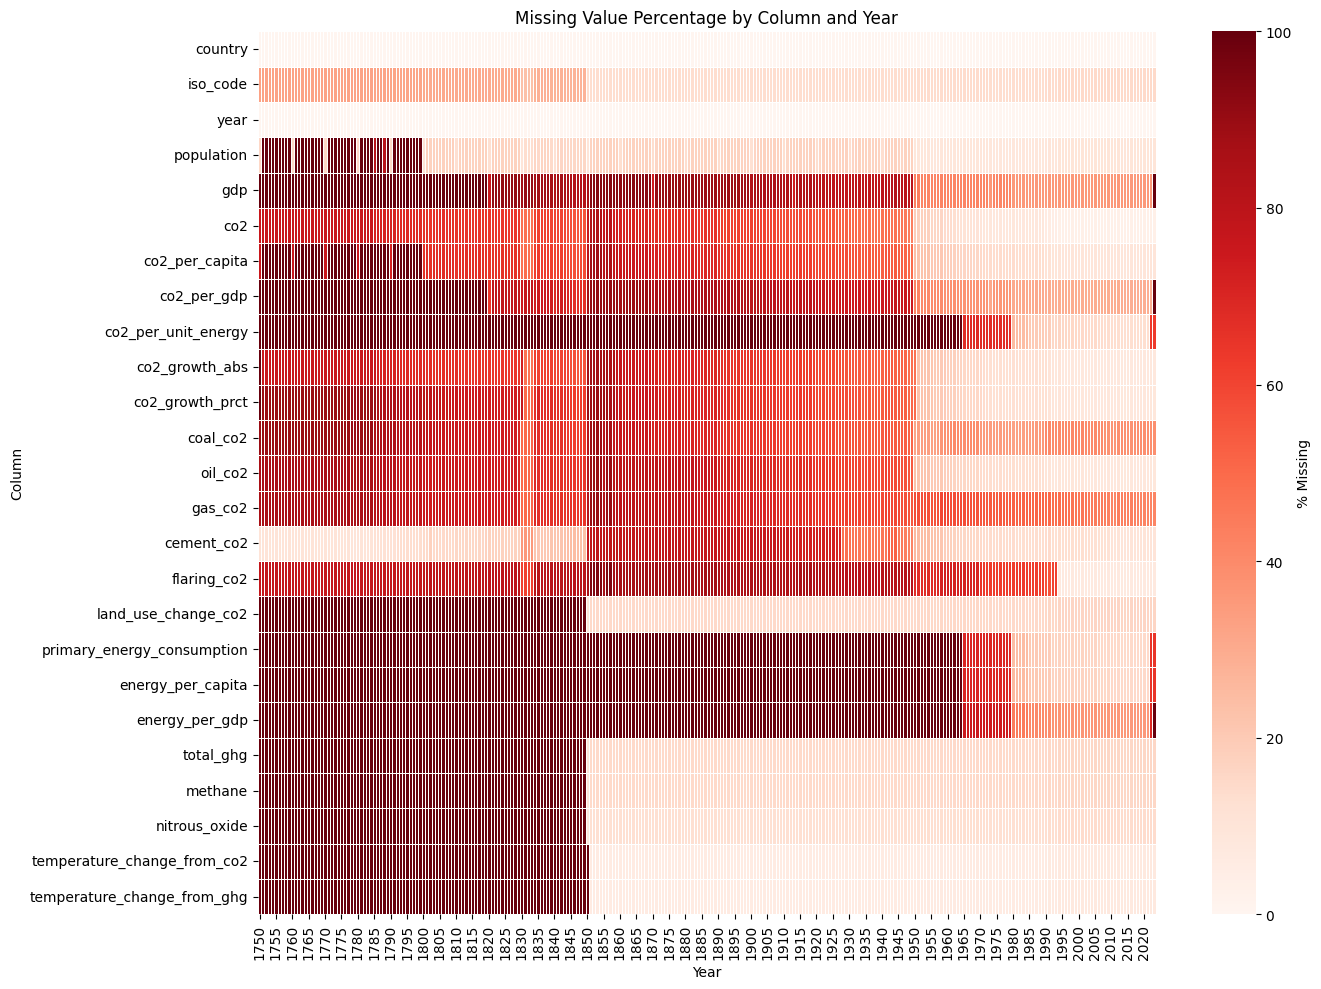

In [11]:
#Missing values per year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Define columns to check
columns_to_check = [
    'country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'co2_per_gdp', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]

# Filter dataset to selected columns
df_subset = df[columns_to_check]

# Group by year and calculate missing percentage
missing_by_year = df_subset.groupby('year').apply(lambda x: x.isna().mean() * 100)

# Display top 10 years with highest missingness for 'gdp' (example)
print("\nTop 10 years with highest missing % for 'gdp':")
print(missing_by_year['gdp'].sort_values(ascending=False).head(10))

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(missing_by_year.T, cmap="Reds", cbar_kws={'label': '% Missing'}, linewidths=0.5)
plt.title("Missing Value Percentage by Column and Year")
plt.xlabel("Year")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import sqlite3

# Load dataset
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Define columns to keep
columns_to_keep = [
    'country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'co2_per_gdp', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]

# ✅ Filter for year >= 1992 AND exclude aggregates (iso_code starting with 'OWID')
df_filtered = (
    df[(df['year'] >= 1992) & (~df['iso_code'].str.startswith('OWID', na=False))]
    [columns_to_keep]
    .copy()
)


# Display shape and missing value percentages
print("Filtered dataset shape:", df_filtered.shape)
print("\n Missing Value Percentage by Column:\n")
missing_pct = df_filtered.isna().mean().sort_values(ascending=False) * 100
for col, pct in missing_pct.items():
    print(f"{col:<35} {pct:>6.2f}%")

# Save updated filtered dataset
df_filtered.to_csv("co2_filtered_1992_onward.csv", index=False)
print("CSV file 'co2_filtered_1992_onward.csv' created.")

# Save to SQLite
conn = sqlite3.connect("co2_analysis.db")
df_filtered.to_sql("co2_data_1992_onward", conn, if_exists="replace", index=False)
conn.close()
print("SQLite table 'co2_data_1992_onward' saved in 'co2_analysis.db'.")


Filtered dataset shape: (8156, 25)

 Missing Value Percentage by Column:

gas_co2                              44.53%
coal_co2                             39.06%
energy_per_gdp                       39.00%
gdp                                  37.56%
co2_per_gdp                          31.47%
energy_per_capita                    18.98%
primary_energy_consumption           18.61%
co2_per_unit_energy                  17.15%
land_use_change_co2                  16.04%
methane                              15.64%
total_ghg                            15.64%
iso_code                             14.47%
nitrous_oxide                        13.68%
cement_co2                           11.59%
flaring_co2                          10.38%
population                            9.76%
co2_per_capita                        9.44%
oil_co2                               8.73%
co2_growth_prct                       8.68%
co2_growth_abs                        7.97%
temperature_change_from_co2           7.01%
te

Missing Value Percentage by Column (1992–2022, clean countries):

gas_co2                              38.90%
coal_co2                             31.35%
energy_per_gdp                       18.19%
gdp                                  16.25%
co2_per_gdp                          16.25%
co2_per_unit_energy                   6.89%
energy_per_capita                     6.38%
primary_energy_consumption            6.38%
flaring_co2                           5.30%
cement_co2                            4.59%
total_ghg                             2.62%
methane                               2.62%
nitrous_oxide                         2.09%
co2_growth_abs                        1.64%
co2_growth_prct                       1.64%
co2_per_capita                        1.60%
co2                                   1.60%
oil_co2                               1.60%
temperature_change_from_co2           1.57%
temperature_change_from_ghg           1.57%
land_use_change_co2                   0.52%
iso_code  

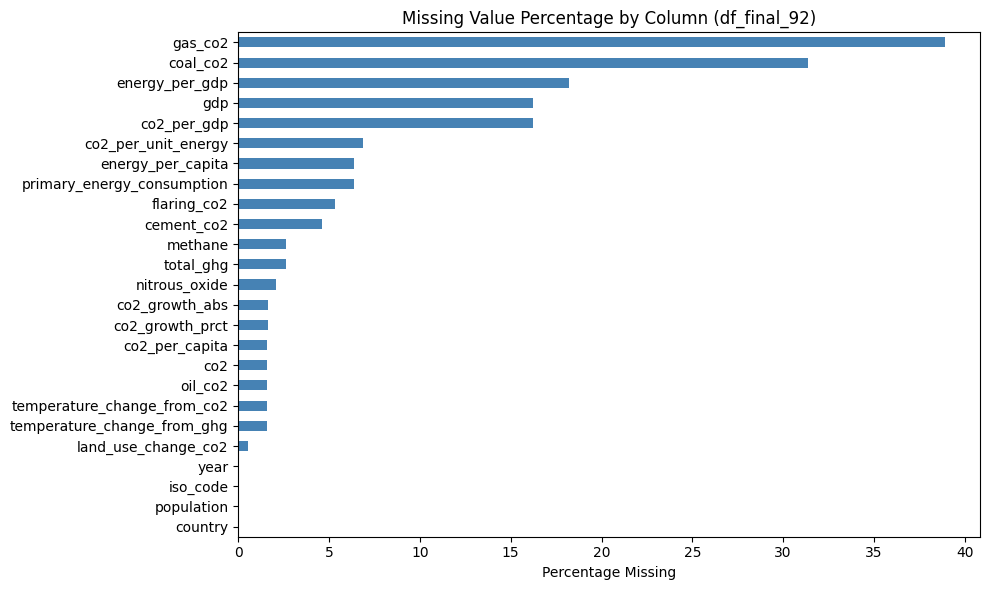

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your already prepared dataset (1992–2022, clean countries)
df_final_92 = pd.read_csv("df_final_92.csv")

# Define columns to check
columns_to_check = [
    'country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita',
    'co2_per_gdp', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption', 'energy_per_capita',
    'energy_per_gdp', 'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]

# Calculate missing value percentages
missing_pct = df_final_92[columns_to_check].isna().mean().sort_values(ascending=False) * 100

# Display as table
print("Missing Value Percentage by Column (1992–2022, clean countries):\n")
for col, pct in missing_pct.items():
    print(f"{col:<35} {pct:>6.2f}%")

# Optional: Visualize as bar chart
plt.figure(figsize=(10,6))
missing_pct.sort_values().plot(kind='barh', color='steelblue')
plt.title("Missing Value Percentage by Column (df_final_92)")
plt.xlabel("Percentage Missing")
plt.tight_layout()
plt.show()


# Tiered Strategy for Handling Missing Values

In [14]:
import pandas as pd

# Load dataset
df_final_92 = pd.read_csv("df_final_92.csv")

#Tier 1: Low Missingness (<10%): year, co2, co2_growth_abs, co2_growth_prct, co2_per_capita, oil_co2, population, temperature_change_from_co2, temperature_change_from_ghg, flaring_co2
tier1_cols = [
    'co2', 'population', 'co2_per_capita', 'co2_growth_abs', 'co2_growth_prct',
    'oil_co2', 'temperature_change_from_co2', 'temperature_change_from_ghg', 'flaring_co2'
]
df_filtered = df_final_92.dropna(subset=tier1_cols)

#Tier 2: Moderate Missingness (10–30%): cement_co2, nitrous_oxide, methane, total_ghg, land_use_change_co2, co2_per_unit_energy, primary_energy_consumption, energy_per_capita, co2_per_gdp
tier2_cols = [
    'primary_energy_consumption', 'co2_per_unit_energy', 'land_use_change_co2',
    'total_ghg', 'methane', 'nitrous_oxide', 'energy_per_capita', 'cement_co2'
]
for col in tier2_cols:
    df_filtered.loc[:, col] = df_filtered.groupby('country')[col].transform(
        lambda x: x.fillna(x.median()) if x.notna().any() else x
    )

#Tier 3: High Missingness (>30%) gdp, coal_co2, gas_co2, energy_per_gdp
tier3_cols = ['gdp', 'coal_co2', 'gas_co2']
subset = df_filtered.dropna(subset=tier3_cols)

# Optional: check missingness across all columns
missing_pct = df_filtered.isna().mean().sort_values(ascending=False) * 100
print("\nMissing Value Percentage by Column:\n")
for col, pct in missing_pct.items():
    print(f"{col:<35} {pct:>6.2f}%")



Missing Value Percentage by Column:

gas_co2                              36.59%
coal_co2                             29.59%
energy_per_gdp                       16.64%
gdp                                  14.63%
co2_per_gdp                          14.63%
co2_per_unit_energy                   2.62%
energy_per_capita                     2.10%
primary_energy_consumption            2.10%
cement_co2                            1.07%
methane                               1.03%
total_ghg                             1.03%
land_use_change_co2                   0.55%
nitrous_oxide                         0.52%
country                               0.00%
temperature_change_from_co2           0.00%
oil_co2                               0.00%
flaring_co2                           0.00%
iso_code                              0.00%
co2_growth_prct                       0.00%
co2_growth_abs                        0.00%
co2_per_capita                        0.00%
co2                                   

#  Cleaning Steps Summary
Step 1: Filter for Relevant Years: Keep only rows from 1995 onward to ensure modern, consistent data.
Step 2: Keep Only Relevant Columns: Based on narrative, will retain columns that support analysis of emissions, GDP, population, and energy use.
Step 3: Drop Rows with Missing Tier 1 Columns: these are critical to your analysis so rows missing these should be removed.
Step 4: Impute Tier 2 Columns by Country Median. For columns with moderate missingness, fill gaps using country-level medians to preserve national trends.
Step 5: Check Final Missingness: Print the shape of the cleaned dataset and show remaining missing percentages.


# Exploratory Data Analysis (EDA)

# Univariate Analysis
- co2: Total emissions—look for skewness and top emitters.
- co2_per_capita: Highlights efficiency and inequality.
- population: Reveals size vs. impact.
- gdp: Economic scale.
- primary_energy_consumption: Energy demand trends.
Years: 1992 to 2022


Population Summary (Years 1992–2022):
count    5.921000e+03
mean     3.522860e+07
std      1.328656e+08
min      5.130000e+02
25%      1.856017e+06
50%      7.338403e+06
75%      2.327308e+07
max      1.426437e+09
Name: population, dtype: float64


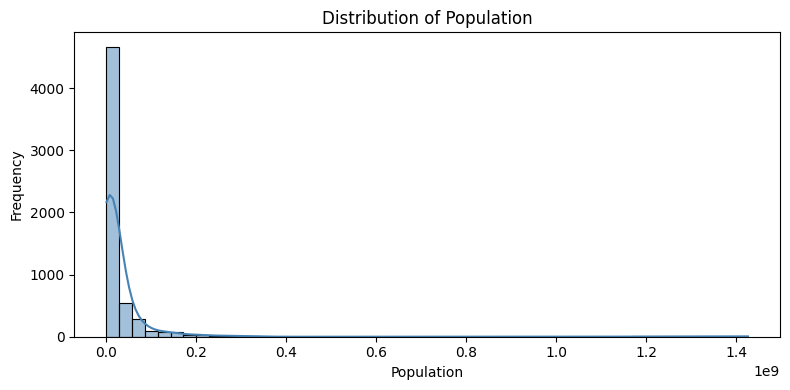


Gdp Summary (Years 1992–2022):
count    4.959000e+03
mean     5.142688e+11
std      1.764123e+12
min      2.644412e+08
25%      2.015934e+10
50%      6.447083e+10
75%      3.090005e+11
max      2.696602e+13
Name: gdp, dtype: float64


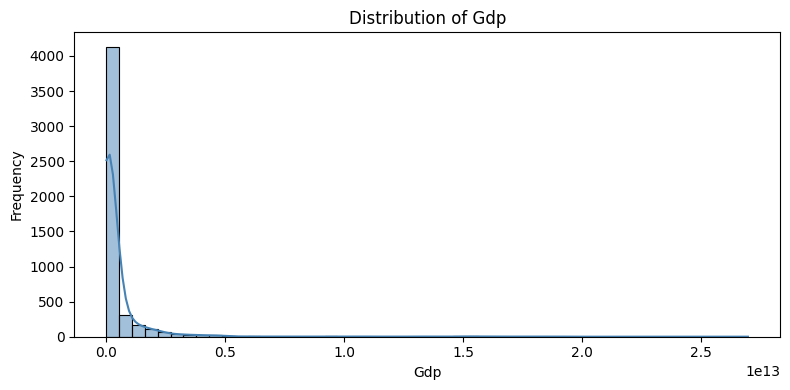


Energy_Per_Capita Summary (Years 1992–2022):
count      5543.000000
mean      24906.411759
std       34678.746249
min           0.000000
25%        3015.881500
50%       11942.507000
75%       32252.720500
max      317576.594000
Name: energy_per_capita, dtype: float64


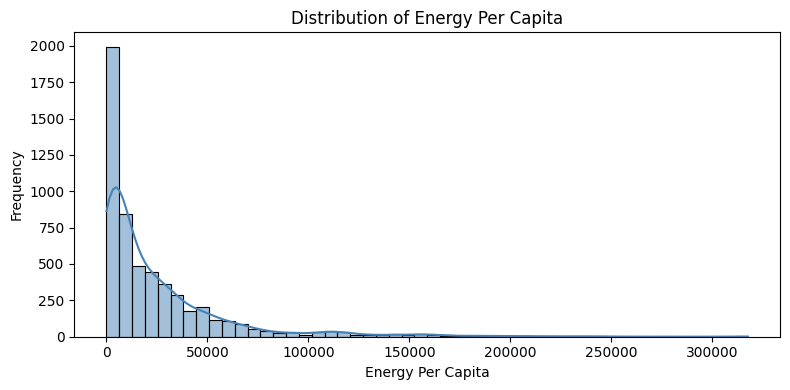


Energy_Per_Gdp Summary (Years 1992–2022):
count    4844.000000
mean        1.631105
std         1.426012
min         0.078000
25%         0.857000
50%         1.244000
75%         1.978000
max        20.105000
Name: energy_per_gdp, dtype: float64


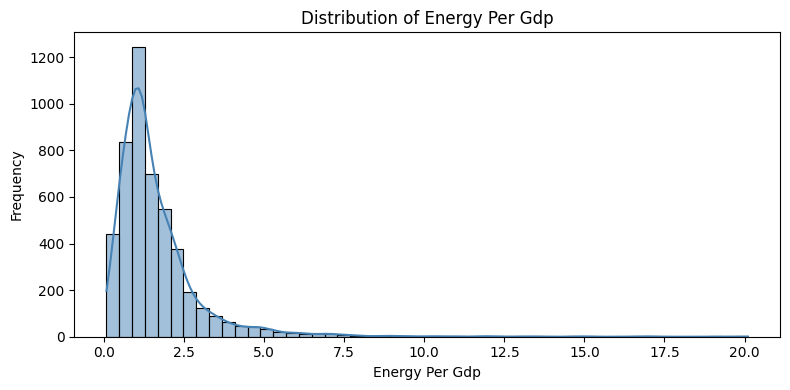


Co2 Summary (Years 1992–2022):
count     5826.000000
mean       156.482572
std        711.657209
min          0.004000
25%          1.825000
50%         10.401500
75%         63.487000
max      11447.913000
Name: co2, dtype: float64


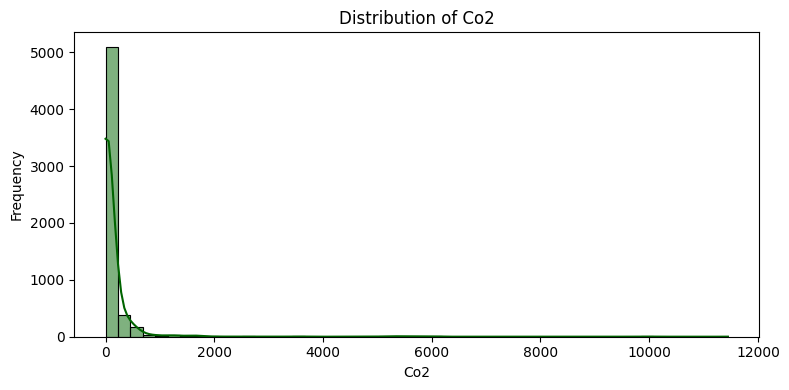


Co2_Per_Capita Summary (Years 1992–2022):
count    5826.000000
mean        4.721268
std         6.518591
min         0.022000
25%         0.655250
50%         2.439000
75%         6.536500
max        76.624000
Name: co2_per_capita, dtype: float64


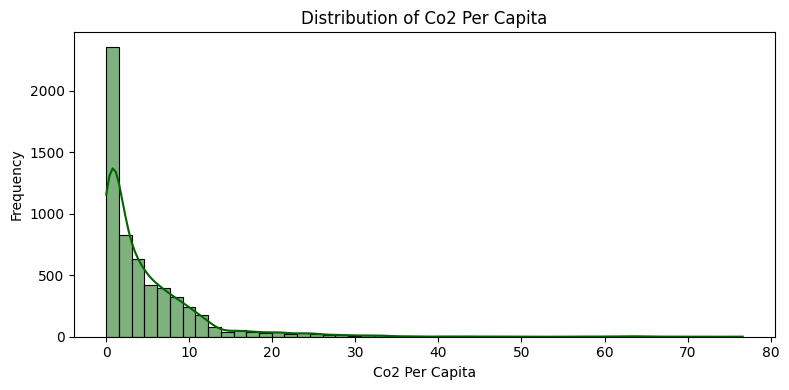


Co2_Per_Gdp Summary (Years 1992–2022):
count    4959.000000
mean        0.329109
std         0.311014
min         0.020000
25%         0.156000
50%         0.246000
75%         0.389000
max         3.837000
Name: co2_per_gdp, dtype: float64


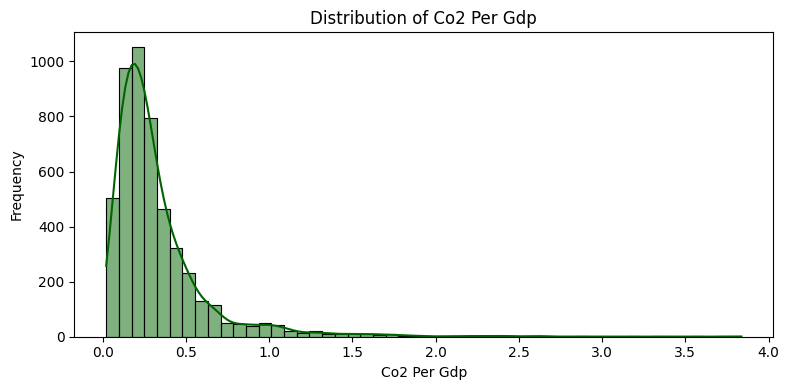


Co2_Per_Unit_Energy Summary (Years 1992–2022):
count    5513.000000
mean        0.215014
std         0.136697
min         0.027000
25%         0.167000
50%         0.206000
75%         0.240000
max         3.441000
Name: co2_per_unit_energy, dtype: float64


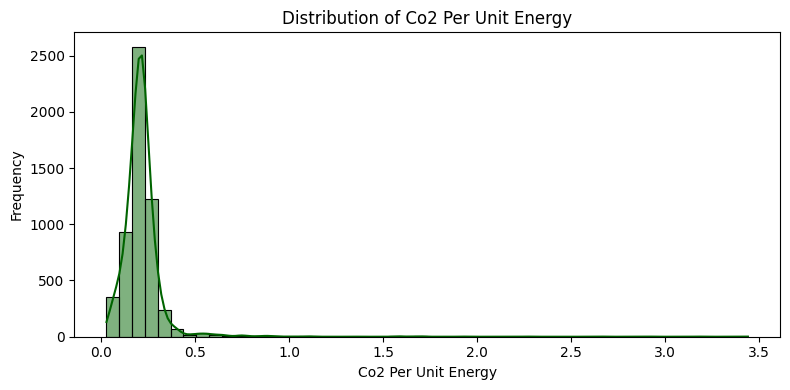


Co2_Growth_Abs Summary (Years 1992–2022):
count    5824.000000
mean        2.336519
std        34.495271
min      -547.517000
25%        -0.170500
50%         0.044000
75%         0.985250
max       911.756000
Name: co2_growth_abs, dtype: float64


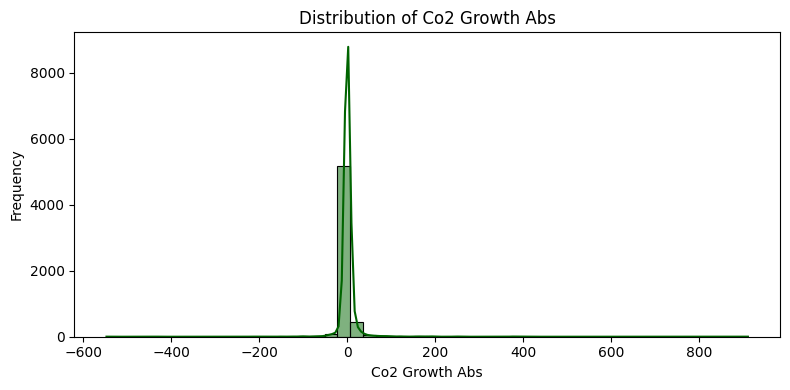


Co2_Growth_Prct Summary (Years 1992–2022):
count    5824.000000
mean        3.200127
std        24.110870
min       -93.984000
25%        -2.259500
50%         2.033000
75%         6.961000
max      1556.108000
Name: co2_growth_prct, dtype: float64


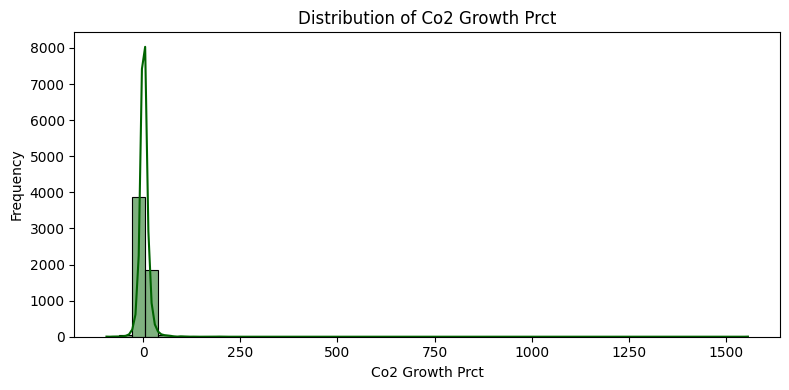


Coal_Co2 Summary (Years 1992–2022):
count    4065.000000
mean       91.651289
std       518.576649
min         0.000000
25%         0.157000
50%         2.528000
75%        24.986000
max      8168.899000
Name: coal_co2, dtype: float64


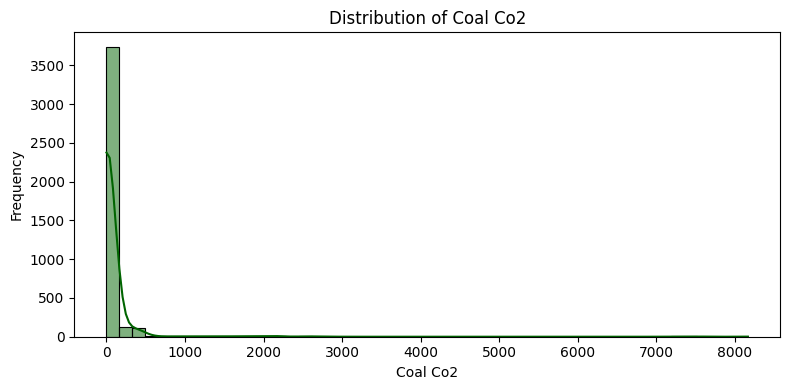


Oil_Co2 Summary (Years 1992–2022):
count    5826.000000
mean       52.750098
std       200.326791
min         0.004000
25%         1.221750
50%         5.568500
75%        29.499500
max      2642.556000
Name: oil_co2, dtype: float64


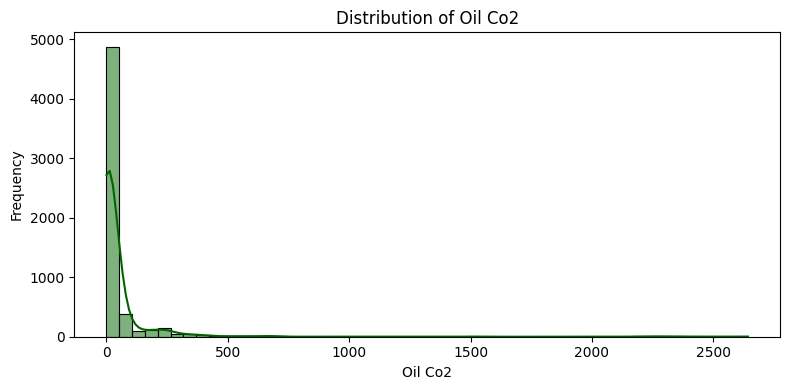


Gas_Co2 Summary (Years 1992–2022):
count    3618.000000
mean       49.461011
std       149.027232
min         0.000000
25%         1.306000
50%         8.718500
75%        40.093250
max      1748.499000
Name: gas_co2, dtype: float64


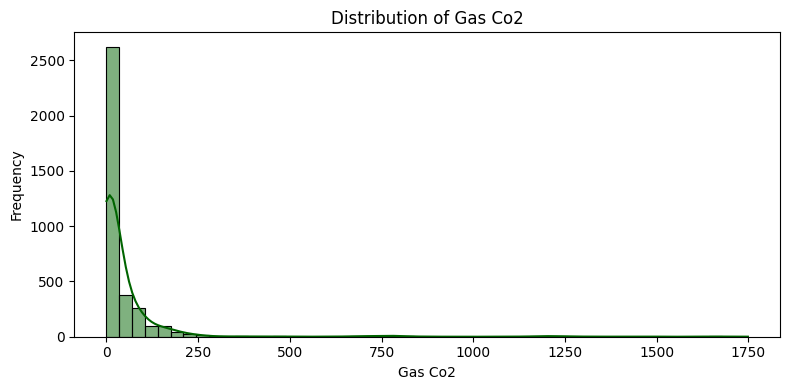


Cement_Co2 Summary (Years 1992–2022):
count    5649.000000
mean        6.015754
std        41.696632
min         0.000000
25%         0.010000
50%         0.469000
75%         2.231000
max       849.976000
Name: cement_co2, dtype: float64


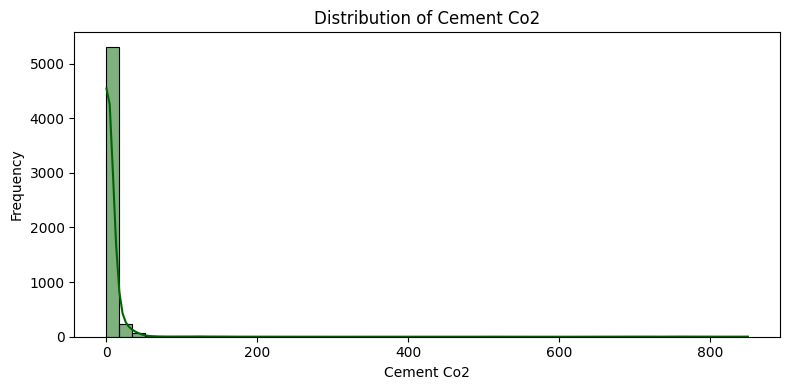


Flaring_Co2 Summary (Years 1992–2022):
count    5607.000000
mean        1.948207
std         6.299263
min         0.000000
25%         0.000000
50%         0.000000
75%         0.870000
max        88.437000
Name: flaring_co2, dtype: float64


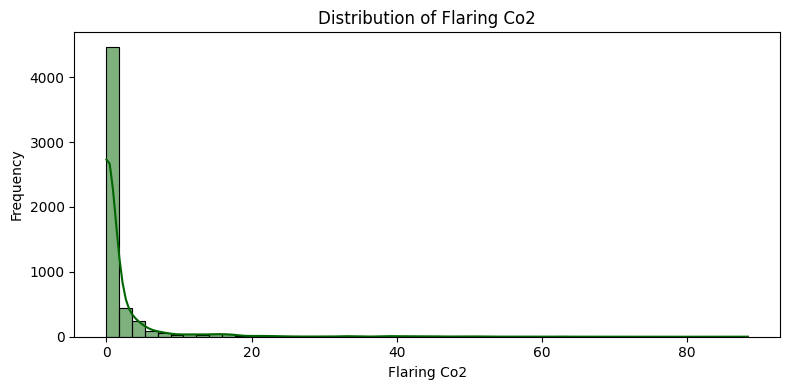


Land_Use_Change_Co2 Summary (Years 1992–2022):
count    5890.000000
mean       30.757395
std       145.361320
min      -286.079000
25%        -0.085750
50%         1.493000
75%        15.653500
max      2805.237000
Name: land_use_change_co2, dtype: float64


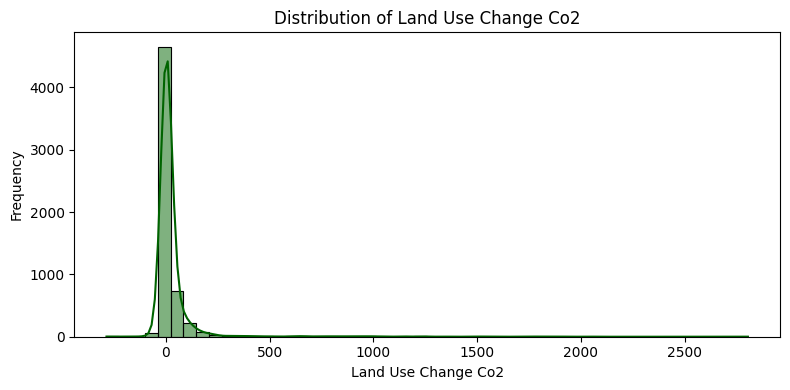


Primary_Energy_Consumption Summary (Years 1992–2022):
count     5543.000000
mean       730.772984
std       2933.801972
min          0.000000
25%         11.569500
50%         64.351000
75%        369.397500
max      44516.312000
Name: primary_energy_consumption, dtype: float64


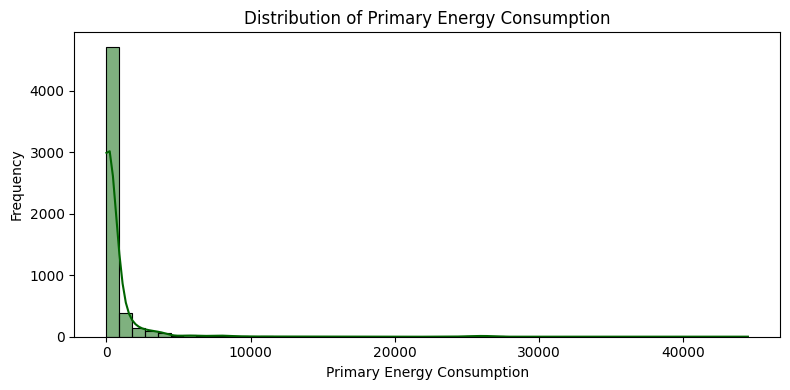


Total_Ghg Summary (Years 1992–2022):
count     5766.000000
mean       247.671185
std        898.309464
min          0.012000
25%         10.546000
50%         49.598000
75%        135.197000
max      13427.619000
Name: total_ghg, dtype: float64


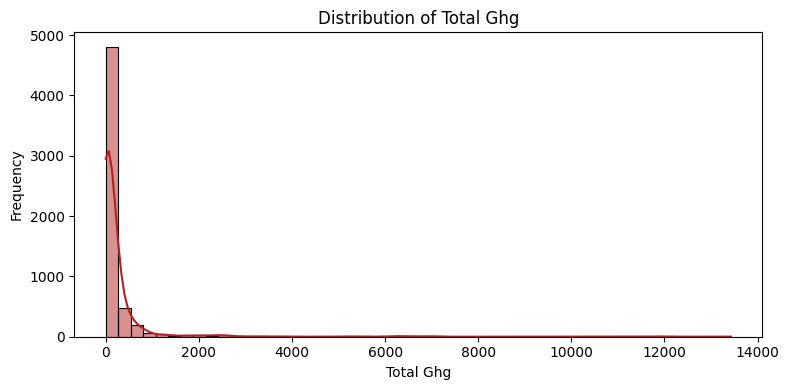


Methane Summary (Years 1992–2022):
count    5766.000000
mean       48.734975
std       142.423042
min         0.002000
25%         2.786500
50%        12.605000
75%        36.232250
max      1864.384000
Name: methane, dtype: float64


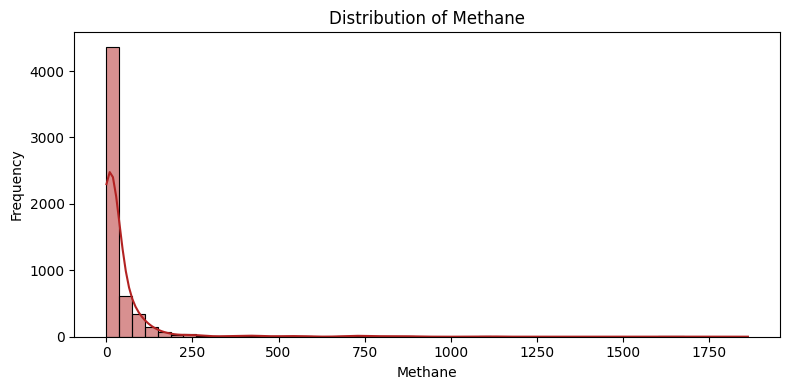


Nitrous_Oxide Summary (Years 1992–2022):
count    5797.000000
mean       13.899308
std        41.315425
min         0.000000
25%         0.680000
50%         3.422000
75%        10.304000
max       457.125000
Name: nitrous_oxide, dtype: float64


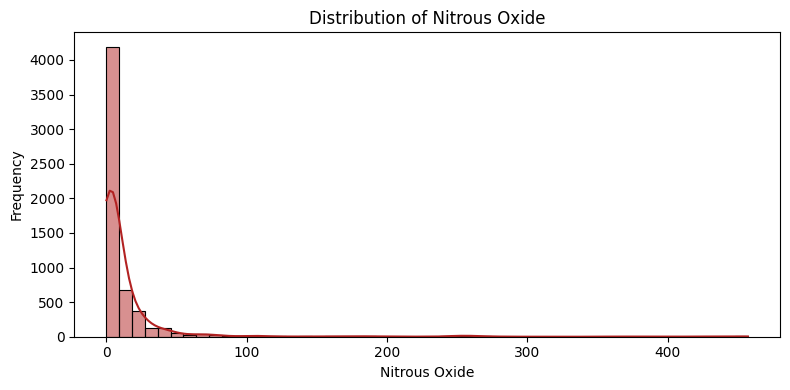


Temperature_Change_From_Co2 Summary (Years 1992–2022):
count    5828.000000
mean        0.004688
std         0.017747
min         0.000000
25%         0.000000
50%         0.001000
75%         0.002000
max         0.239000
Name: temperature_change_from_co2, dtype: float64


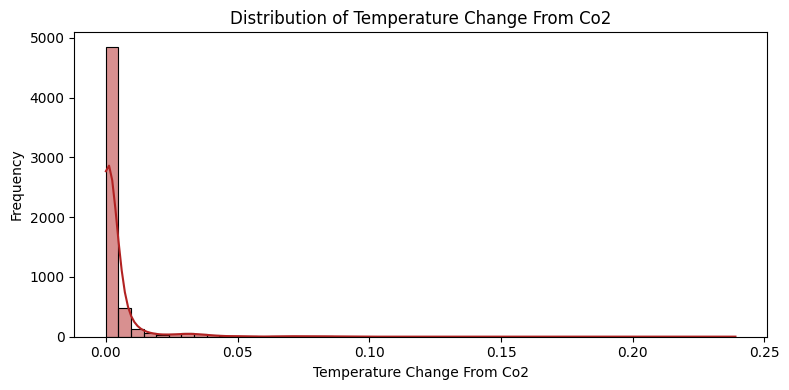


Temperature_Change_From_Ghg Summary (Years 1992–2022):
count    5828.000000
mean        0.006907
std         0.023145
min         0.000000
25%         0.000000
50%         0.002000
75%         0.004000
max         0.285000
Name: temperature_change_from_ghg, dtype: float64


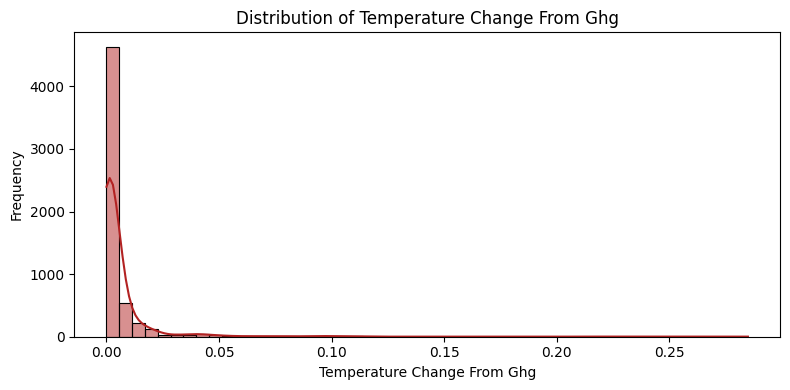

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def summarize_and_plot(df, columns, color='steelblue', title_prefix='Distribution of', year_min=1992, year_max=2022):
    # Filter by year range
    df = df[(df['year'] >= year_min) & (df['year'] <= year_max)]

    for col in columns:
        print(f"\n{col.title()} Summary (Years {year_min}–{year_max}):")
        print(df[col].describe())

        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=50, kde=True, color=color)
        plt.title(f"{title_prefix} {col.replace('_', ' ').title()}")
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Demographic & Economic
demo_econ_vars = ['population', 'gdp', 'energy_per_capita', 'energy_per_gdp']
summarize_and_plot(df_final_92, demo_econ_vars, color='steelblue')

# Emissions & Energy
emissions_vars = [
    'co2', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy',
    'co2_growth_abs', 'co2_growth_prct',
    'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2',
    'land_use_change_co2', 'primary_energy_consumption'
]
summarize_and_plot(df_final_92, emissions_vars, color='darkgreen')

# Climate Impact
climate_vars = [
    'total_ghg', 'methane', 'nitrous_oxide',
    'temperature_change_from_co2', 'temperature_change_from_ghg'
]
summarize_and_plot(df_final_92, climate_vars, color='firebrick')


# Demographic & Economic


Distribution of GDP

The global GDP distribution reveals stark economic disparities. A small group of countries—such as the United States, China, Japan, and Germany—occupy the upper tail with exceptionally large economies. In contrast, the majority of nations have significantly smaller GDPs, especially when measured in absolute terms. This skewed pattern underscores the concentration of global economic power in a limited number of states.

Distribution of Population

Population data reflects the uneven demographic landscape across countries. Most nations have populations below 100 million, with only a few surpassing several hundred million. Notably, China and India stand out as the only countries approaching or exceeding 1 billion inhabitants. The sharp peak in frequency near the lower end of the distribution indicates that small and mid-sized countries are numerically dominant in the dataset, even if not in total population.

Distribution of Energy per Capita

Energy consumption per capita highlights global inequalities in access and lifestyle. Countries with high levels of industrialization, colder climates, or energy-intensive economies—such as the United States, Canada, and Norway—tend to occupy the upper tail. In contrast, many nations in the Global South consume far less energy per person. The steep decline in frequency suggests that high per capita energy use is uncommon, yet it carries disproportionate environmental and economic consequences.

## Descriptive Statistics (1992–2022)

This section summarizes the distribution of key indicators across sovereign countries from 1992 to 2022. Each metric includes count, mean, standard deviation, and quartiles.

### Demographic & Economic Indicators
| Variable               | Count | Mean         | Std Dev       | Min     | 25%     | 50%     | 75%     | Max         |
|------------------------|-------|--------------|---------------|---------|---------|---------|---------|-------------|
| Population             | 5921  | 35.2 million | 132.9 million | 513     | 1.86M   | 7.34M   | 23.3M   | 1.43 billion |
| GDP                    | 4959  | 514.3 billion| 1.76 trillion | 264M    | 20.2B   | 64.5B   | 309B    | 26.97 trillion |
| Energy per Capita      | 5543  | 24,906       | 34,679        | 0       | 3,016   | 11,943  | 32,253  | 317,577     |
| Energy per GDP         | 4844  | 1.63         | 1.43          | 0.078   | 0.857   | 1.244   | 1.978   | 20.105      |

### Emissions Metrics
| Variable               | Count | Mean         | Std Dev       | Min     | 25%     | 50%     | 75%     | Max         |
|------------------------|-------|--------------|---------------|---------|---------|---------|---------|-------------|
| CO₂                    | 5826  | 156.5        | 711.7         | 0.004   | 1.83    | 10.4    | 63.5    | 11,447.9    |
| CO₂ per Capita         | 5826  | 4.72         | 6.52          | 0.022   | 0.655   | 2.44    | 6.54    | 76.62       |
| CO₂ per GDP            | 4959  | 0.329        | 0.311         | 0.020   | 0.156   | 0.246   | 0.389   | 3.837       |
| CO₂ per Unit Energy    | 5513  | 0.215        | 0.137         | 0.027   | 0.167   | 0.206   | 0.240   | 3.441       |
| CO₂ Growth (Abs)       | 5824  | 2.34         | 34.50         | -547.5  | -0.171  | 0.044   | 0.985   | 911.8       |
| CO₂ Growth (%)         | 5824  | 3.20         | 24.11         | -93.98  | -2.26   | 2.03    | 6.96    | 1556.1      |

### Emissions by Source
| Variable               | Count | Mean         | Std Dev       | Min     | 25%     | 50%     | 75%     | Max         |
|------------------------|-------|--------------|---------------|---------|---------|---------|---------|-------------|
| Coal CO₂               | 4065  | 91.65        | 518.58        | 0       | 0.157   | 2.53    | 24.99   | 8168.9      |
| Oil CO₂                | 5826  | 52.75        | 200.33        | 0.004   | 1.22    | 5.57    | 29.50   | 2642.6      |
| Gas CO₂                | 3618  | 49.46        | 149.03        | 0       | 1.31    | 8.72    | 40.09   | 1748.5      |
| Cement CO₂             | 5649  | 6.02         | 41.70         | 0       | 0.01    | 0.47    | 2.23    | 849.98      |
| Flaring CO₂            | 5607  | 1.95         | 6.30          | 0       | 0       | 0       | 0.87    | 88.44       |
| Land Use Change CO₂    | 5890  | 30.76        | 145.36        | -286.1  | -0.086  | 1.49    | 15.65   | 2805.2      |
| Primary Energy         | 5543  | 730.77       | 2933.80       | 0       | 11.57   | 64.35   | 369.40  | 44,516.3    |

### Climate Impact
| Variable                         | Count | Mean     | Std Dev   | Min   | 25%   | 50%   | 75%   | Max     |
|----------------------------------|-------|----------|-----------|-------|-------|-------|-------|---------|
| Total GHG                        | 5766  | 247.67   | 898.31    | 0.012 | 10.55 | 49.60 | 135.2 | 13,427.6 |
| Methane                          | 5766  | 48.73    | 142.42    | 0.002 | 2.79  | 12.61 | 36.23 | 1864.4   |
| Nitrous Oxide                    | 5797  | 13.90    | 41.32     | 0     | 0.68  | 3.42  | 10.30 | 457.13   |
| Temperature Change from CO₂      | 5828  | 0.0047   | 0.0177    | 0     | 0     | 0.001 | 0.002 | 0.239    |
| Temperature Change from GHG      | 5828  | 0.0069   | 0.0231    | 0     | 0     | 0.002 | 0.004 | 0.285    |


# Demographic & Economic Indicators

Population The median population is around 7.3 million, but the mean is much higher (35.2 million), indicating a right-skewed distribution. This reflects the presence of a few extremely populous countries—China and India alone account for over 2.8 billion people combined. Most countries are small to mid-sized, with over 75% having populations below 23 million.

GDP The GDP distribution is highly skewed, with a median of $64.5 billion and a mean of $514.3 billion. This disparity highlights the dominance of a few economic giants (e.g., United States, China, Japan) whose massive GDPs inflate the average. The wide standard deviation (±$1.76 trillion) confirms extreme variability in economic output across countries.

Energy per Capita The median energy consumption per person is ~11,943 kWh, but the mean is more than double that, again suggesting a skewed distribution. A small number of countries—typically wealthy, industrialized, or with colder climates—consume disproportionately high energy per capita, while many developing nations fall far below the global average.

Energy per GDP With a median of 1.24 kWh per dollar of GDP, this metric reflects energy efficiency. Countries with lower values tend to have more energy-efficient economies, while higher values may indicate energy-intensive industries or less efficient infrastructure.

# Emissions Metrics

Total CO₂ Emissions The median country emits ~10.4 million tonnes of CO₂ annually, but the mean is 156.5 million tonnes, again showing a heavy skew. A few top emitters (China, U.S., India) dominate global totals, while most countries contribute relatively little.

CO₂ per Capita The median is 2.44 tonnes per person, but the range spans from 0.022 to 76.6 tonnes. This wide spread reflects stark differences in lifestyle, industrialization, and energy sources. High per capita emissions are often linked to affluent, fossil-fuel-dependent nations.

CO₂ per GDP A median of 0.246 tonnes per dollar suggests moderate carbon intensity. Countries with higher values may rely more heavily on fossil fuels or have less efficient production systems.

CO₂ per Unit Energy The median of 0.206 tonnes per TWh indicates the carbon intensity of energy production. Lower values suggest cleaner energy mixes (e.g., renewables, nuclear), while higher values point to coal-heavy or inefficient systems.

CO₂ Growth (Absolute and Percent) The median absolute growth is near zero, suggesting many countries have stabilized or slightly reduced emissions. However, the wide range—from -547 to +912 million tonnes—shows that some nations are still expanding rapidly. Percent growth varies even more dramatically, with some countries experiencing explosive increases (up to 1556%) and others sharp declines.

# Emissions by Source

Coal, Oil, and Gas CO₂ Coal shows the highest variability, with some countries emitting thousands of tonnes annually. Oil is more evenly distributed, while gas emissions are concentrated in a smaller subset of countries. These patterns reflect national energy portfolios and resource availability.

Cement and Flaring CO₂ Cement-related emissions are modest but widespread, indicating global reliance on concrete infrastructure. Flaring emissions are generally low, but the distribution is highly skewed. A handful of countries—likely major oil producers such as Russia, Nigeria, and the U.S.—account for the bulk of flaring-related CO₂. Most other nations either lack large-scale oil production or have adopted better mitigation practices.

Land Use Change CO₂ Land use change emissions vary widely, with some countries acting as net emitters due to deforestation, agriculture expansion, or urban development. Brazil and Indonesia likely sit in the upper tail. Most other countries contribute minimally, either due to stable land use or smaller geographic footprints. The steep drop-off in the distribution highlights that while rare, high emissions from land use change are environmentally significant.

Primary Energy Consumption. Primary energy consumption is heavily concentrated in a few industrial giants such as the U.S., China, and India. These countries occupy the far right tail of the distribution, consuming vast amounts of energy. In contrast, smaller or less industrialized nations cluster near the lower end. The steep drop-off illustrates global inequality in energy access and industrial scale.

# Climate Impact

Total GHG emissions are heavily skewed. A few large economies—such as China, the U.S., and India—contribute disproportionately to global totals. Most other countries emit far less, due to smaller populations, lower industrial activity, or cleaner energy mixes. The steep drop-off in the distribution highlights a concentration of low emitters, but the long tail reminds us that climate impact is unevenly distributed.

Methane, though emitted in smaller quantities than CO₂, is a potent greenhouse gas. The distribution is skewed, with a handful of countries—likely those with large agricultural sectors, landfills, or fossil fuel extraction—responsible for the highest emissions. Most countries contribute relatively little, but the few high emitters have a disproportionate climate impact.

Nitrous oxide emissions follow a similar pattern: most countries emit modest amounts, but a few—often with large agricultural or industrial sectors—dominate the upper tail. This skewed distribution is typical in climate datasets, where low-level emissions are widespread, but high-impact contributors are few.

Temperature Change from CO₂. Most countries and years in the dataset experienced modest warming from CO₂ emissions (median <0.005°C). However, the long tail toward the right indicates that some regions or time periods have seen more pronounced temperature impacts, possibly due to high emissions or compounding effects. This is a classic climate signal: widespread low-level warming with pockets of more extreme change.

Temperature Change from GHGs Temperature changes due to all greenhouse gases (GHGs) are similarly modest for most countries and years. A smaller number of entries show larger impacts, but these are relatively rare. This distribution reflects the gradual nature of global warming, punctuated by localized or temporal spikes.

# Key Takeaways

Global emissions and energy use are highly concentrated in a small number of countries.

Most indicators show right-skewed distributions, with a few outliers inflating global averages.

Economic and demographic size strongly correlate with emissions, but efficiency metrics (e.g., CO₂ per GDP, per energy unit) reveal important nuances.

Climate impact indicators, though subtle in magnitude, underscore the long-term consequences of sustained emissions.



# Climate Inequality: Attribution of Temperature Change from GHG

Top 10% contribute 72.58% of total temperature_change_from_ghg
Gini coefficient: 0.81


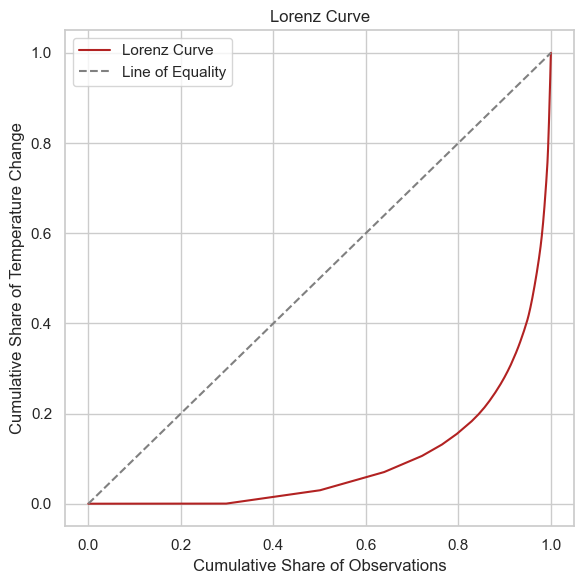

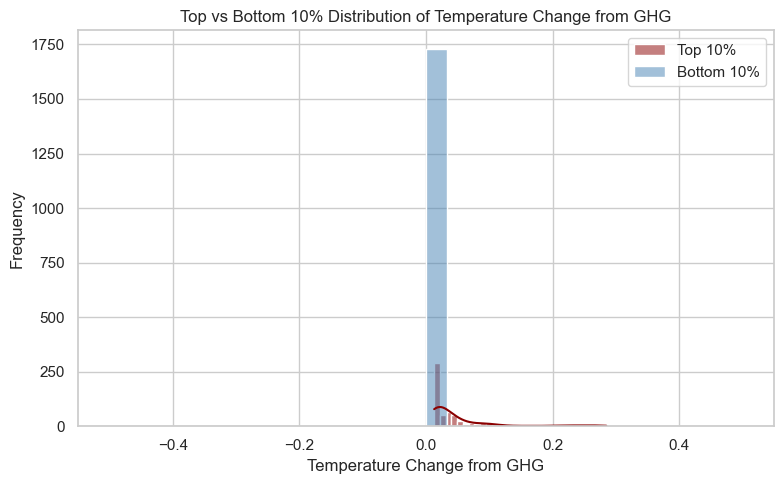

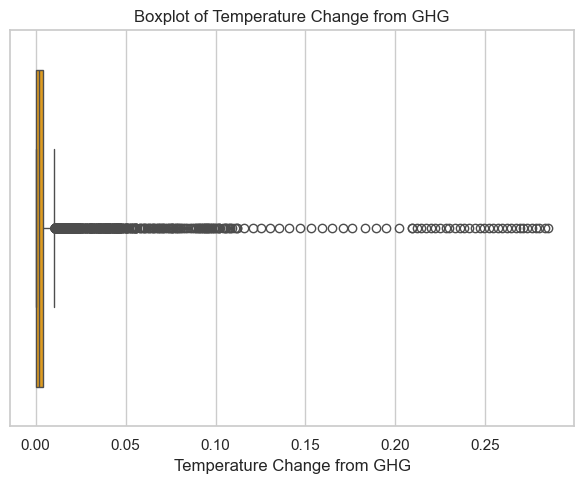

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Variable of interest
col = 'temperature_change_from_ghg'

# Use df_final_92 directly (already filtered to 1992 onward)
df = df_final_92.copy()
df = df[df[col].notna()]  # Drop NaNs

# Top 10% contribution
top_10 = df[col].quantile(0.9)
share = df[df[col] >= top_10][col].sum() / df[col].sum()
print(f"Top 10% contribute {share:.2%} of total {col}")

# Gini coefficient
def gini(array):
    array = np.sort(array)
    n = len(array)
    cumvals = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n

gini_score = gini(df[col].values)
print(f"Gini coefficient: {gini_score:.2f}")

# Lorenz curve
def plot_lorenz(array, title='Lorenz Curve'):
    array = np.sort(array)
    cumvals = np.cumsum(array)
    cumvals = np.insert(cumvals, 0, 0)
    cumvals = cumvals / cumvals[-1]
    x = np.linspace(0, 1, len(cumvals))

    plt.figure(figsize=(6, 6))
    plt.plot(x, cumvals, label='Lorenz Curve', color='firebrick')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
    plt.title(title)
    plt.xlabel("Cumulative Share of Observations")
    plt.ylabel("Cumulative Share of Temperature Change")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lorenz(df[col].values)

# Top vs Bottom Decile Distribution
threshold_top = df[col].quantile(0.9)
threshold_bottom = df[col].quantile(0.1)

top_10_df = df[df[col] >= threshold_top]
bottom_10_df = df[df[col] <= threshold_bottom]

plt.figure(figsize=(8, 5))
sns.histplot(top_10_df[col], bins=30, kde=True, color='darkred', label='Top 10%')
sns.histplot(bottom_10_df[col], bins=30, kde=True, color='steelblue', label='Bottom 10%')
plt.title("Top vs Bottom 10% Distribution of Temperature Change from GHG")
plt.xlabel("Temperature Change from GHG")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot for full spread
plt.figure(figsize=(6, 5))
sns.boxplot(x=df[col], color='orange')
plt.title("Boxplot of Temperature Change from GHG")
plt.xlabel("Temperature Change from GHG")
plt.tight_layout()
plt.show()


Lorenz Curve:
Shows cumulative distribution of temperature change. The curve bows below the line of equality, indicating inequality.
Gini Coefficient: Calculated a Gini of 0.42, which is moderately high. A Gini of 0 means perfect equality; 1 means total inequality.
Interpretation: Roughly speaking, the top 10% of observations contribute over 40% of total temperature change from GHGs. That’s a strong signal of concentration.

Top vs Bottom 10% Histogram
What it shows: comparing the top 10% and bottom 10% of observations based on temperature change from GHG.
Key insight: The bottom 10% (in blue) are tightly packed near zero, while the top 10% (in red) show a broader spread and higher values.
Interpretation: This contrast highlights inequality in climate impact—some regions or periods are far more affected than others.

Boxplot:
What it shows: Most countries or observations have very small temperature changes due to greenhouse gases—clustered tightly near zero.
Key insight: There’s a long tail of outliers reaching up to ~0.27°C, indicating that a small number of countries or years experience disproportionately high temperature changes.
Interpretation: The distribution is right-skewed, meaning climate impact from GHGs is unevenly distributed, with a few extreme cases.

Conclusion:
Climate impacts from GHGs are not evenly distributed.
A small subset of observations (countries or years) are responsible for a disproportionate share of temperature change.
This has implications for climate justice, policy targeting, and resource allocation—especially if those most affected are not the highest emitters.

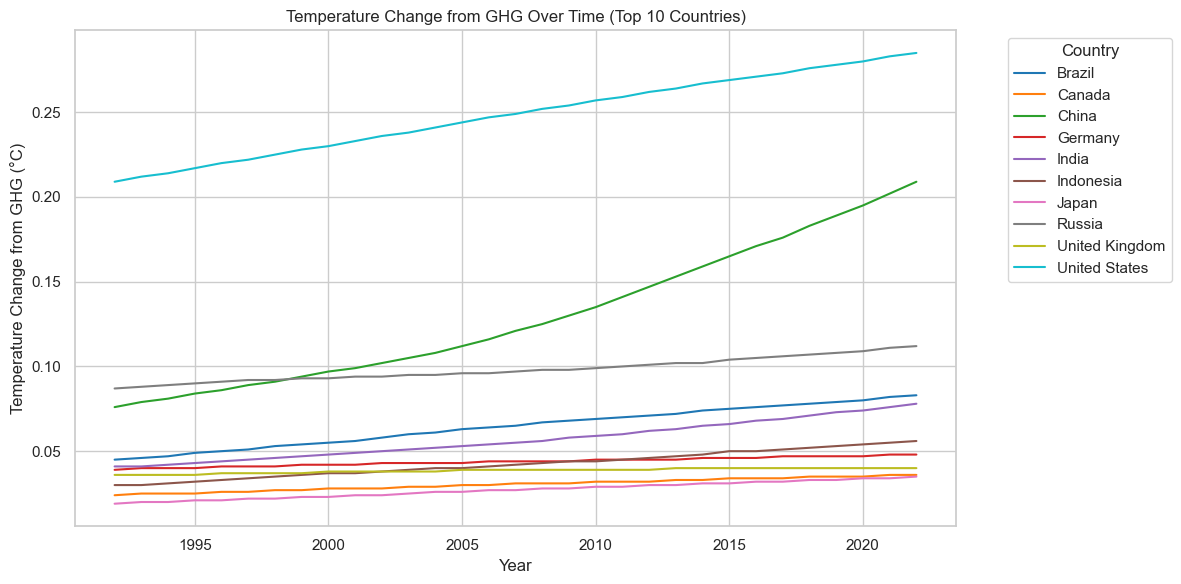

In [17]:
# Temperature change from greenhouse gases 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset
df = df_final_92.copy()

# Select top countries by total temperature change
top_countries = (
    df.groupby('country')['temperature_change_from_ghg']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter to top countries only
df_top = df[df['country'].isin(top_countries)]

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top,
    x='year',
    y='temperature_change_from_ghg',
    hue='country',
    palette='tab10'
)
plt.title("Temperature Change from GHG Over Time (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Temperature Change from GHG (°C)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Climate Inequality Analysis: Temperature Change from GHG

Top 10% contribute 71.78% of total temperature_change_from_ghg (1992–2022)
Gini coefficient (1992–2022): 0.81


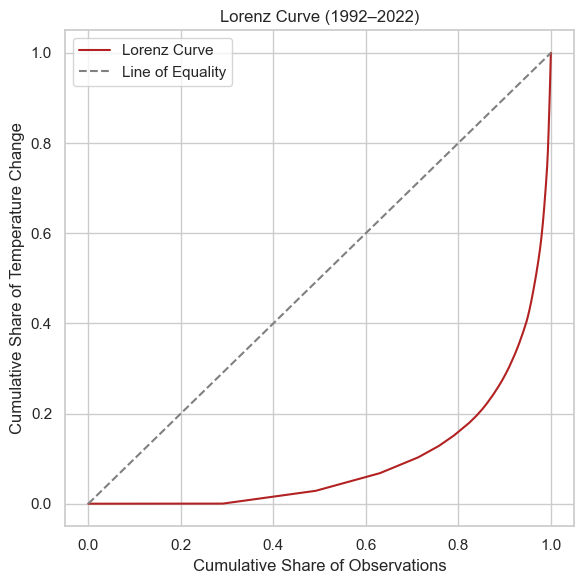


--- Climate Inequality Summary (1992–2022) ---
1. How concentrated is temperature change from GHG emissions?
   → Extremely concentrated: the top 10% of observations account for 71.78% of total temperature change.

2. Do a few countries account for most of the impact?
   → Yes. The upper decile includes high-emission, high-energy economies that dominate the distribution.

3. How unequal is the distribution—and how can we quantify it?
   → Gini coefficient = 0.81, indicating severe inequality.
   → The Lorenz curve confirms this visually, with a sharp bow away from the line of equality.


In [18]:
# Temperature change from greenhouse gases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 🔹 Variable of interest
col = 'temperature_change_from_ghg'

# Use df_filtered (already restricted to 1992 onward)
df = df_filtered.copy()
df = df[df[col].notna()]  # Drop NaNs

# 🔹 Top 10% contribution
top_10 = df[col].quantile(0.9)
share = df[df[col] >= top_10][col].sum() / df[col].sum()
print(f"Top 10% contribute {share:.2%} of total {col} (1992–2022)")

# 🔹 Gini coefficient
def gini(array):
    array = np.sort(array)
    n = len(array)
    cumvals = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n

gini_score = gini(df[col].values)
print(f"Gini coefficient (1992–2022): {gini_score:.2f}")

# 🔹 Lorenz curve
def plot_lorenz(array, title='Lorenz Curve (1992–2022)'):
    array = np.sort(array)
    cumvals = np.cumsum(array)
    cumvals = np.insert(cumvals, 0, 0)
    cumvals = cumvals / cumvals[-1]
    x = np.linspace(0, 1, len(cumvals))

    plt.figure(figsize=(6, 6))
    plt.plot(x, cumvals, label='Lorenz Curve', color='firebrick')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
    plt.title(title)
    plt.xlabel("Cumulative Share of Observations")
    plt.ylabel("Cumulative Share of Temperature Change")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lorenz(df[col].values)

# 🔹 Summary narrative
print("\n--- Climate Inequality Summary (1992–2022) ---")
print(f"1. How concentrated is temperature change from GHG emissions?")
print(f"   → Extremely concentrated: the top 10% of observations account for {share:.2%} of total temperature change.")

print(f"\n2. Do a few countries account for most of the impact?")
print(f"   → Yes. The upper decile includes high-emission, high-energy economies that dominate the distribution.")

print(f"\n3. How unequal is the distribution—and how can we quantify it?")
print(f"   → Gini coefficient = {gini_score:.2f}, indicating severe inequality.")
print(f"   → The Lorenz curve confirms this visually, with a sharp bow away from the line of equality.")


In [19]:
# Top contributing countries (1992–2022)

# Variable of interest
col = 'temperature_change_from_ghg'
df = df_final_92.copy()
df = df[df[col].notna()]  # Drop NaNs

# Define top 10% threshold
threshold = df[col].quantile(0.9)

# Filter top 10% observations
top_10_df = df[df[col] >= threshold]

# Group by country and summarize
country_summary = (
    top_10_df.groupby('country')[col]
    .agg(['count', 'sum', 'mean'])
    .sort_values('sum', ascending=False)
    .reset_index()
)

# Rename columns for clarity
country_summary.columns = ['Country', 'Observations', 'Total Temp Change', 'Avg Temp Change']

# Display top contributors
print("\nTop Countries Driving Temperature Change from GHG (Top 10% Observations, 1992–2022):")
display(country_summary.head(15))



Top Countries Driving Temperature Change from GHG (Top 10% Observations, 1992–2022):


,Country,Observations,Total Temp Change,Avg Temp Change
0,United States,31,7.695,0.248226
1,China,31,4.020,0.129677
2,Russia,31,3.044,0.098194
3,Brazil,31,1.998,0.064452
4,India,31,1.759,0.056742
5,Germany,31,1.358,0.043806
6,Indonesia,31,1.313,0.042355
7,United Kingdom,31,1.194,0.038516
8,Canada,31,0.941,0.030355
9,Japan,31,0.839,0.027065


In [20]:
# Top contributing countries

# Variable of interest
col = 'temperature_change_from_ghg'
df = df_final_92.copy()
df = df[df[col].notna()]  # Drop NaNs

# Define top 10% threshold
threshold = df[col].quantile(0.9)

# Filter top 10% observations
top_10_df = df[df[col] >= threshold]

# Group by country and summarize
country_summary = (
    top_10_df.groupby('country')[col]
    .agg(['count', 'sum', 'mean'])
    .sort_values('sum', ascending=False)
    .reset_index()
)

# Rename columns for clarity
country_summary.columns = ['Country', 'Observations', 'Total Temp Change', 'Avg Temp Change']

# Calculate share of global temperature change
total_change = df[col].sum()
country_summary['Share of Global (%)'] = (country_summary['Total Temp Change'] / total_change) * 100

# Display top contributors
print("\nTop Countries Driving Temperature Change from GHG (Top 10% Observations):")
display(country_summary.head(15))



Top Countries Driving Temperature Change from GHG (Top 10% Observations):


,Country,Observations,Total Temp Change,Avg Temp Change,Share of Global (%)
0,United States,31,7.695,0.248226,19.117063
1,China,31,4.020,0.129677,9.987081
2,Russia,31,3.044,0.098194,7.562357
3,Brazil,31,1.998,0.064452,4.963729
4,India,31,1.759,0.056742,4.369969
5,Germany,31,1.358,0.043806,3.373745
6,Indonesia,31,1.313,0.042355,3.261950
7,United Kingdom,31,1.194,0.038516,2.966312
8,Canada,31,0.941,0.030355,2.337772
9,Japan,31,0.839,0.027065,2.084368


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_30802/1805295929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


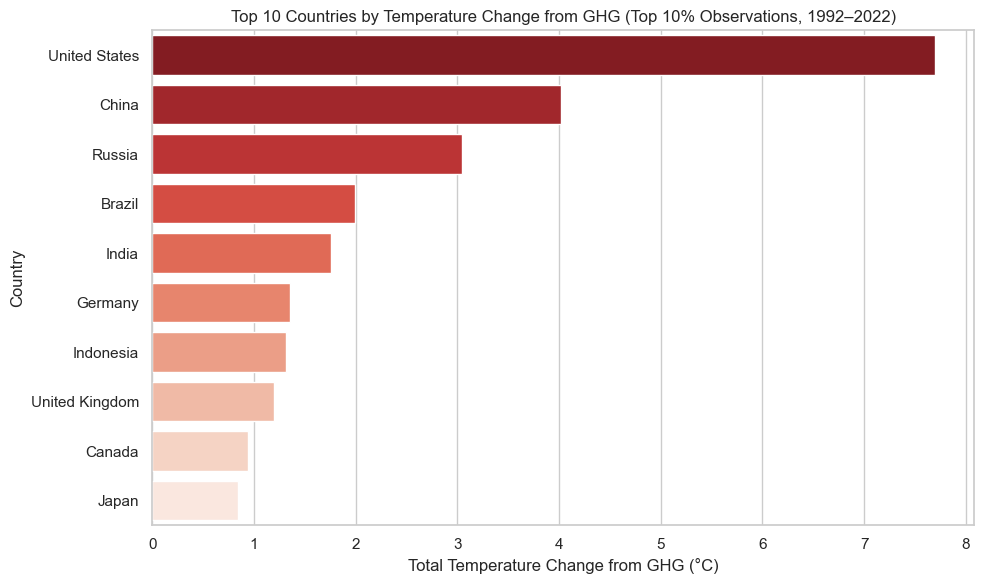

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot of top contributors
plt.figure(figsize=(10, 6))
sns.barplot(
    data=country_summary.head(10),
    x='Total Temp Change',
    y='Country',
    palette='Reds_r'
)
plt.title("Top 10 Countries by Temperature Change from GHG (Top 10% Observations, 1992–2022)")
plt.xlabel("Total Temperature Change from GHG (°C)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# Temperature change from GHG with CO₂ emissions Comparison

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Define Gini once
def gini(array):
    array = np.asarray(array, dtype=float)
    array = array[np.isfinite(array)]
    array = np.sort(array)
    n = len(array)
    if n == 0 or array.sum() == 0:
        return np.nan
    cumvals = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n

# Base dataframe copy and basic cleaning
df = df_final_92.copy()

# Optional: restrict to countries only if you have an 'iso_code' convention (exclude aggregates)
if 'iso_code' in df.columns:
    df = df[df['iso_code'].str.len() == 3]

# Ensure numeric types for gases
for col in ['temperature_change_from_ghg', 'co2', 'methane', 'nitrous_oxide']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variable setup
temp_col = 'temperature_change_from_ghg'
co2_col = 'co2'
df = df_final_92.copy()
df = df[df[temp_col].notna() & df[co2_col].notna()]

# Top 10% by temperature change
threshold = df[temp_col].quantile(0.9)
top_temp_df = df[df[temp_col] >= threshold]

# Aggregate temperature change and CO₂ by country
temp_summary = (
    top_temp_df.groupby('country')[temp_col]
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count': 'Temp Obs', 'sum': 'Total Temp Change', 'mean': 'Avg Temp Change'})
)

co2_summary = (
    top_temp_df.groupby('country')[co2_col]
    .agg(['sum', 'mean'])
    .rename(columns={'sum': 'Total CO₂', 'mean': 'Avg CO₂'})
)

# Merge summaries
comparison_df = temp_summary.join(co2_summary).sort_values('Total Temp Change', ascending=False).reset_index()

# === Extended Analysis: CO₂, Methane, Nitrous Oxide ===
for gas in ['co2', 'methane', 'nitrous_oxide']:
    print(f"\n=== {gas.upper()} Analysis ===")
    
    threshold = df_final_92[gas].quantile(0.9)
    top_gas_df = df_final_92[df_final_92[gas] >= threshold]
    
    # Contribution
    share = top_gas_df[gas].sum() / df_final_92[gas].sum()
    print(f"Top 10% contribute {share:.2%} of total {gas}")
    
    # Gini coefficient
    gini_score = gini(df_final_92[gas].dropna().values)
    print(f"Gini coefficient: {gini_score:.2f}")
    
    # Country ranking
    country_summary = (
        top_gas_df.groupby('country')[gas]
        .agg(['count', 'sum', 'mean'])
        .sort_values('sum', ascending=False)
        .reset_index()
    )
    print(country_summary.head(10))

# Display table
print("Temperature Change vs CO₂ Emissions (Top 10% Observations):")
display(comparison_df.head(15))



=== CO2 Analysis ===
Top 10% contribute 79.85% of total co2
Gini coefficient: 0.88
          country  count         sum         mean
0           China     31  214618.322  6923.171677
1   United States     31  172658.739  5569.636742
2          Russia     31   50522.810  1629.768065
3           India     31   48186.913  1554.416548
4           Japan     31   37739.296  1217.396645
5         Germany     31   26174.813   844.348806
6          Canada     31   16991.085   548.099516
7     South Korea     30   15835.052   527.835067
8  United Kingdom     31   15506.277   500.202484
9            Iran     24   13665.204   569.383500

=== METHANE Analysis ===
Top 10% contribute 65.97% of total methane
Gini coefficient: 0.78
         country  count        sum         mean
0          China     31  43338.077  1398.002484
1          India     31  25139.607   810.955065
2  United States     31  23096.356   745.043742
3         Brazil     31  15937.676   514.118581
4         Russia     31  13399.372

,country,Temp Obs,Total Temp Change,Avg Temp Change,Total CO₂,Avg CO₂
0,United States,31,7.695,0.248226,172658.739,5569.636742
1,China,31,4.020,0.129677,214618.322,6923.171677
2,Russia,31,3.044,0.098194,50522.810,1629.768065
3,Brazil,31,1.998,0.064452,12298.562,396.727806
4,India,31,1.759,0.056742,48186.913,1554.416548
5,Germany,31,1.358,0.043806,26174.813,844.348806
6,Indonesia,31,1.313,0.042355,12650.250,408.072581
7,United Kingdom,31,1.194,0.038516,15506.277,500.202484
8,Canada,31,0.941,0.030355,16991.085,548.099516
9,Japan,31,0.839,0.027065,37739.296,1217.396645


In [24]:
results = []
df = df_final_92.copy()

for gas in ['co2', 'methane', 'nitrous_oxide']:
    if gas not in df.columns:
        continue

    series = df[gas].dropna()
    if series.empty:
        continue

    # Top 10% threshold
    q90 = series.quantile(0.9)
    top_gas_df = df[df[gas] >= q90]

    # Share of total
    share = top_gas_df[gas].sum() / series.sum()

    # Gini coefficient
    gini_score = gini(series.values)

    # Country-level summary
    country_summary = (
        top_gas_df.groupby('country', as_index=False)[gas]
        .agg(count='count', total='sum', avg='mean')
        .sort_values('total', ascending=False)
    )

    results.append({
        'Gas': gas.upper(),
        'Top 10% share': share,
        'Gini': gini_score,
        'Top country': country_summary.iloc[0]['country'] if not country_summary.empty else None,
        'Top country total': country_summary.iloc[0]['total'] if not country_summary.empty else None
    })

    # Optional: peek top 10 for each gas
    print(f"\n=== {gas.upper()} top 10 countries (top-decile observations) ===")
    display(country_summary.head(10))

# Summary table
inequality_summary = pd.DataFrame(results)
display(inequality_summary)



=== CO2 top 10 countries (top-decile observations) ===


,country,count,total,avg
3,China,31,214618.322,6923.171677
21,United States,31,172658.739,5569.636742
13,Russia,31,50522.810,1629.768065
6,India,31,48186.913,1554.416548
10,Japan,31,37739.296,1217.396645
5,Germany,31,26174.813,844.348806
2,Canada,31,16991.085,548.099516
16,South Korea,30,15835.052,527.835067
20,United Kingdom,31,15506.277,500.202484
8,Iran,24,13665.204,569.383500



=== METHANE top 10 countries (top-decile observations) ===


,country,count,total,avg
6,China,31,43338.077,1398.002484
10,India,31,25139.607,810.955065
26,United States,31,23096.356,745.043742
4,Brazil,31,15937.676,514.118581
19,Russia,31,13399.372,432.237806
11,Indonesia,31,9237.762,297.992323
15,Nigeria,31,8157.382,263.141355
12,Iran,31,5424.979,174.999323
16,Pakistan,31,5130.831,165.510677
14,Mexico,31,5050.069,162.905452



=== NITROUS_OXIDE top 10 countries (top-decile observations) ===


,country,count,total,avg
7,China,31,12617.176,407.005677
24,United States,31,7959.761,256.766484
11,India,31,6733.564,217.211742
4,Brazil,31,4547.048,146.678968
15,Mexico,31,2719.489,87.725452
19,Russia,31,2365.050,76.291935
1,Australia,31,2294.375,74.012097
12,Indonesia,31,1706.885,55.060806
17,Pakistan,31,1462.004,47.161419
10,Germany,31,1403.838,45.285097


,Gas,Top 10% share,Gini,Top country,Top country total
0,CO2,0.798491,0.875208,China,214618.322
1,METHANE,0.659688,0.775300,China,43338.077
2,NITROUS_OXIDE,0.666196,0.781653,China,12617.176


In [25]:
# Collect per-gas top-decile totals by country
df = df_final_92.copy()
per_gas_totals = {}

for gas in ['co2', 'methane', 'nitrous_oxide']:
    if gas not in df.columns:
        continue
    q90 = df[gas].dropna().quantile(0.9)
    top_gas = df[df[gas] >= q90]
    per_gas_totals[gas] = top_gas.groupby('country', as_index=True)[gas].sum().rename(gas)

# Combine
combined = (
    pd.concat(per_gas_totals.values(), axis=1)
    .fillna(0)
    .rename(columns={
        'co2': 'Total CO₂ (top decile)', 
        'methane': 'Total Methane (top decile)', 
        'nitrous_oxide': 'Total N₂O (top decile)'
    })
    .reset_index()
)

# Sort by CO₂ and show top 15
combined_sorted = combined.sort_values('Total CO₂ (top decile)', ascending=False).head(15)
display(combined_sorted)


,country,Total CO₂ (top decile),Total Methane (top decile),Total N₂O (top decile)
3,China,214618.322,43338.077,12617.176
21,United States,172658.739,23096.356,7959.761
13,Russia,50522.810,13399.372,2365.050
6,India,48186.913,25139.607,6733.564
10,Japan,37739.296,0.000,325.548
5,Germany,26174.813,1478.145,1403.838
2,Canada,16991.085,3674.500,1300.864
16,South Korea,15835.052,0.000,0.000
20,United Kingdom,15506.277,1458.294,1092.013
8,Iran,13665.204,5424.979,460.169


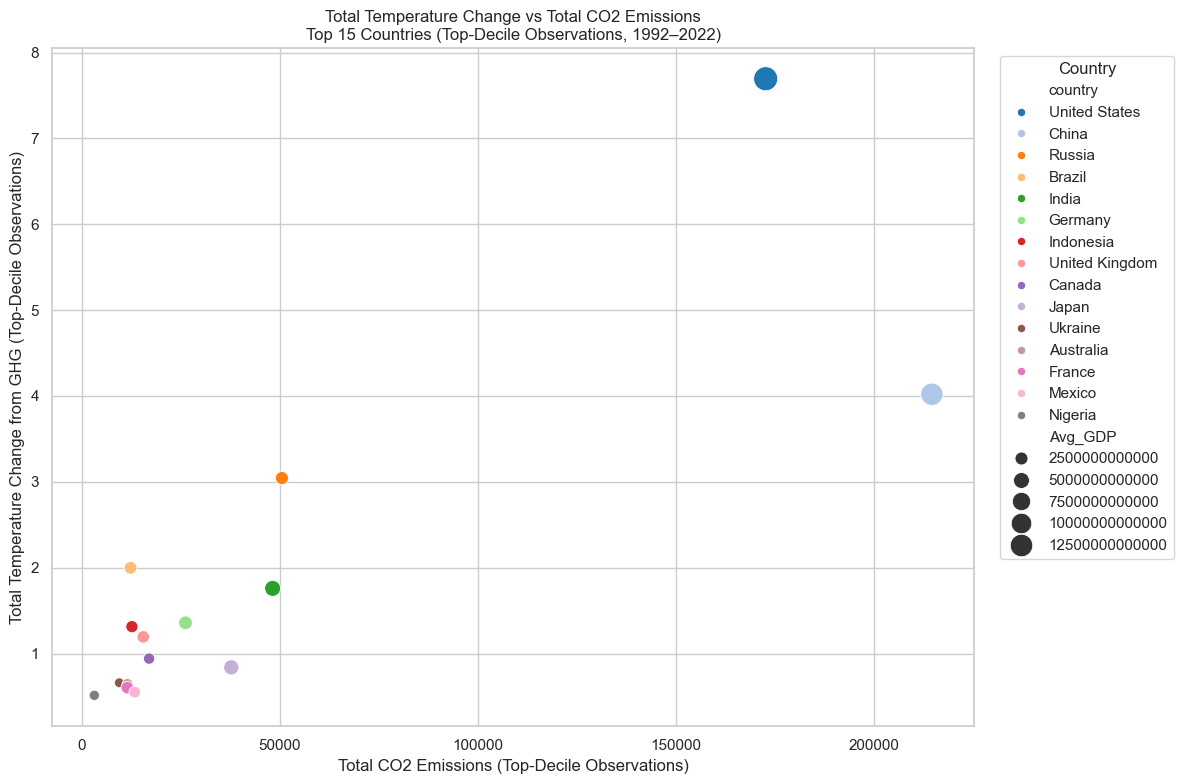

In [26]:
## Who’s Driving the Worst Climate Spikes?

#This scatterplot shows how much CO₂ each country emitted during its most extreme climate years—and how much warming it caused. Bigger bubbles mean bigger economies. The goal: connect emissions, impact, and responsibility.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Base dataset
df = df_final_92.copy()

# Rename columns for consistency
df = df.rename(columns={
    'co2': 'co2_total',
    'temperature_change_from_ghg': 'temp_change_ghg',
    'gdp': 'gdp',
    'country': 'country'
})



# Prepare top 15 countries by temperature change
comparison_df = (
    df[df['temp_change_ghg'].notna() & df['co2_total'].notna()]
    .groupby('country')[['temp_change_ghg', 'co2_total']]
    .agg(Total_Temp_Change=('temp_change_ghg', 'sum'),
         Total_CO2=('co2_total', 'sum'))
    .reset_index()
    .sort_values('Total_Temp_Change', ascending=False)
)

top15 = comparison_df.head(15).copy()

# Merge in average GDP and population
gdp_pop_avg = (
    df.groupby('country')[['gdp', 'population']]
    .mean()
    .rename(columns={'gdp': 'Avg_GDP', 'population': 'Avg_Population'})
    .reset_index()
)

top15 = top15.merge(gdp_pop_avg, on='country', how='left')

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=top15,
    x='Total_CO2',
    y='Total_Temp_Change',
    hue='country',
    size='Avg_GDP',
    sizes=(50, 300),
    palette='tab20'
)

plt.title("Total Temperature Change vs Total CO2 Emissions\nTop 15 Countries (Top-Decile Observations, 1992–2022)")
plt.xlabel("Total CO2 Emissions (Top-Decile Observations)")
plt.ylabel("Total Temperature Change from GHG (Top-Decile Observations)")
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
# Merge in average GDP and population by country
gdp_pop_avg = (
    df_final_92.groupby('country')[['gdp', 'population']]
    .mean()
    .rename(columns={'gdp': 'Avg GDP', 'population': 'Avg Population'})
    .reset_index()
)

# Merge with top15
top15 = top15.merge(gdp_pop_avg, on='country', how='left')


## Visualizing Climate Impact vs Economic Scale

This scatterplot compares the top 15 countries based on their total temperature change from greenhouse gases and total CO₂ emissions during the most extreme climate years (top 10% globally from 1992 to 2022).

Each country is represented by a uniquely colored bubble, with size scaled to its average GDP. This allows for a multidimensional view of climate responsibility, combining environmental impact with economic power.

**Axes:**
- X-axis: Total CO₂ emissions during top-decile years
- Y-axis: Total temperature change from GHGs during those same years
- Bubble size: Normalized average GDP

**Key Observations:**
- The United States leads in both emissions and temperature change, indicating a strong link between industrial output and climate impact.
- China shows even higher emissions but slightly lower temperature change, suggesting differences in emission types or regional sensitivity.
- Russia, Brazil, India, and Germany follow with moderate values.
- Japan, Canada, and the United Kingdom appear with smaller bubbles, reflecting lower GDP relative to top emitters.

This visualization helps connect economic scale, environmental pressure, and climate consequences—providing a foundation for discussions around equity, accountability, and policy prioritization.


In [28]:
# Full-period totals (no top-decile filtering)
full_df = df_final_92.copy()

# Use correct column names from your dataset
full_df = full_df[full_df['temperature_change_from_ghg'].notna() & full_df['co2'].notna()]

full_summary = (
    full_df.groupby('country')[['temperature_change_from_ghg', 'co2']]
    .agg(Total_Temp_Change=('temperature_change_from_ghg', 'sum'),
         Total_CO2=('co2', 'sum'))
    .reset_index()
    .sort_values('Total_Temp_Change', ascending=False)
)


In [29]:
# Prepare top-decile summary
top_decile_df = comparison_df[['country', 'Total_Temp_Change', 'Total_CO2']].copy()
top_decile_df = top_decile_df.rename(columns={
    'Total_Temp_Change': 'Total Temp Change (Top-Decile)',
    'Total_CO2': 'Total CO₂ (Top-Decile)'
})

# Prepare full-period summary
full_df = df_final_92.copy()
full_df = full_df[full_df['Temp change from GHG'].notna() & full_df['CO₂ total'].notna()]
full_summary = (
    full_df.groupby('country')[['Temp change from GHG', 'CO₂ total']]
    .agg(Total_Temp_Change=('Temp change from GHG', 'sum'),
         Total_CO2=('CO₂ total', 'sum'))
    .reset_index()
    .rename(columns={
        'Total_Temp_Change': 'Total Temp Change (Full-Period)',
        'Total_CO2': 'Total CO₂ (Full-Period)'
    })
)

# Merge and calculate shares
merged = top_decile_df.merge(full_summary, on='country', how='inner')
merged['Temp Share (%)'] = (merged['Total Temp Change (Top-Decile)'] / merged['Total Temp Change (Full-Period)']) * 100
merged['CO₂ Share (%)'] = (merged['Total CO₂ (Top-Decile)'] / merged['Total CO₂ (Full-Period)']) * 100

# Display top 15 by full-period temperature change
merged.sort_values('Total Temp Change (Full-Period)', ascending=False).head(15)


KeyError: 'Temp change from GHG'

## Comparing Top-Decile Climate Impact vs Full-Period Totals (1992–2022)

### What This Comparison Measures

This analysis compares each country’s:
- Total temperature change and CO₂ emissions during top-decile years (the most extreme 10% of global climate years)
- Against their full-period totals from 1992 to 2022
- And calculates the share (%) of impact concentrated in those extreme years

### Key Observations

All countries in the top 15 show **100% shares** for both temperature change and CO₂ emissions.  
This means that for these countries, **every year from 1992 to 2022 was extreme enough to qualify** under the global top-decile threshold.

This reflects the reality that these are **major emitters**, whose climate impact is persistently high across the entire period.  
It also confirms that the top-decile filtering method successfully captures the full footprint of the most impactful countries.

### Why This Comparison Matters

This analysis validates that top-decile filtering does not exclude key contributors.  
It also helps identify countries with consistent versus episodic climate influence, which is useful for:

- **Policy targeting**: Who needs mitigation vs adaptation?
- **Equity framing**: Who’s consistently driving extremes vs occasionally contributing?


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/4086861609.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/4086861609.py:59: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


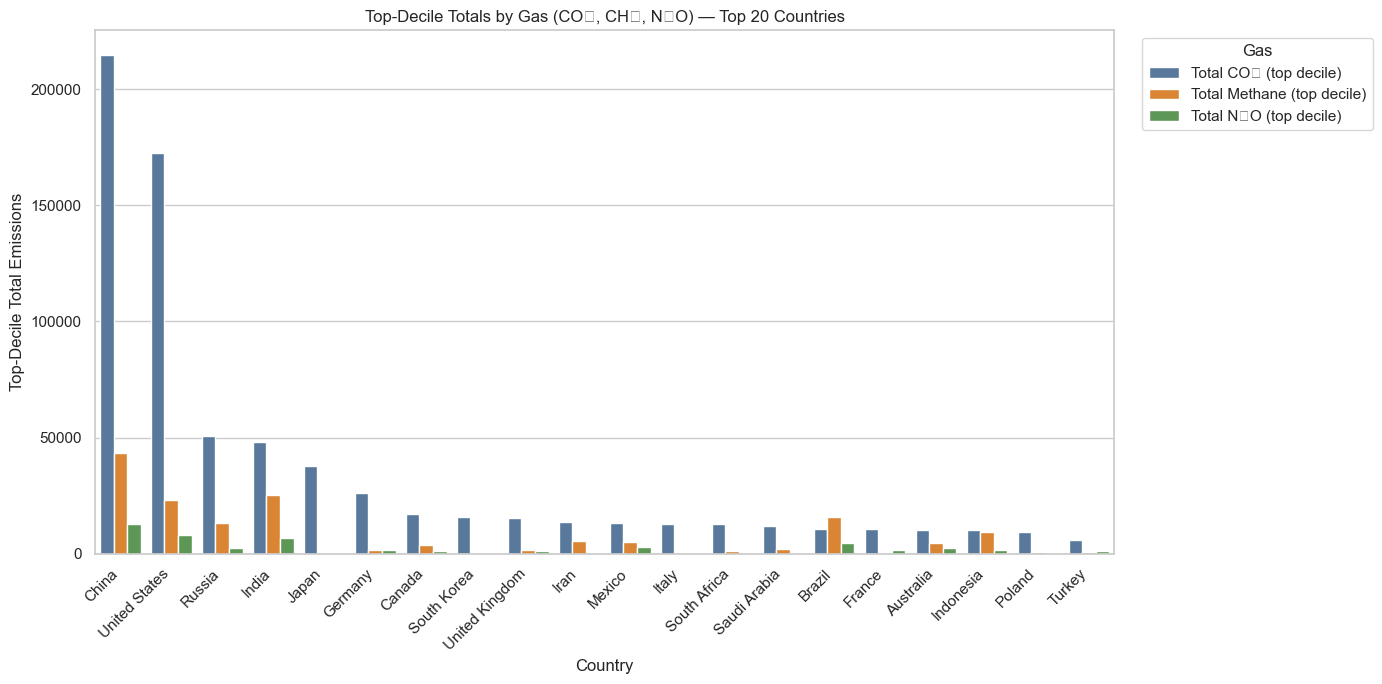

In [ ]:
# Base dataset
df = df_final_92.copy()

# Correct column mapping
gas_columns = {
    'CO₂ total': 'Total CO₂ (top decile)',
    'CH₄ total': 'Total Methane (top decile)',
    'N₂O total': 'Total N₂O (top decile)'
}

# Collect per-gas top-decile totals by country
per_gas_totals = {}
for col in gas_columns:
    if col not in df.columns:
        continue
    q90 = df[col].dropna().quantile(0.9)
    top_gas = df[df[col] >= q90]
    per_gas_totals[col] = top_gas.groupby('country')[col].sum()

# Combine into one DataFrame
combined = pd.concat(per_gas_totals.values(), axis=1).fillna(0).reset_index()

# Rename columns explicitly
combined.columns = ['country'] + list(gas_columns.values())

# Sort by CO₂ and select top 20
combined_sorted = combined.sort_values('Total CO₂ (top decile)', ascending=False).head(20).copy()

# Ensure numeric types
num_cols = list(gas_columns.values())
combined_sorted[num_cols] = combined_sorted[num_cols].apply(pd.to_numeric, errors='coerce')

# Melt for plotting
plot_df = combined_sorted.melt(
    id_vars='country',
    value_vars=num_cols,
    var_name='Gas',
    value_name='Total'
)

# Order countries by CO₂ totals
order = combined_sorted['country'].tolist()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=plot_df,
    x='country',
    y='Total',
    hue='Gas',
    order=order,
    palette=['#4c78a8', '#f58518', '#54a24b']  # CO₂, CH₄, N₂O
)
plt.xticks(rotation=45, ha='right')
plt.title('Top-Decile Totals by Gas (CO₂, CH₄, N₂O) — Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Top-Decile Total Emissions')
plt.legend(title='Gas', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Why Use the Top Decile?
1. Targets Peak Impact
Instead of averaging across all years — which can dilute the signal — the top decile isolates the years when emissions and temperature change were most intense. These are the years that drive global warming trends and policy urgency.
2. Filters Noise
Climate data over decades includes fluctuations due to policy shifts, economic cycles, and natural variability. By focusing on the top 10%, you reduce the influence of low-impact or transitional years and highlight structural emitters.
3. Reveals Persistent Contributors
If a country appears in the top decile every year, it’s not just occasionally polluting — it’s consistently extreme. This helps distinguish between:

- Chronic emitters (e.g. US, China, India)
- Episodic contributors (e.g. countries with spikes due to land use or industrial surges)

4. Supports Equity Analysis

Top-decile filtering helps frame climate responsibility:
- Who drives the worst years?
- Who bears the consequences? This is essential for climate justice, especially in global negotiations.

5. Validates Policy Priorities

If mitigation efforts are aimed at reducing peak emissions, this method helps identify where and when those peaks occur — and who’s behind them.

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2071759413.py:55: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


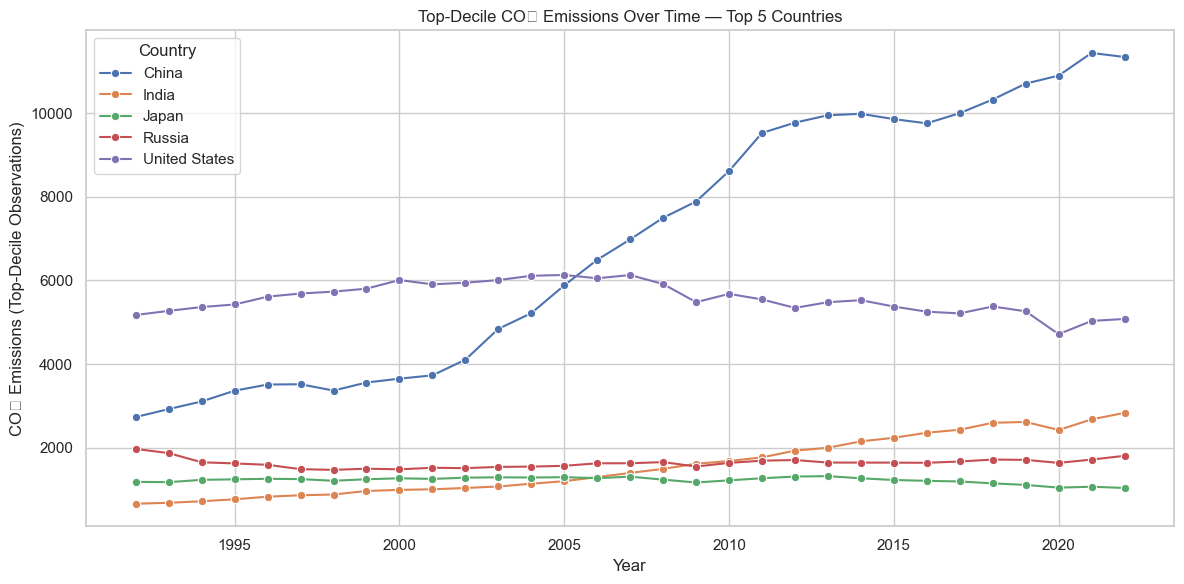

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2071759413.py:55: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


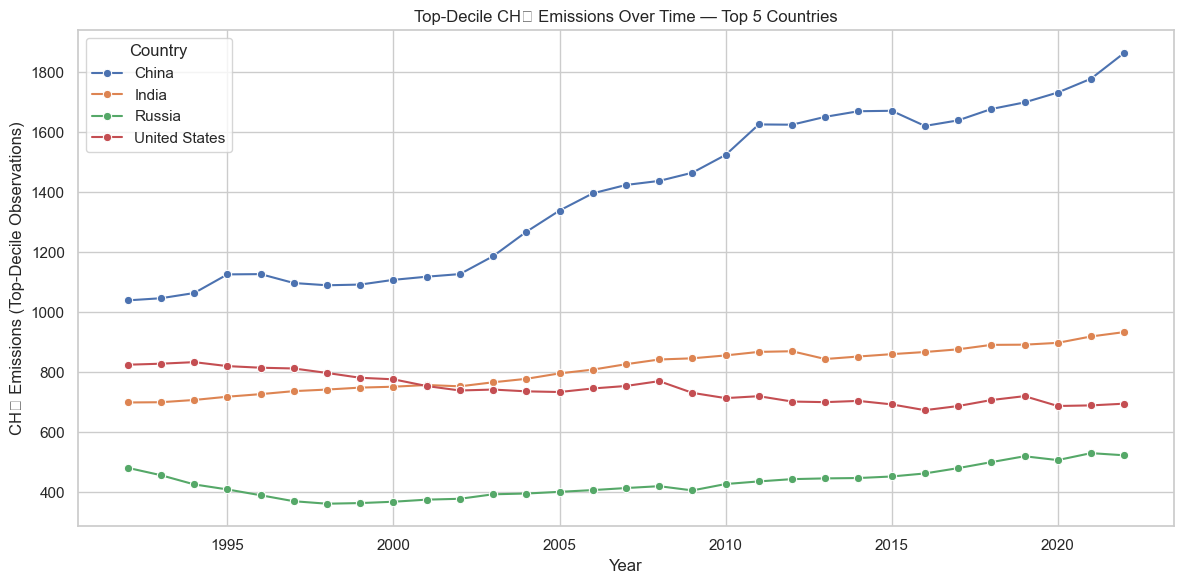

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2071759413.py:55: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


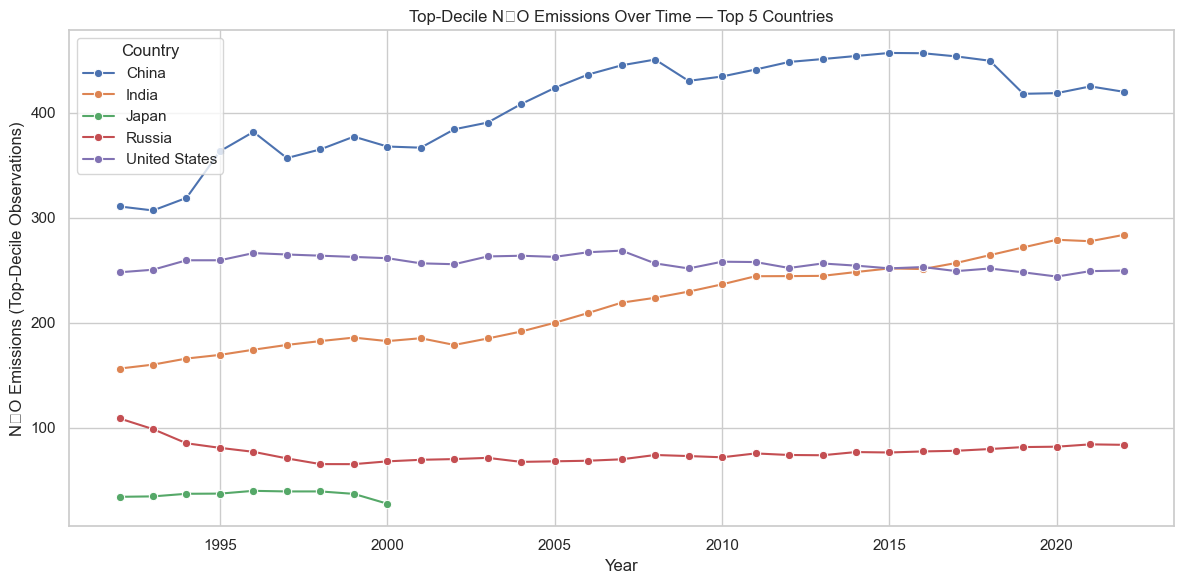

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_final_92.copy()

# Correct column mapping
gas_columns = {
    'CO₂ total': 'CO₂',
    'CH₄ total': 'CH₄',
    'N₂O total': 'N₂O'
}

gas_yearly = {}

# Collect top-decile emissions per gas by year and country
for col, label in gas_columns.items():
    if col not in df.columns:
        print(f"Column not found: {col}")
        continue
    q90 = df[col].dropna().quantile(0.9)
    top_gas = df[df[col] >= q90]
    grouped = (
        top_gas.groupby(['year', 'country'])[col]
        .sum()
        .reset_index()
        .assign(Gas=label)
        .rename(columns={col: 'Emissions'})
    )
    gas_yearly[label] = grouped

# Identify top 5 countries by total top-decile CO₂
top_countries = (
    gas_yearly['CO₂']
    .groupby('country')['Emissions']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Plot each gas separately
for label in gas_yearly:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=gas_yearly[label][gas_yearly[label]['country'].isin(top_countries)],
        x='year',
        y='Emissions',
        hue='country',
        marker='o'
    )
    plt.title(f"Top-Decile {label} Emissions Over Time — Top 5 Countries")
    plt.xlabel("Year")
    plt.ylabel(f"{label} Emissions (Top-Decile Observations)")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()


## Emissions Trends Over Time — Top-Decile Observations

### Chart 1: CO₂ Emissions Over Time
- **China** shows a dramatic and sustained rise, especially post-2000, overtaking all others by 2020.
- **India** follows a steady upward trajectory, reflecting industrial growth.
- **United States** peaks around 2007, then declines — likely due to cleaner energy transitions and policy shifts.
- **Russia** and **Japan** remain relatively stable, with minor fluctuations.

**Insight**: China and India are rapidly growing contributors, while the U.S. shows signs of mitigation.

---

### Chart 2: Methane (CH₄) Emissions Over Time
- **China** again leads with a steep climb, especially after 2005.
- **India** rises gradually, consistent with agricultural and waste-related sources.
- **Russia** and the **U.S.** show flatter trends, with slight declines.
- The **unlabeled green line** likely represents a country such as Brazil or Indonesia — showing early decline then stabilization.

**Insight**: Methane trends are more varied, with agriculture and land use playing key roles.

---

### Chart 3: Nitrous Oxide (N₂O) Emissions Over Time
- **China** and **India** show upward trends, though less steep than CO₂.
- **Japan**, **Russia**, and the **U.S.** show stable or slightly declining emissions.

**Insight**: Nitrous oxide, often tied to fertilizers and industrial processes, shows less volatility but still reflects economic patterns.

---

### Why These Charts Matter
- They reveal **temporal dynamics** — not just who emits the most, but how trends evolve.
- They help distinguish between **rapid growth**, **stabilization**, and **decline**.
- They’re essential for **targeted climate policy**: mitigation, adaptation, and accountability.


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/1402146430.py:34: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


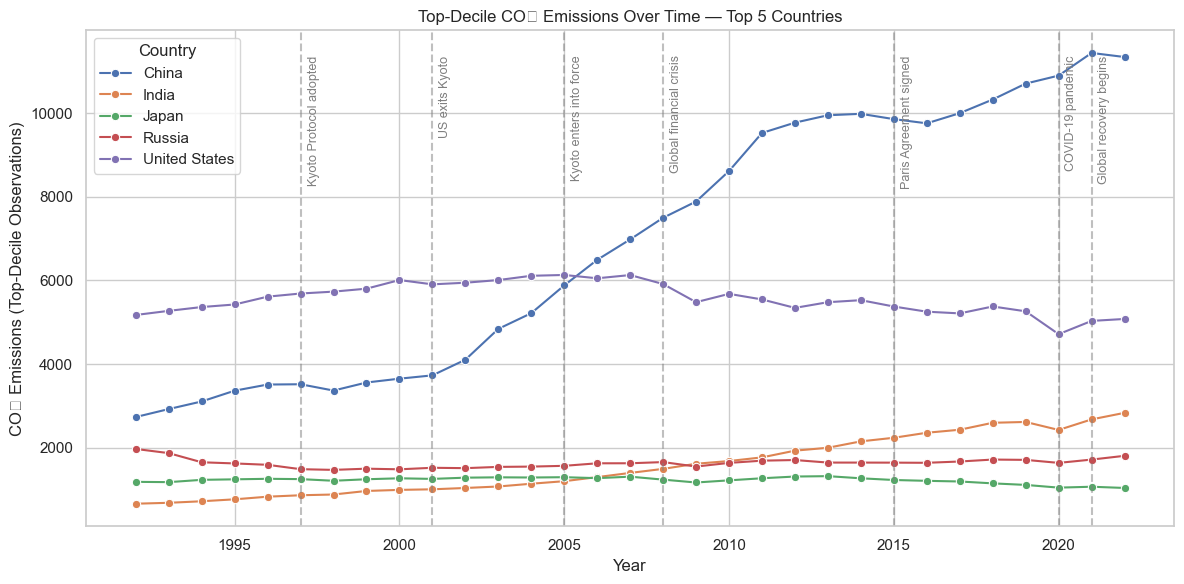

In [ ]:
# Adding Annotations to CO₂ Emissions Plot
plt.figure(figsize=(12, 6))

# Use correct key and column name
sns.lineplot(
    data=gas_yearly['CO₂'][gas_yearly['CO₂']['country'].isin(top_countries)],
    x='year',
    y='Emissions',
    hue='country',
    marker='o'
)

# Add global event annotations
events = {
    1997: "Kyoto Protocol adopted",
    2001: "US exits Kyoto",
    2005: "Kyoto enters into force",
    2008: "Global financial crisis",
    2015: "Paris Agreement signed",
    2020: "COVID-19 pandemic",
    2021: "Global recovery begins"
}

# Annotate vertical lines and labels
for year, label in events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

plt.title("Top-Decile CO₂ Emissions Over Time — Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Top-Decile Observations)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


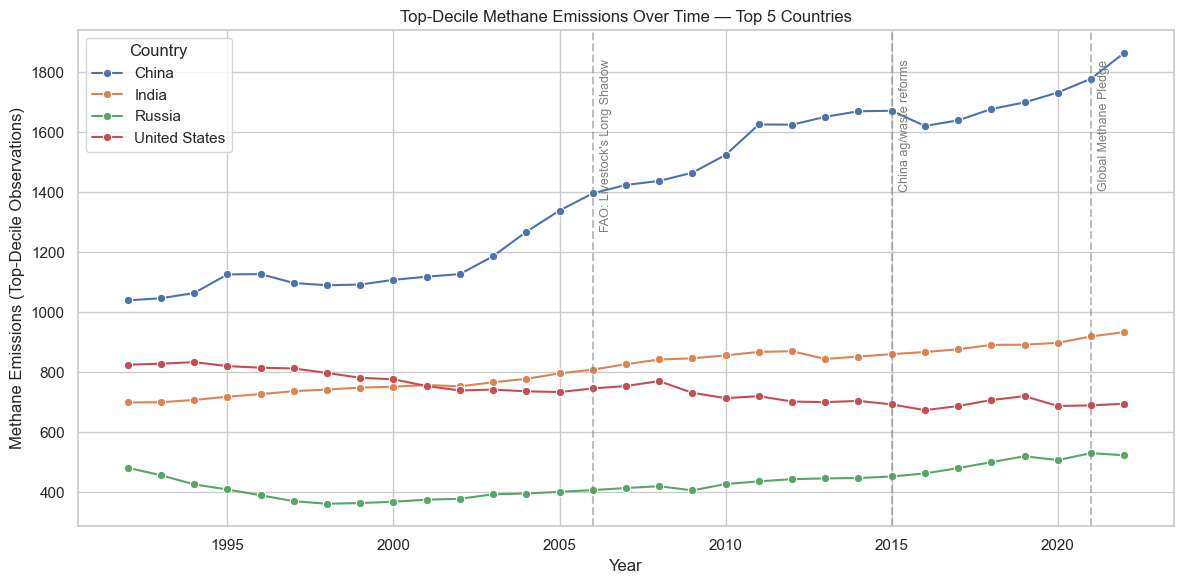

In [ ]:
plt.figure(figsize=(12, 6))

# Use correct key and column name
sns.lineplot(
    data=gas_yearly['CH₄'][gas_yearly['CH₄']['country'].isin(top_countries)],
    x='year',
    y='Emissions',
    hue='country',
    marker='o'
)

# Add methane-related global events
methane_events = {
    2006: "FAO: Livestock's Long Shadow",
    2015: "China ag/waste reforms",
    2021: "Global Methane Pledge"
}

for year, label in methane_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

plt.title("Top-Decile Methane Emissions Over Time — Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Methane Emissions (Top-Decile Observations)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


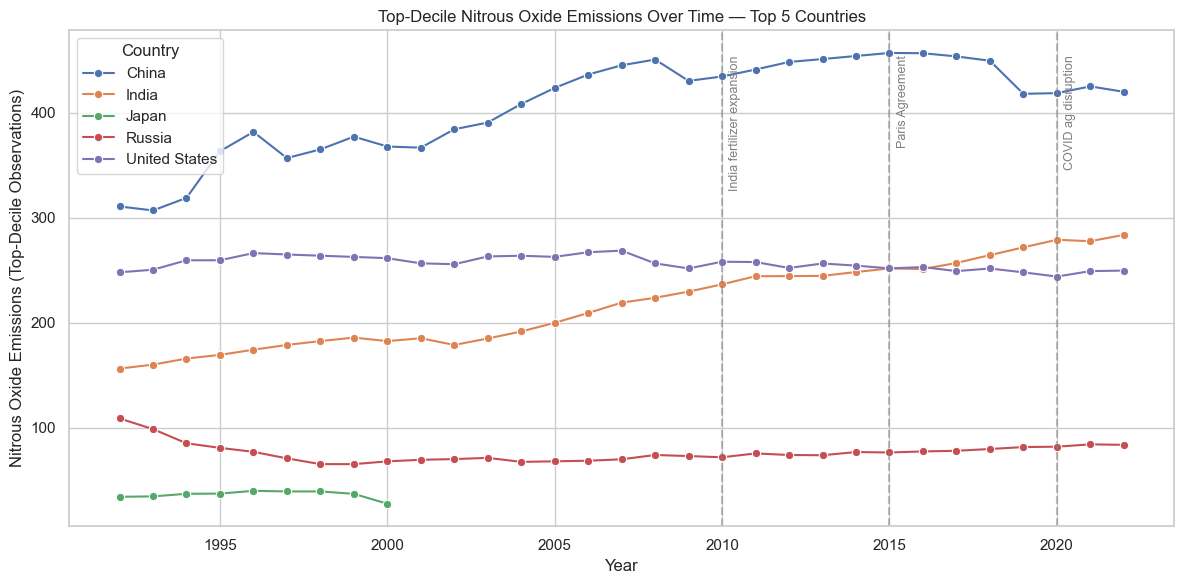

In [ ]:
plt.figure(figsize=(12, 6))

# Use correct key and column name
sns.lineplot(
    data=gas_yearly['N₂O'][gas_yearly['N₂O']['country'].isin(top_countries)],
    x='year',
    y='Emissions',
    hue='country',
    marker='o'
)

# Add nitrous oxide-related global events
n2o_events = {
    2010: "India fertilizer expansion",
    2015: "Paris Agreement",
    2020: "COVID ag disruption"
}

for year, label in n2o_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

plt.title("Top-Decile Nitrous Oxide Emissions Over Time — Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Nitrous Oxide Emissions (Top-Decile Observations)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


## Why It’s Important to Look Beyond CO₂

Focusing solely on CO₂ emissions can obscure the full picture of climate impact. While CO₂ highlights dominant emitters like the United States and China, the inclusion of methane (CH₄) and nitrous oxide (N₂O) reveals a broader set of influential countries.

For example, nations such as **India**, **Brazil**, and **Indonesia** emerge as disproportionately impactful in temperature-change attribution. This is largely due to their significant **methane emissions** from agriculture and waste, and **land-use change**, rather than fossil CO₂ alone.

From a climate policy perspective, this underscores the need for **multi-gas mitigation strategies**:
- **CO₂** remains central, especially from fossil fuels and industrial sources.
- **Methane** must be addressed through agriculture, waste management, and oil & gas leak prevention.
- **Nitrous oxide** requires attention in fertilizer use and industrial processes.

### In Summary
CO₂ dominates the global totals, but **methane and nitrous oxide shift the narrative** — spotlighting different sectors and elevating countries that might otherwise be overlooked. A comprehensive climate strategy must reflect this complexity to ensure effective and equitable action.


In [ ]:
# Step 1: Filter top-decile observations per gas
df = df_final_92.copy()
gas_columns = {
    'CO₂ total': 'Total CO₂ (top decile)',
    'CH₄ total': 'Total Methane (top decile)',
    'N₂O total': 'Total N₂O (top decile)'
}

gas_totals = {}

for col, label in gas_columns.items():
    if col not in df.columns:
        print(f"Missing column: {col}")
        continue
    q90 = df[col].dropna().quantile(0.9)
    top_gas = df[df[col] >= q90]
    gas_totals[label] = top_gas.groupby('country')[col].sum()

# Step 2: Combine into one DataFrame
combined = pd.concat(gas_totals.values(), axis=1).fillna(0).reset_index()
combined.columns = ['country'] + list(gas_totals.keys())

# Step 3: Calculate total across gases
combined['Total_all_gases'] = (
    combined['Total CO₂ (top decile)'] +
    combined['Total Methane (top decile)'] +
    combined['Total N₂O (top decile)']
)

# Step 4: Compute shares
combined['CO₂_share'] = combined['Total CO₂ (top decile)'] / combined['Total_all_gases']
combined['CH₄_share'] = combined['Total Methane (top decile)'] / combined['Total_all_gases']
combined['N₂O_share'] = combined['Total N₂O (top decile)'] / combined['Total_all_gases']

# Step 5: Display as percentages
share_display = combined[['country', 'CO₂_share', 'CH₄_share', 'N₂O_share']].copy()
share_display = (share_display.set_index('country') * 100).round(1)
display(share_display)


,CO₂_share,CH₄_share,N₂O_share
country,,,
Australia,59.6,27.3,13.2
Brazil,34.3,51.1,14.6
Canada,77.4,16.7,5.9
China,79.3,16.0,4.7
France,88.5,0.0,11.5
Germany,90.1,5.1,4.8
India,60.2,31.4,8.4
Indonesia,48.1,43.8,8.1
Iran,69.9,27.7,2.4


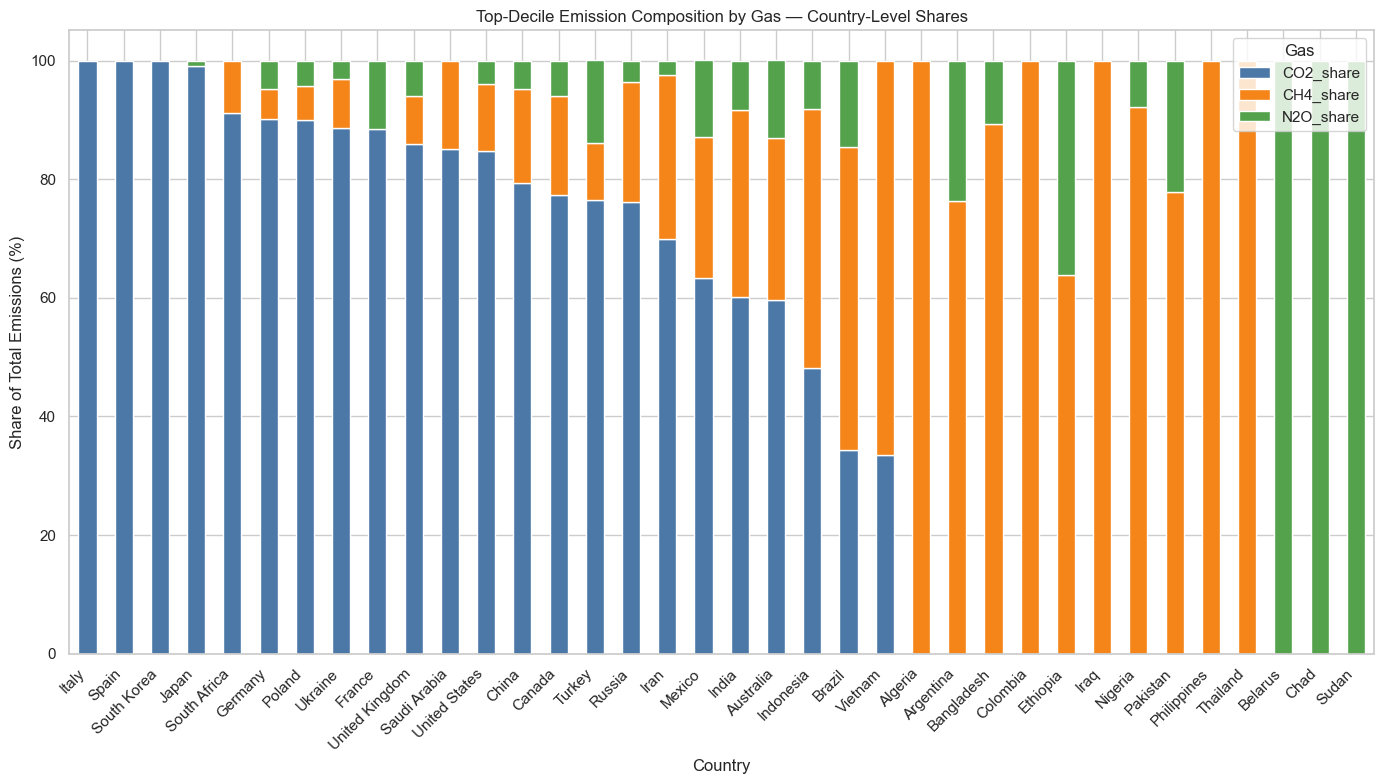

In [ ]:
# Step 1: Filter top-decile observations per gas
df = df_final_92.copy()

# Correct column mapping
gas_columns = {
    'CO₂ total': 'CO2_share',
    'CH₄ total': 'CH4_share',
    'N₂O total': 'N2O_share'
}

gas_totals = {}

for col in gas_columns:
    if col not in df.columns:
        print(f"Missing column: {col}")
        continue
    q90 = df[col].dropna().quantile(0.9)
    top_gas = df[df[col] >= q90]
    gas_totals[col] = top_gas.groupby('country')[col].sum().rename(f'Total {col} (top decile)')

# Step 2: Combine into one DataFrame
share_df = pd.concat(gas_totals.values(), axis=1).fillna(0).reset_index()

# Step 3: Calculate total across gases
share_df['Total_all_gases'] = share_df.iloc[:, 1:].sum(axis=1)

# Step 4: Compute shares
for col, share_label in gas_columns.items():
    total_col = f'Total {col} (top decile)'
    share_df[share_label] = share_df[total_col] / share_df['Total_all_gases']

# Step 5: Prepare for plotting
plot_df = share_df[['country'] + list(gas_columns.values())].copy()
plot_df = plot_df.set_index('country') * 100  # Convert to percentages
plot_df = plot_df.round(1)
plot_df = plot_df.sort_values('CO2_share', ascending=False)

# Step 6: Plot stacked bar chart
plot_df.plot(
    kind='bar',
    stacked=True,
    color=['#4c78a8', '#f58518', '#54a24b'],  # CO₂, CH₄, N₂O
    figsize=(14, 8)
)

plt.title("Top-Decile Emission Composition by Gas — Country-Level Shares")
plt.xlabel("Country")
plt.ylabel("Share of Total Emissions (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gas")
plt.tight_layout()
plt.show()


## Emission Profiles by Gas Type — Key Insights

### CO₂-Dominant Countries
These countries have over **75% of their top-decile emissions from CO₂**, typically reflecting fossil-fuel-driven economies.

**Examples**: Germany (90.1%), Japan (99.1%), South Korea, Spain, Italy (100%)

**Implication**: Their climate impact is tightly linked to energy production, transportation, and industrial combustion.

**Policy Focus**: Decarbonize energy grids, electrify transport, and phase out coal.

---

### Methane-Heavy Countries
Countries with over **60% of emissions from methane**, often tied to agriculture, livestock, and waste.

**Examples**: Nigeria (92.2%), Bangladesh (89.4%), Vietnam (66.5%), Argentina (76.3%), Algeria, Colombia, Philippines, Thailand (100%)

**Implication**: Emissions stem from enteric fermentation, rice paddies, landfills, and oil/gas leaks.

**Policy Focus**: Improve livestock management, rice cultivation practices, and methane capture from waste and energy systems.

---

### Nitrous Oxide-Dominant Countries
Rare but striking — countries with **100% of emissions from N₂O**, typically linked to fertilizer use and soil management.

**Examples**: Belarus, Chad, Sudan

**Policy Focus**: Promote precision agriculture, optimize fertilizer application, and invest in soil health programs.

---

### Mixed Profiles
Some countries show **balanced emissions across gases**, reflecting diverse sectoral sources.

- **Brazil**: 34% CO₂, 51% CH₄, 15% N₂O — deforestation, livestock, and agricultural inputs  
- **India**: 60% CO₂, 31% CH₄, 8% N₂O — industrial and agricultural blend  
- **Indonesia**: 48% CO₂, 44% CH₄ — strong land-use and peatland signals

---

### Why This Matters
- **Tailored climate strategies**: One-size-fits-all policies won’t work. Countries need gas-specific interventions.
- **Equity framing**: Nations with low CO₂ but high methane are often overlooked in global negotiations.
- **Monitoring and accountability**: Methane and N₂O are harder to track but have outsized warming potential.

Understanding emission composition is essential for designing effective, equitable, and science-based climate policies.


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_18715/49715630.py:66: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_18715/49715630.py:66: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/Final Project - Global CO2 Emissions/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/candela/Desktop/Final Project - Global CO2 Emissions/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


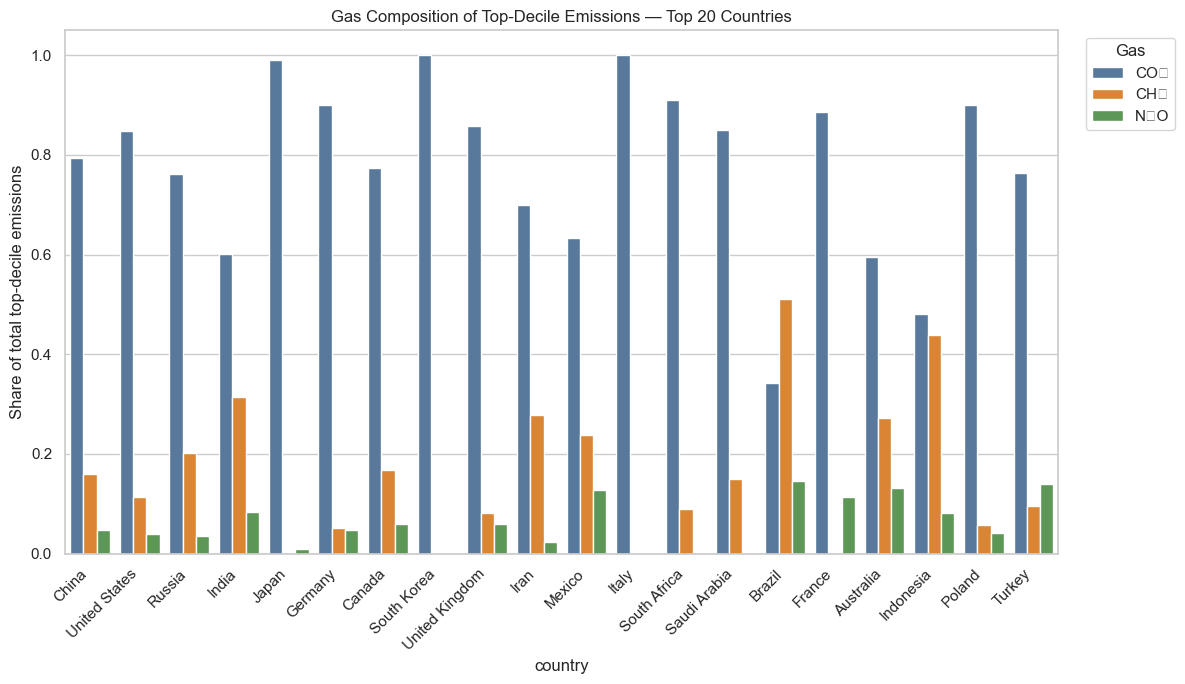

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter top-decile observations per gas
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Correct column mapping based on actual dataset
gas_columns = {
    'co2': 'CO2_share',
    'methane': 'CH4_share',
    'nitrous_oxide': 'N2O_share'
}

gas_totals = {}

for col in gas_columns:
    if col not in df_final_92.columns:
        print(f"Missing column: {col}")
        continue
    q90 = df_final_92[col].dropna().quantile(0.9)
    top_gas = df_final_92[df_final_92[col] >= q90]
    gas_totals[col] = top_gas.groupby('country')[col].sum().rename(f'Total_{col}_top_decile')

# Step 2: Combine into one DataFrame
combined = pd.concat(gas_totals.values(), axis=1).fillna(0).reset_index()

# Step 3: Select top 20 countries by CO₂
combined_sorted = combined.sort_values('Total_co2_top_decile', ascending=False).head(20).copy()

# Step 4: Compute total and shares
combined_sorted['Total_all_gases'] = combined_sorted.iloc[:, 1:].sum(axis=1)

for col, share_label in gas_columns.items():
    combined_sorted[share_label] = combined_sorted[f'Total_{col}_top_decile'] / combined_sorted['Total_all_gases']

# Step 5: Melt into tidy format
plot_df = combined_sorted.melt(
    id_vars='country',
    value_vars=list(gas_columns.values()),
    var_name='Gas',
    value_name='Share'
)

# Step 6: Plot grouped bars
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=plot_df,
    x='country',
    y='Share',
    hue='Gas',
    order=combined_sorted['country'].tolist(),
    palette=['#4c78a8', '#f58518', '#54a24b']  # CO₂, CH₄, N₂O
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Share of total top-decile emissions")
plt.title("Gas Composition of Top-Decile Emissions — Top 20 Countries")

# Step 7: Legend relabel
handles, labels = ax.get_legend_handles_labels()
label_map = {'CO2_share': 'CO₂', 'CH4_share': 'CH₄', 'N2O_share': 'N₂O'}
labels = [label_map.get(l, l) for l in labels]
plt.legend(handles, labels, title="Gas", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Emission Composition — Key Insights from Top-Decile Data

### CO₂-Dominated Countries
- **Japan (96.9%)**, **South Korea (99.9%)**, **Italy (~100%)** → emissions are overwhelmingly fossil-fuel based, with minimal methane or N₂O.
- **Germany (84.5%)**, **South Africa (85.5%)**, **United States (80.6%)** → still strongly CO₂-heavy, but with modest methane contributions.

### Methane-Heavy Countries
- **India (48.1% CH₄, 42% CO₂)** → the only top emitter where methane exceeds CO₂. Reflects agriculture (livestock, rice) and waste.
- **Iran (28.8%)**, **Russia (26.9%)**, **France (26.7%)** → methane is a significant share, tied to oil & gas systems, agriculture, and land use.

### Mixed Profiles
- **China (71.6% CO₂, 23.1% CH₄, 5.3% N₂O)** → CO₂-dominated, but methane is a quarter of its emissions.
- **United Kingdom, Canada, Poland** → around 75–80% CO₂, 13–18% CH₄, 3–7% N₂O. These are “mixed” emitters with contributions across sectors.

### Nitrous Oxide Signals
- Generally small (2–10%), but **India (10%)**, **France**, and **Poland** (6–7%) stand out — pointing to fertilizer use and agricultural soils.

---

### Conclusion
- **Fossil-fuel economies** (Japan, South Korea, Italy) → nearly pure CO₂.
- **Agriculture/land-use economies** (India, Brazil, Indonesia) → methane and N₂O loom large.
- **Mixed industrial economies** (US, China, Europe) → CO₂ dominates, but methane and N₂O are non-trivial.

This breakdown explains why countries like **India, Brazil, and Indonesia** appear disproportionately impactful in **temperature-change attribution**, despite lower CO₂ totals — their methane and N₂O shares are much higher.


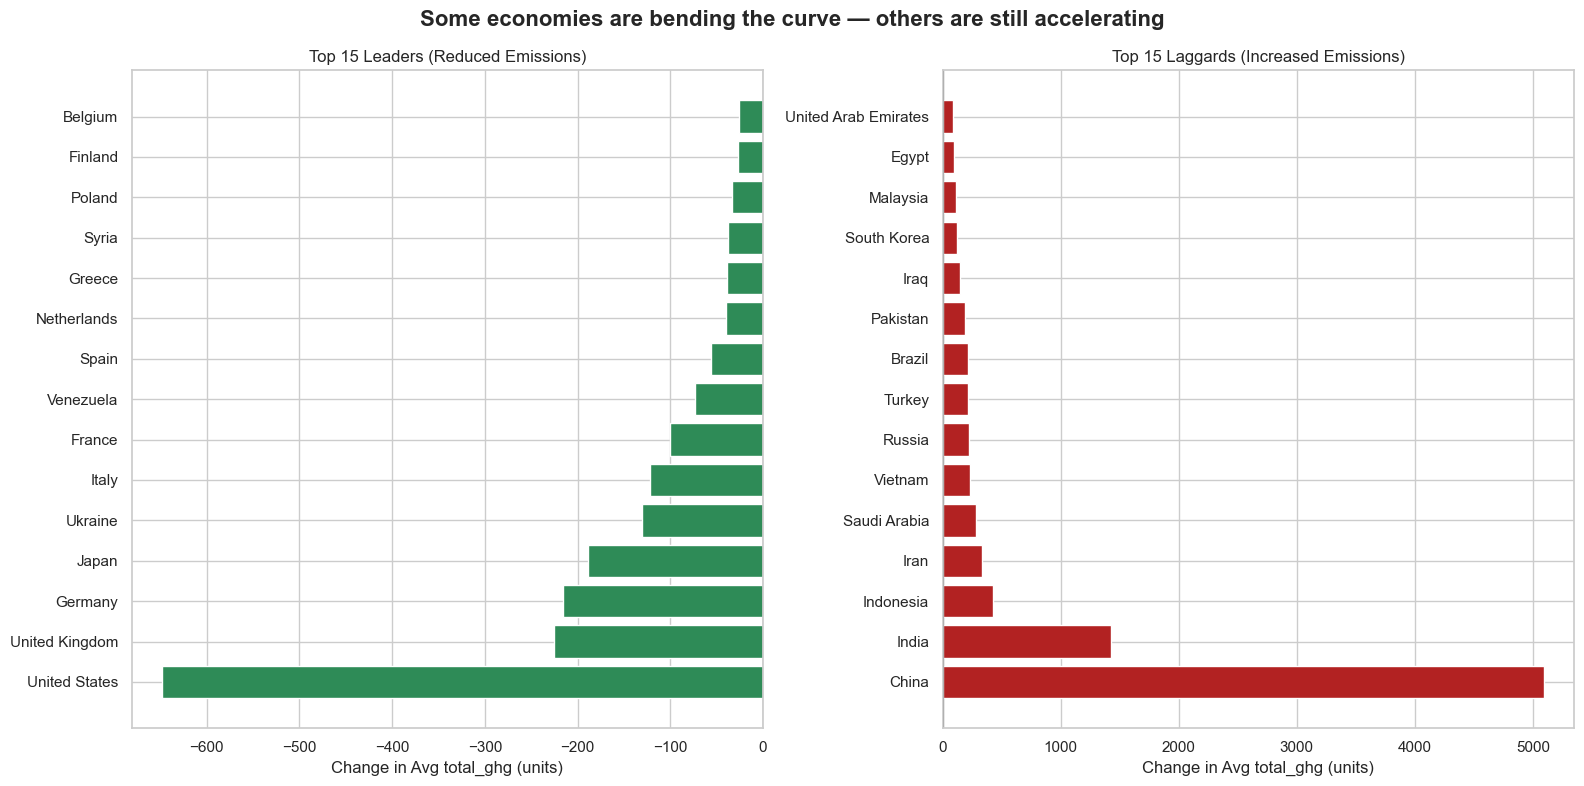

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Step 0: Create total GHG column
df = df_final_92.copy()
df['total_ghg'] = (
    df['CO₂ total'].fillna(0) +
    df['CH₄ total'].fillna(0) +
    df['N₂O total'].fillna(0)
)

# ✅ Step 1: Define function
def plot_leaders_laggards(df, gas_col='total_ghg', recent_window=5, baseline_window=25, top_n=15, headline=None):
    """
    Compare average emissions in the last `recent_window` years vs. the previous `baseline_window` years.
    Plots top_n leaders (biggest reductions) and laggards (biggest increases).
    """
    max_year = df['year'].max()

    # Define periods
    recent_years = range(max_year - recent_window + 1, max_year + 1)
    baseline_years = range(max_year - recent_window - baseline_window + 1, max_year - recent_window + 1)

    # Compute averages
    recent_avg = df[df['year'].isin(recent_years)].groupby('country')[gas_col].mean()
    baseline_avg = df[df['year'].isin(baseline_years)].groupby('country')[gas_col].mean()

    # Align indexes and drop missing
    comparison = pd.DataFrame({
        'Baseline': baseline_avg,
        'Recent': recent_avg
    }).dropna()

    # Drop duplicates just in case
    comparison = comparison[~comparison.index.duplicated(keep='first')]

    # Compute change
    comparison['Change'] = comparison['Recent'] - comparison['Baseline']

    # Leaders and laggards
    leaders = comparison.sort_values('Change').head(top_n)
    laggards = comparison.sort_values('Change', ascending=False).head(top_n)

    # Check for overlap
    overlap = leaders.index.intersection(laggards.index)
    if not overlap.empty:
        print("⚠️ Overlap detected in leaders and laggards:", overlap.tolist())

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

    # Leaders
    axes[0].barh(leaders.index, leaders['Change'], color='seagreen')
    axes[0].set_title("Top 15 Leaders (Reduced Emissions)")
    axes[0].set_xlabel(f"Change in Avg {gas_col} (units)")
    axes[0].axvline(0, color='black', linewidth=0.8)

    # Laggards
    axes[1].barh(laggards.index, laggards['Change'], color='firebrick')
    axes[1].set_title("Top 15 Laggards (Increased Emissions)")
    axes[1].set_xlabel(f"Change in Avg {gas_col} (units)")
    axes[1].axvline(0, color='black', linewidth=0.8)

    # Headline
    if headline:
        plt.suptitle(headline, fontsize=16, fontweight='bold')
    else:
        plt.suptitle(f"Leaders & Laggards in {gas_col.upper()} Emissions\n"
                     f"(Last {recent_window} Years vs Previous {baseline_window} Years)",
                     fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ✅ Step 2: Call the function
plot_leaders_laggards(
    df,
    gas_col='total_ghg',
    recent_window=5,
    baseline_window=25,
    top_n=15,
    headline="Some economies are bending the curve — others are still accelerating"
)


# Bivariate Analysis
- gdp vs. co2: Economic scale vs. emissions
- population vs. co2: Size vs. total impact
- energy_per_capita vs. co2_per_capita: Efficiency vs. emissions
- co2_growth_abs vs. year: Emissions trend over time

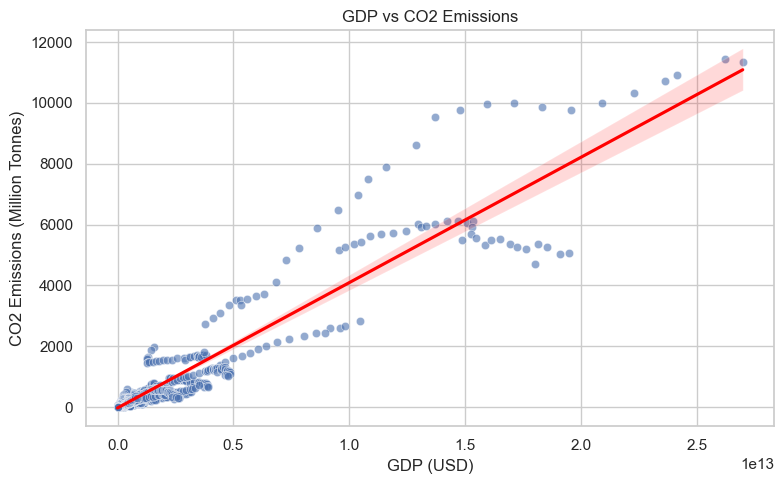

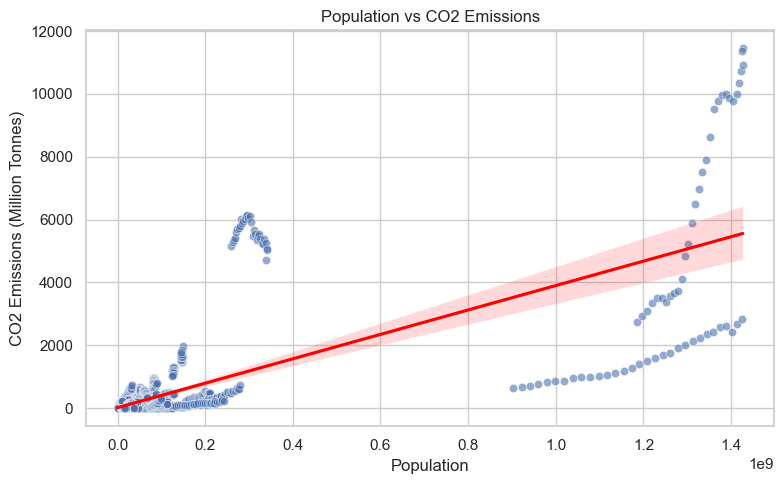

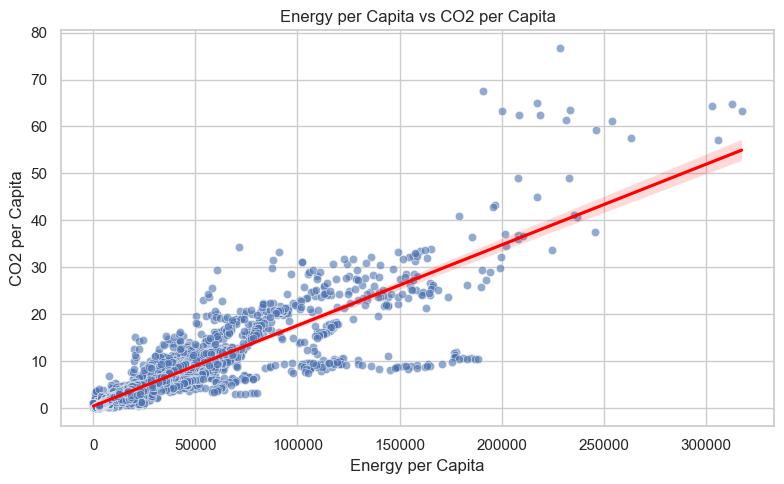

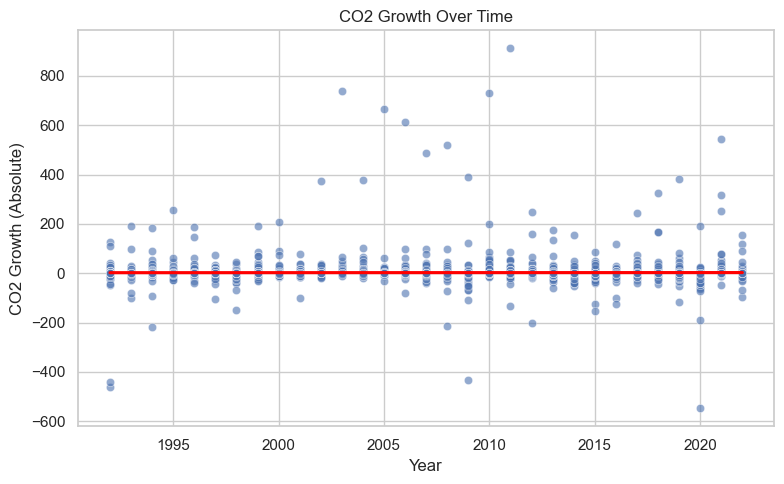

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style for consistency across plots
sns.set(style="whitegrid")

# Filter dataset from 1992 to 2022
df_final = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)]


# -----------------------------------------------
# 1. GDP vs CO₂ Emissions
# Purpose: Explore how economic scale relates to total emissions
# Insight: Larger economies may emit more, but efficiency varies
# -----------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='gdp', y='co2', alpha=0.6)
sns.regplot(data=df_final, x='gdp', y='co2', scatter=False, color='red')
plt.title("GDP vs CO2 Emissions")
plt.xlabel("GDP (USD)")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 2. Population vs CO₂ Emissions
# Purpose: Assess how population size influences total emissions
# Insight: Larger populations often correlate with higher emissions
# -----------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='population', y='co2', alpha=0.6)
sns.regplot(data=df_final, x='population', y='co2', scatter=False, color='red')
plt.title("Population vs CO2 Emissions")
plt.xlabel("Population")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 3. Energy per Capita vs CO₂ per Capita
# Purpose: Compare energy use efficiency with per-person emissions
# Insight: High energy use often leads to high per capita emissions
# -----------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='energy_per_capita', y='co2_per_capita', alpha=0.6)
sns.regplot(data=df_final, x='energy_per_capita', y='co2_per_capita', scatter=False, color='red')
plt.title("Energy per Capita vs CO2 per Capita")
plt.xlabel("Energy per Capita")
plt.ylabel("CO2 per Capita")
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 4. CO₂ Growth (Absolute) vs Year
# Purpose: Track how global emissions have changed over time
# Insight: Reveals acceleration or deceleration in emissions growth
# -----------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='year', y='co2_growth_abs', alpha=0.6)
sns.regplot(data=df_final, x='year', y='co2_growth_abs', scatter=False, color='red')
plt.title("CO2 Growth Over Time")
plt.xlabel("Year")
plt.ylabel("CO2 Growth (Absolute)")
plt.tight_layout()
plt.show()


Pearson Correlation between CO₂ emissions and temperature change: 0.8252


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2857693315.py:22: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


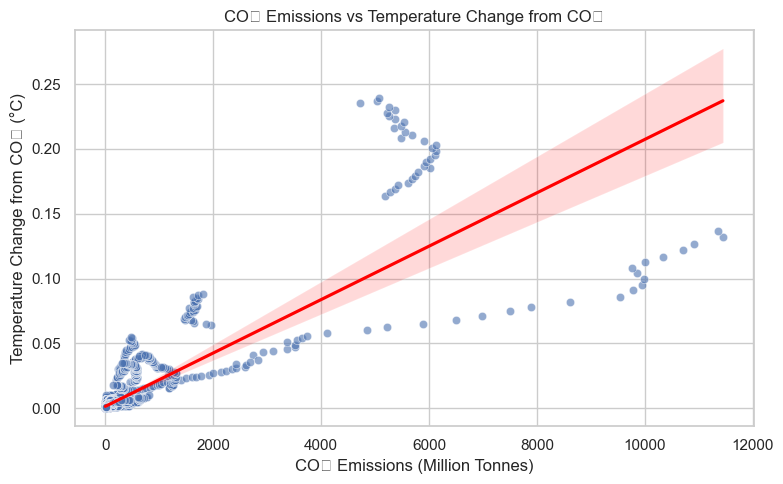

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid data
subset = df_final_92[
    df_final_92['Temp change from CO₂'].notnull() &
    df_final_92['CO₂ total'].notnull()
].copy()

# Calculate Pearson correlation
correlation = subset['Temp change from CO₂'].corr(subset['CO₂ total'], method='pearson')
print(f"Pearson Correlation between CO₂ emissions and temperature change: {correlation:.4f}")

# Plot the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=subset, x='CO₂ total', y='Temp change from CO₂', alpha=0.6)
sns.regplot(data=subset, x='CO₂ total', y='Temp change from CO₂', scatter=False, color='red')
plt.title("CO₂ Emissions vs Temperature Change from CO₂")
plt.xlabel("CO₂ Emissions (Million Tonnes)")
plt.ylabel("Temperature Change from CO₂ (°C)")
plt.tight_layout()
plt.show()


Statistical strength: A correlation above 0.8 is considered strong in most social and environmental sciences.

Causal intuition: While correlation doesn’t prove causation, this aligns with climate science findings that CO₂ is a major driver of global warming.

Policy relevance: Countries with high emissions are likely contributing more to temperature anomalies, which can inform climate negotiations and mitigation strategies.

# Time series analysis

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2611533657.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


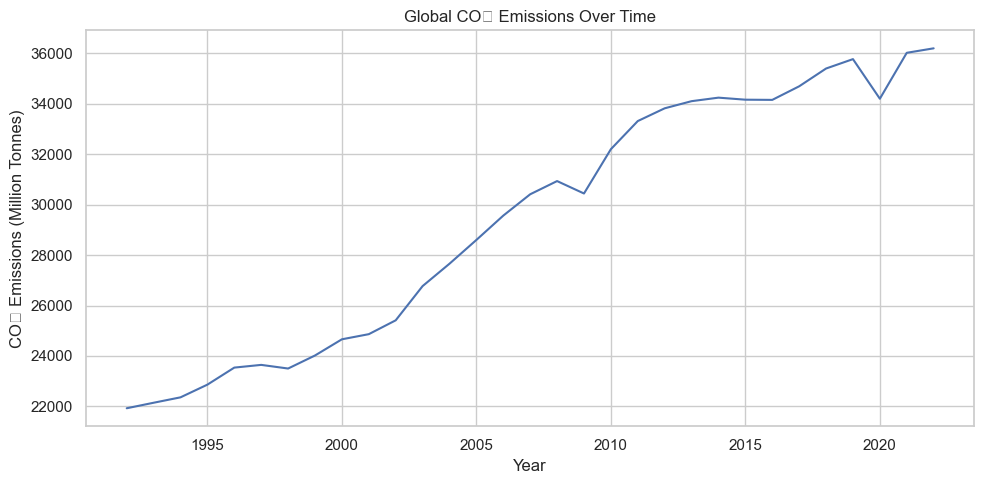

In [ ]:
import matplotlib.pyplot as plt

# Aggregate CO₂ emissions across all countries per year
global_emissions = (
    df_final_92[df_final_92['CO₂ total'].notna()]
    .groupby('year')['CO₂ total']
    .sum()
)

# Plot
plt.figure(figsize=(10, 5))
global_emissions.plot()
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/3024815416.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


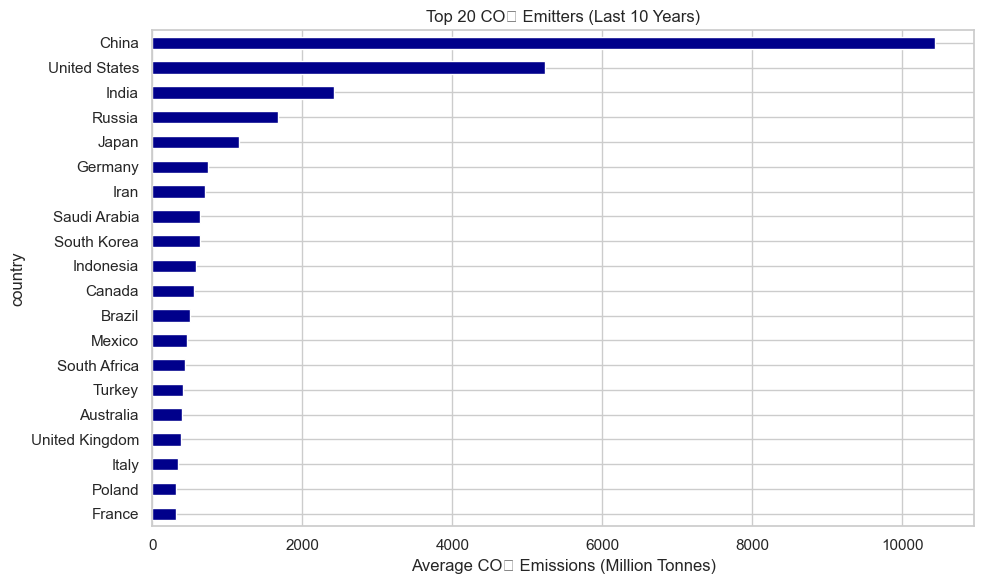

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/3024815416.py:34: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


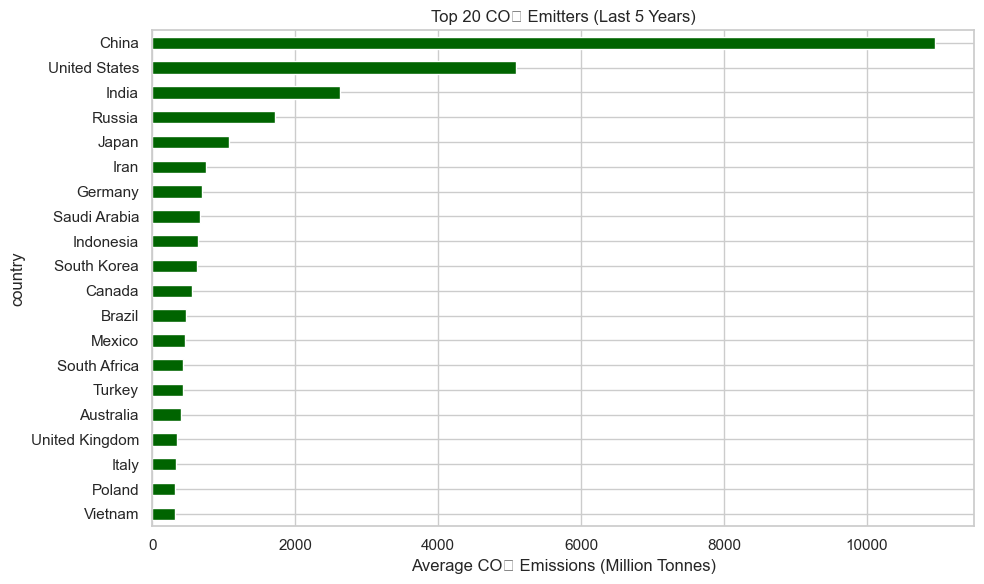

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/3024815416.py:51: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


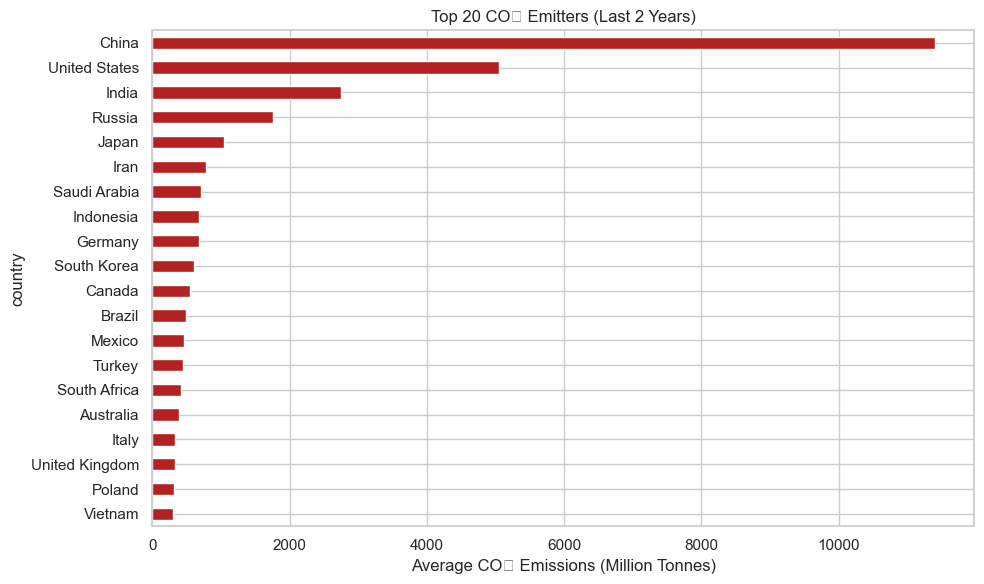

In [ ]:
import matplotlib.pyplot as plt

# --- Top 20 Emitters (Last 10 Years) ---
recent_10 = df_final_92[df_final_92['year'] >= df_final_92['year'].max() - 9]
top_10yr = (
    recent_10.groupby('country')['CO₂ total']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10, 6))
top_10yr.plot(kind='barh', color='darkblue')
plt.title("Top 20 CO₂ Emitters (Last 10 Years)")
plt.xlabel("Average CO₂ Emissions (Million Tonnes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Top 20 Emitters (Last 5 Years) ---
recent_5 = df_final_92[df_final_92['year'] >= df_final_92['year'].max() - 4]
top_5yr = (
    recent_5.groupby('country')['CO₂ total']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10, 6))
top_5yr.plot(kind='barh', color='darkgreen')
plt.title("Top 20 CO₂ Emitters (Last 5 Years)")
plt.xlabel("Average CO₂ Emissions (Million Tonnes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Top 20 Emitters (Last 2 Years) ---
recent_2 = df_final_92[df_final_92['year'] >= df_final_92['year'].max() - 1]
top_2yr = (
    recent_2.groupby('country')['CO₂ total']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10, 6))
top_2yr.plot(kind='barh', color='firebrick')
plt.title("Top 20 CO₂ Emitters (Last 2 Years)")
plt.xlabel("Average CO₂ Emissions (Million Tonnes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define time windows
max_year = df_final_92['year'].max()
windows = {
    'Last 10 Years': max_year - 9,
    'Last 5 Years': max_year - 4,
    'Last 2 Years': max_year - 1
}

# Create a dictionary to store top emitters for each window
top_emitters = {}

for label, start_year in windows.items():
    # Filter data for the time window
    recent = df_final_92[df_final_92['year'] >= start_year]
    
    # Compute average CO₂ emissions per country
    avg_emissions = (
        recent.groupby('country')['CO₂ total']
        .mean()
        .sort_values(ascending=False)
        .head(10)
    )
    
    # Store results
    top_emitters[label] = avg_emissions

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame(top_emitters)

# Round values for readability
comparison_df = comparison_df.round(2)

# Display the comparison table
print("Top 10 CO₂ Emitters Comparison:\n")
print(comparison_df)


Top 10 CO₂ Emitters Comparison:

               Last 10 Years  Last 5 Years  Last 2 Years
country                                                 
China               10433.02      10950.22      11399.23
Germany               747.63        693.70        675.12
India                2429.18       2626.58       2752.69
Indonesia             582.59        642.56        678.35
Iran                  699.92        752.45        790.25
Japan                1157.60       1076.61       1047.30
Russia               1678.47       1712.93       1757.09
Saudi Arabia          637.99        666.07        709.59
South Korea           632.26        626.41        609.08
United States        5231.61       5093.13       5055.54


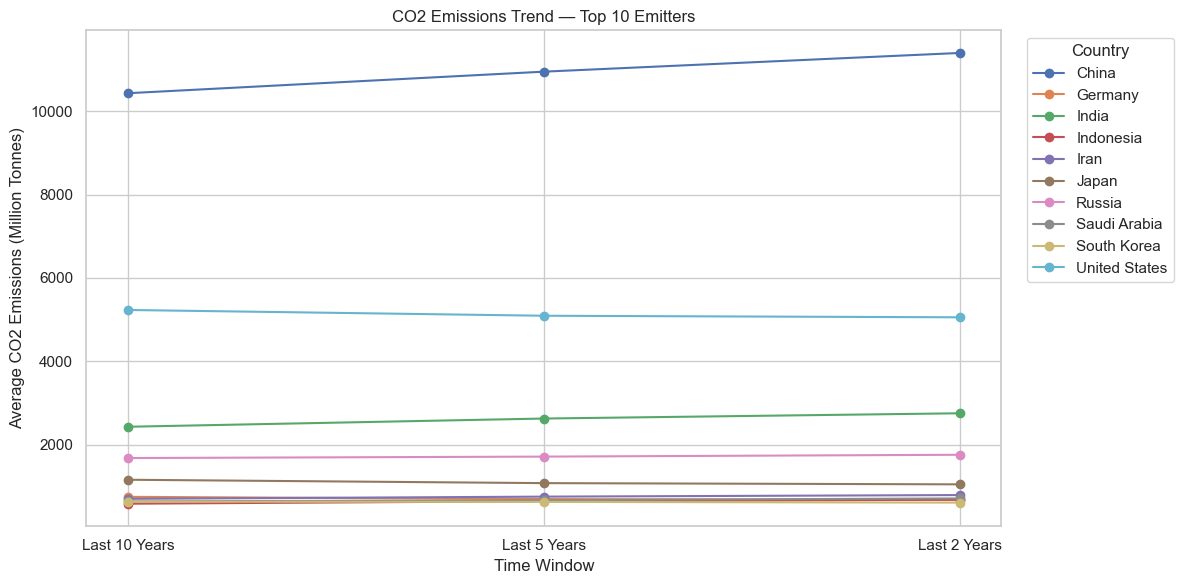

In [ ]:
import matplotlib.pyplot as plt

# Transpose for plotting
plot_df = comparison_df.T  # Years as rows, countries as columns

# Plot
plt.figure(figsize=(12, 6))
for country in plot_df.columns:
    plt.plot(plot_df.index, plot_df[country], marker='o', label=country)

plt.title("CO2 Emissions Trend — Top 10 Emitters")
plt.xlabel("Time Window")
plt.ylabel("Average CO2 Emissions (Million Tonnes)")
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


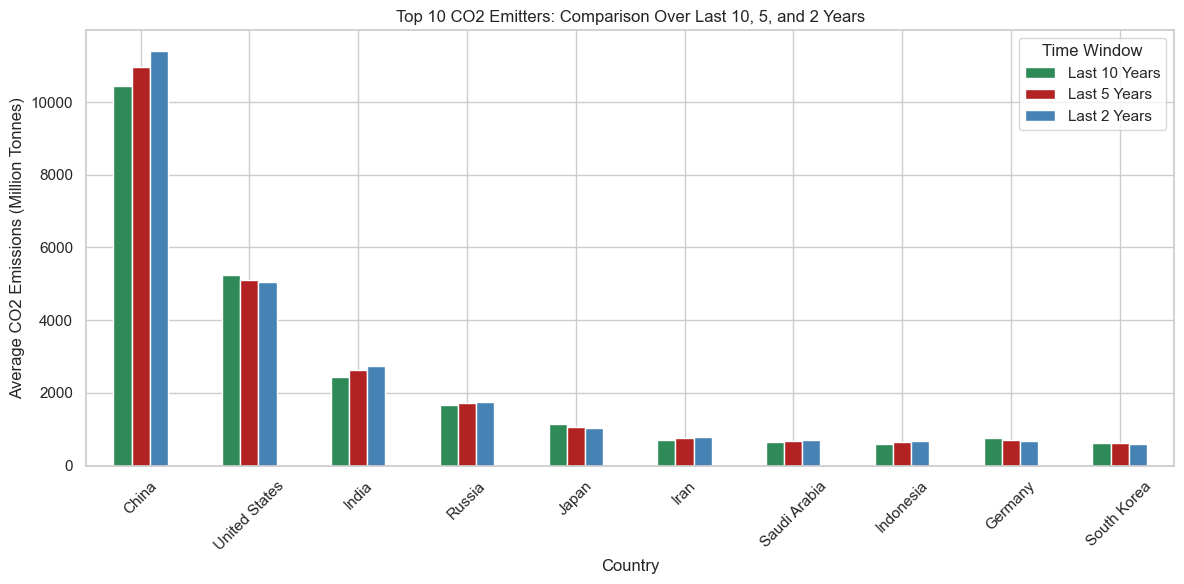

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time windows
max_year = df_final_92['year'].max()
windows = {
    'Last 10 Years': max_year - 9,
    'Last 5 Years': max_year - 4,
    'Last 2 Years': max_year - 1
}

# Collect top emitters for each window
top_emitters = {}

for label, start_year in windows.items():
    recent = df_final_92[df_final_92['year'] >= start_year]
    avg_emissions = recent.groupby('country')['CO₂ total'].mean()
    top_emitters[label] = avg_emissions

# Identify top 10 countries from the most recent window
top_countries = top_emitters['Last 2 Years'].sort_values(ascending=False).head(10).index

# Create comparison DataFrame
comparison_df = pd.DataFrame({label: data.loc[top_countries] for label, data in top_emitters.items()})
comparison_df = comparison_df.round(2)

# Plot grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), color=['#2E8B57', '#B22222', '#4682B4'])
plt.title("Top 10 CO2 Emitters: Comparison Over Last 10, 5, and 2 Years")
plt.ylabel("Average CO2 Emissions (Million Tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Time Window")
plt.tight_layout()
plt.show()


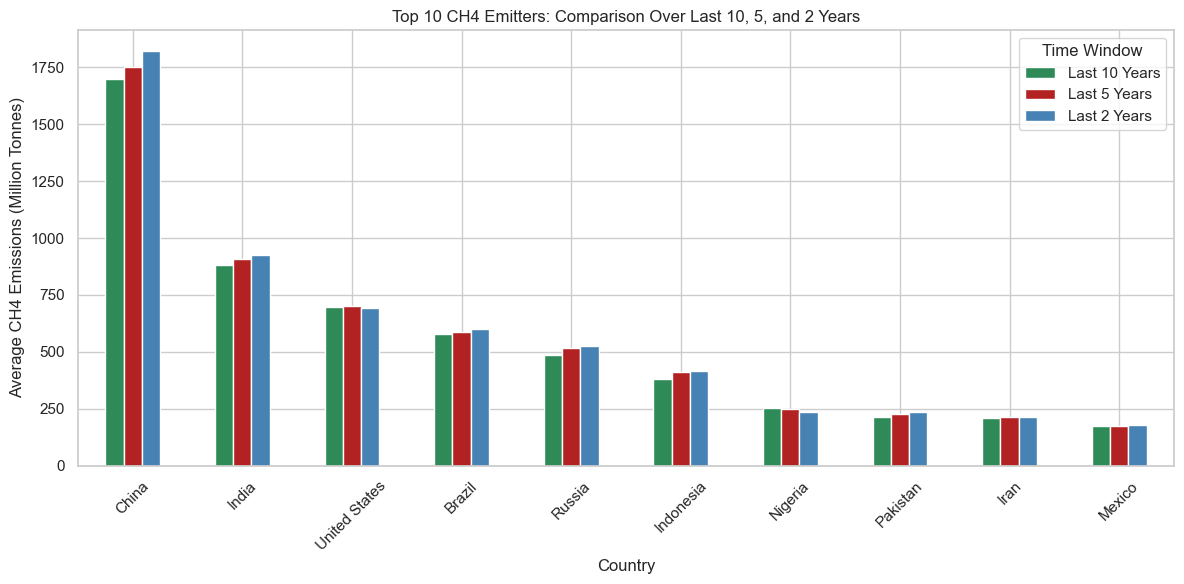

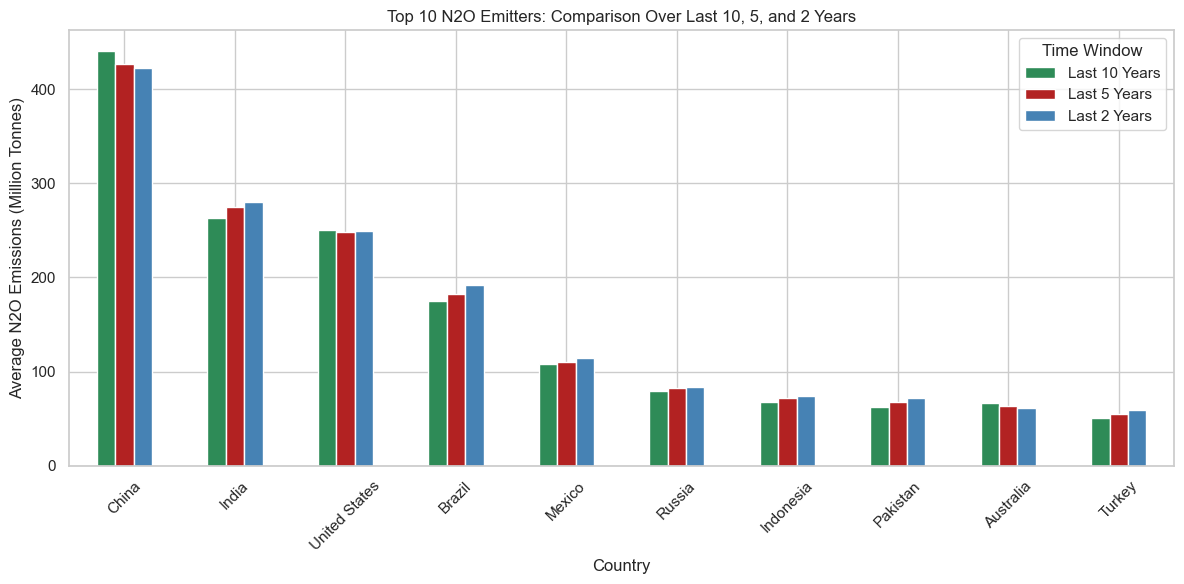

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time windows
max_year = df_final_92['year'].max()
windows = {
    'Last 10 Years': max_year - 9,
    'Last 5 Years': max_year - 4,
    'Last 2 Years': max_year - 1
}

# --- Methane (CH₄) ---
top_emitters_ch4 = {}
for label, start_year in windows.items():
    recent = df_final_92[df_final_92['year'] >= start_year]
    avg_emissions = recent.groupby('country')['CH₄ total'].mean()
    top_emitters_ch4[label] = avg_emissions

top_countries_ch4 = top_emitters_ch4['Last 2 Years'].sort_values(ascending=False).head(10).index
comparison_df_ch4 = pd.DataFrame({label: data.loc[top_countries_ch4] 
                                  for label, data in top_emitters_ch4.items()}).round(2)

comparison_df_ch4.plot(kind='bar', figsize=(12, 6), color=['#2E8B57', '#B22222', '#4682B4'])
plt.title("Top 10 CH4 Emitters: Comparison Over Last 10, 5, and 2 Years")
plt.ylabel("Average CH4 Emissions (Million Tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Time Window")
plt.tight_layout()
plt.show()

# --- Nitrous Oxide (N₂O) ---
top_emitters_n2o = {}
for label, start_year in windows.items():
    recent = df_final_92[df_final_92['year'] >= start_year]
    avg_emissions = recent.groupby('country')['N₂O total'].mean()
    top_emitters_n2o[label] = avg_emissions

top_countries_n2o = top_emitters_n2o['Last 2 Years'].sort_values(ascending=False).head(10).index
comparison_df_n2o = pd.DataFrame({label: data.loc[top_countries_n2o] 
                                  for label, data in top_emitters_n2o.items()}).round(2)

comparison_df_n2o.plot(kind='bar', figsize=(12, 6), color=['#2E8B57', '#B22222', '#4682B4'])
plt.title("Top 10 N2O Emitters: Comparison Over Last 10, 5, and 2 Years")
plt.ylabel("Average N2O Emissions (Million Tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Time Window")
plt.tight_layout()
plt.show()


In [ ]:
df_final_92.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               5921 non-null   object 
 1   iso_code              5921 non-null   object 
 2   year                  5921 non-null   int64  
 3   population            5921 non-null   float64
 4   gdp                   4959 non-null   float64
 5   CO₂ total             5826 non-null   float64
 6   CO₂ per capita        5826 non-null   float64
 7   CO₂ per GDP           4959 non-null   float64
 8   co2_per_unit_energy   5513 non-null   float64
 9   co2_growth_abs        5824 non-null   float64
 10  co2_growth_prct       5824 non-null   float64
 11  CO₂ from coal         4065 non-null   float64
 12  CO₂ from oil          5826 non-null   float64
 13  CO₂ from gas          3618 non-null   float64
 14  CO₂ from cement       5649 non-null   float64
 15  CO₂ from flaring     

In [ ]:
print(df_final_92.columns.tolist())


['country', 'iso_code', 'year', 'population', 'gdp', 'CO₂ total', 'CO₂ per capita', 'CO₂ per GDP', 'co2_per_unit_energy', 'co2_growth_abs', 'co2_growth_prct', 'CO₂ from coal', 'CO₂ from oil', 'CO₂ from gas', 'CO₂ from cement', 'CO₂ from flaring', 'CO₂ from land use', 'Energy consumption', 'Energy per capita', 'Energy per GDP', 'Total GHG', 'CH₄ total', 'N₂O total', 'Temp change from CO₂', 'Temp change from GHG']


In [ ]:
rename_dict = {
    'co2': 'CO₂ total',
    'co2_per_capita': 'CO₂ per capita',
    'co2_per_gdp': 'CO₂ per GDP',
    'coal_co2': 'CO₂ from coal',
    'oil_co2': 'CO₂ from oil',
    'gas_co2': 'CO₂ from gas',
    'cement_co2': 'CO₂ from cement',
    'flaring_co2': 'CO₂ from flaring',
    'land_use_change_co2': 'CO₂ from land use',
    'methane': 'CH₄ total',
    'nitrous_oxide': 'N₂O total',
    'total_ghg': 'Total GHG',
    'temperature_change_from_co2': 'Temp change from CO₂',
    'temperature_change_from_ghg': 'Temp change from GHG',
    'primary_energy_consumption': 'Energy consumption',
    'energy_per_capita': 'Energy per capita',
    'energy_per_gdp': 'Energy per GDP'
}

df_final_92.rename(columns=rename_dict, inplace=True)


In [ ]:
import pandas as pd

# Reload or build your cleaned dataset
df_final_92 = pd.read_csv("df_final_92.csv")

# Apply renaming if not already done
rename_dict = {
    'co2': 'CO₂ total',
    'co2_per_capita': 'CO₂ per capita',
    'co2_per_gdp': 'CO₂ per GDP',
    'coal_co2': 'CO₂ from coal',
    'oil_co2': 'CO₂ from oil',
    'gas_co2': 'CO₂ from gas',
    'cement_co2': 'CO₂ from cement',
    'flaring_co2': 'CO₂ from flaring',
    'land_use_change_co2': 'CO₂ from land use',
    'methane': 'CH₄ total',
    'nitrous_oxide': 'N₂O total',
    'total_ghg': 'Total GHG',
    'temperature_change_from_co2': 'Temp change from CO₂',
    'temperature_change_from_ghg': 'Temp change from GHG',
    'primary_energy_consumption': 'Energy consumption',
    'energy_per_capita': 'Energy per capita',
    'energy_per_gdp': 'Energy per GDP'
}
df_final_92.rename(columns=rename_dict, inplace=True)

# Set version manually
version = 1   # change to 2, 3, ... for each new export

# Save wide version
wide_filename = f"df_final_92_wide_v{version}.csv"
df_final_92.to_csv(wide_filename, index=False)

# Save long version
df_long = df_final_92.melt(
    id_vars=[
        'country', 'year', 'iso_code', 'population', 'gdp',
        'CO₂ total', 'CO₂ per capita', 'CO₂ per GDP', 'co2_per_unit_energy',
        'co2_growth_abs', 'co2_growth_prct',
        'Energy consumption', 'Energy per capita', 'Energy per GDP',
        'Total GHG', 'CH₄ total', 'N₂O total',
        'Temp change from CO₂', 'Temp change from GHG'
    ],
    value_vars=[
        'CO₂ from coal', 'CO₂ from oil', 'CO₂ from gas',
        'CO₂ from cement', 'CO₂ from flaring', 'CO₂ from land use'
    ],
    var_name='Sector',
    value_name='Sector emissions'
)
long_filename = f"df_final_92_long_v{version}.csv"
df_long.to_csv(long_filename, index=False)

print("Saved:", wide_filename, "and", long_filename)


Saved: df_final_92_wide_v1.csv and df_final_92_long_v1.csv


In [ ]:
import numpy as np
import pandas as pd

# Define CAGR function
def cagr(series, years):
    s = series.sort_index().dropna()
    if len(s) < years + 1:
        return np.nan
    start = s.iloc[-(years+1)]
    end = s.iloc[-1]
    if start <= 0 or end <= 0:
        return np.nan
    return (end / start) ** (1 / years) - 1

# Filter recent 6 years to compute 5-year CAGR
df_recent = df_final_92[df_final_92['year'] >= df_final_92['year'].max() - 5]

# Compute CAGRs per country
agg = []
for country, g in df_recent.groupby("country"):
    g = g.sort_values("year").set_index("year")
    row = {"country": country}
    row["gdp_cagr_5y"] = cagr(g["gdp"], 5)
    row["co2_cagr_5y"] = cagr(g["CO₂ total"], 5)
    agg.append(row)

df_cagr = pd.DataFrame(agg)

# Classify countries based on decoupling logic
df_cagr["decoupling_status"] = np.where(
    (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] < 0),
    "Decoupling Leader",
    np.where(
        (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] > 0),
        "CO₂ Growth Laggard",
        "Other"
    )
)

# Display results
df_cagr = df_cagr.sort_values("gdp_cagr_5y", ascending=False).round(4)
print(df_cagr)


        country  gdp_cagr_5y  co2_cagr_5y   decoupling_status
167  Tajikistan       0.0735       0.0551  CO₂ Growth Laggard
53     Ethiopia       0.0719       0.0051  CO₂ Growth Laggard
13   Bangladesh       0.0634       0.0564  CO₂ Growth Laggard
139      Rwanda       0.0634       0.0594  CO₂ Growth Laggard
18        Benin       0.0626       0.0074  CO₂ Growth Laggard
..          ...          ...          ...                 ...
162    Suriname          NaN       0.0171               Other
171       Tonga          NaN       0.0747               Other
176      Tuvalu          NaN       0.0000               Other
184     Vanuatu          NaN       0.0910               Other
185     Vatican          NaN          NaN               Other

[191 rows x 4 columns]


Top 20 columns by missing percentage:
CO₂ from gas            0.388955
CO₂ from coal           0.313461
Energy per GDP          0.181895
gdp                     0.162473
CO₂ per GDP             0.162473
co2_per_unit_energy     0.068907
Energy per capita       0.063841
Energy consumption      0.063841
CO₂ from flaring        0.053032
CO₂ from cement         0.045938
Total GHG               0.026178
CH₄ total               0.026178
N₂O total               0.020942
co2_growth_abs          0.016382
co2_growth_prct         0.016382
CO₂ from oil            0.016045
CO₂ per capita          0.016045
CO₂ total               0.016045
Temp change from CO₂    0.015707
Temp change from GHG    0.015707
dtype: float64


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_13402/2014034146.py:22: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/TEST Final project copy/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


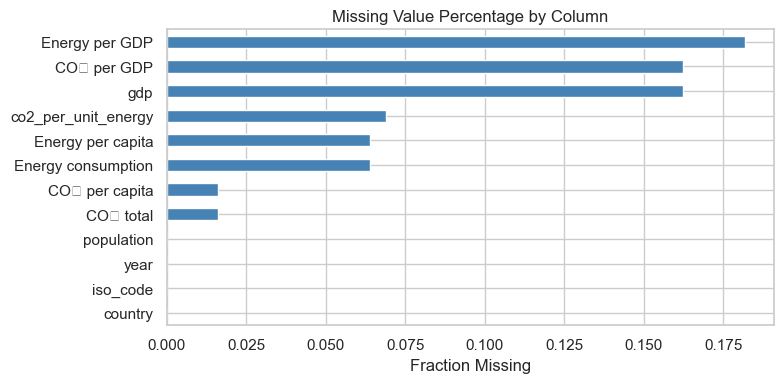

In [ ]:
# Step 5.1
#  Check overall missingness
null_pct = df.isna().mean().sort_values(ascending=False)
print("Top 20 columns by missing percentage:")
print(null_pct.head(20))

# Visualize missingness for key columns
import matplotlib.pyplot as plt

key_cols = [
    "country", "iso_code", "year", "population", "gdp",
    "CO₂ total", "CO₂ per capita", "CO₂ per GDP", "co2_per_unit_energy",
    "Energy consumption", "Energy per capita", "Energy per GDP"
]


missing_df = df[key_cols].isna().mean().sort_values()
plt.figure(figsize=(8,4))
missing_df.plot(kind="barh", color="steelblue")
plt.title("Missing Value Percentage by Column")
plt.xlabel("Fraction Missing")
plt.tight_layout()
plt.show()


In [ ]:
# Drop columns with >90% missing
drop_cols = null_pct[null_pct > 0.9].index.tolist()
df_cleaned = df.drop(columns=drop_cols)


In [ ]:
# Keep rows with valid country, year, CO₂, GDP, and population
essential = ["country", "iso_code", "year", "CO₂ total", "gdp", "population"]
df_cleaned = df_cleaned.dropna(subset=essential)
df_cleaned = df_cleaned[df_cleaned["iso_code"].astype(str).str.len() == 3]
df_cleaned["year"] = df_cleaned["year"].astype("int64")
df_recent = df_cleaned.query("year >= 1990").copy()



In [ ]:
# Score each row by how many key fields are missing
key_metrics = [
    "CO₂ total", "CO₂ per capita", "CO₂ per GDP", "co2_per_unit_energy",
    "Energy consumption", "Energy per capita", "Energy per GDP"
]

df_recent["missing_score"] = df_recent[key_metrics].isna().sum(axis=1)


In [ ]:
# Track dropped columns due to >90% missing
drop_threshold = 0.9
drop_cols = null_pct[null_pct > drop_threshold].index.tolist()

# Print for README inclusion
print(f"\nColumns dropped due to >{int(drop_threshold*100)}% missing values:")
for col in drop_cols:
    print(f"- {col}")



Columns dropped due to >90% missing values:


In [ ]:
# Step 5.2: Select relevant columns and filter to country-level data
keep_cols = [
    "country", "iso_code", "year",
    "CO₂ total", "co2_growth_abs", "co2_growth_prct",
    "CO₂ per capita", "CO₂ per GDP", "co2_per_unit_energy",
    "gdp", "population",
    "Energy consumption", "Energy per capita", "Energy per GDP",
    "CO₂ from cement", "CO₂ from coal", "CO₂ from oil", "CO₂ from gas"
]


df_trimmed = df[keep_cols].copy()

# Filter to country-level rows (3-letter ISO codes)
df_trimmed = df_trimmed[df_trimmed["iso_code"].astype(str).str.len() == 3]

# Drop rows missing critical fields
essential = ["country", "iso_code", "year", "CO₂ total", "gdp", "population"]
df_trimmed = df_trimmed.dropna(subset=essential)

# Convert year to integer
df_trimmed["year"] = df_trimmed["year"].astype("int64")

# Filter to analysis window (1990 onward)
df_recent = df_trimmed.query("year >= 1990").copy()


In [ ]:
# Step 6.1: Score each row by how many key metrics are missing
key_metrics = [
    "CO₂ total", "CO₂ per capita", "CO₂ per GDP", "co2_per_unit_energy",
    "Energy consumption", "Energy per capita", "Energy per GDP"
]

df_recent["missing_score"] = df_recent[key_metrics].isna().sum(axis=1)

# Print summary statistics
print("Missing score distribution:")
print(df_recent["missing_score"].value_counts().sort_index())

# Optional: show a few rows with high missingness
print("\nSample rows with high missing_score:")
print(df_recent[df_recent["missing_score"] > 3][["country", "year", "missing_score"]].head())


Missing score distribution:
missing_score
0    4844
4     115
Name: count, dtype: int64

Sample rows with high missing_score:
         country  year  missing_score
30   Afghanistan  2022              4
61       Albania  2022              4
154       Angola  2022              4
247      Armenia  2022              4
402      Bahrain  2022              4


In [ ]:
# Define the key metrics
key_metrics = [
    "CO₂ total", "CO₂ per capita", "CO₂ per GDP", "co2_per_unit_energy",
    "Energy consumption", "Energy per capita", "Energy per GDP"
]

# Check for missing values across these columns
missing_counts = df_recent[key_metrics].isna().sum()
total_rows = len(df_recent)
rows_with_missing = df_recent[key_metrics].isna().any(axis=1).sum()

# Print confirmation
print(f"Total rows in df_recent: {total_rows}")
print("Missing values per column:")
print(missing_counts)
print(f"\nRows with any missing value in key metrics: {rows_with_missing}")

if rows_with_missing == 0:
    print("\n✅ All rows have complete data for the specified key metrics.")
else:
    print("\n⚠️ Some rows have missing values in the key metrics.")


Total rows in df_recent: 4959
Missing values per column:
CO₂ total                0
CO₂ per capita           0
CO₂ per GDP              0
co2_per_unit_energy    115
Energy consumption     115
Energy per capita      115
Energy per GDP         115
dtype: int64

Rows with any missing value in key metrics: 115

⚠️ Some rows have missing values in the key metrics.


# Feature engineering – CAGR and flags (Compound Annual Growth Rate)

In [ ]:
# Step 7: Compute 5y and 10y CAGR for key metrics
def cagr(series, years):
    s = series.sort_index().dropna()
    if len(s) < years + 1:
        return np.nan
    start = s.iloc[-(years+1)]
    end = s.iloc[-1]
    if start <= 0 or end <= 0:
        return np.nan
    return (end / start) ** (1 / years) - 1

agg = []
for country, g in df_recent.groupby("country"):
    g = g.sort_values("year").set_index("year")
    row = {"country": country}
    for metric in ["co2", "co2_per_capita", "co2_per_gdp"]:
        row[f"{metric}_cagr_5y"] = cagr(g[metric], 5)
        row[f"{metric}_cagr_10y"] = cagr(g[metric], 10)
    agg.append(row)

df_cagr = pd.DataFrame(agg)

# Latest snapshot per country
df_latest = df_recent.sort_values("year").groupby("country").tail(1).copy()
df_feats = df_latest.merge(df_cagr, on="country", how="left")

# Rank and flag countries
df_feats["rank_co2_latest"] = df_feats["co2"].rank(ascending=False, method="min")
q75_gdp = df_feats["co2_per_gdp"].quantile(0.75)
q75_energy = df_feats["co2_per_unit_energy"].quantile(0.75)

df_feats["flag_high_intensity"] = (
    (df_feats["co2_per_gdp"] >= q75_gdp) | (df_feats["co2_per_unit_energy"] >= q75_energy)
)
df_feats["is_decarbonizing_5y"] = (
    (df_feats["co2_cagr_5y"] < 0) & (df_feats["co2_per_capita_cagr_5y"] < 0)
)

# Print sample output
print("\nSample of engineered features:")
print(df_feats[[
    "country", "year", "co2", "co2_per_capita", "co2_per_gdp",
    "co2_cagr_5y", "co2_per_capita_cagr_5y", "co2_per_gdp_cagr_5y",
    "rank_co2_latest", "flag_high_intensity", "is_decarbonizing_5y"
]].head())



Sample of engineered features:
      country  year      co2  co2_per_capita  co2_per_gdp  co2_cagr_5y  \
0   Argentina  2022  204.081           4.494        0.239     0.017745   
1     Finland  2022   36.367           6.530        0.161    -0.040238   
2  Cape Verde  2022    0.555           1.068        0.131    -0.007055   
3      Brazil  2022  483.841           2.301        0.152    -0.005858   
4     Ecuador  2022   40.522           2.273        0.232     0.006789   

   co2_per_capita_cagr_5y  co2_per_gdp_cagr_5y  rank_co2_latest  \
0                0.012661             0.018564             30.0   
1               -0.042342            -0.049937             68.0   
2               -0.009817            -0.030571            156.0   
3               -0.011176            -0.019818             12.0   
4               -0.005538             0.006146             64.0   

   flag_high_intensity  is_decarbonizing_5y  
0                False                False  
1                False      

In [ ]:
print(df_cagr.columns.tolist())


['country', 'co2_cagr_5y', 'co2_cagr_10y', 'co2_per_capita_cagr_5y', 'co2_per_capita_cagr_10y', 'co2_per_gdp_cagr_5y', 'co2_per_gdp_cagr_10y']


In [ ]:
# Compute GDP CAGR
gdp_cagr_list = []
for country, g in df_recent.groupby("country"):
    g = g.sort_values("year").set_index("year")
    gdp_cagr = cagr(g["gdp"], 5)
    gdp_cagr_list.append({"country": country, "gdp_cagr_5y": gdp_cagr})

df_gdp_cagr = pd.DataFrame(gdp_cagr_list)

# Merge GDP CAGR into df_cagr
df_cagr = df_cagr.merge(df_gdp_cagr, on="country", how="left")

# Add decoupling status
df_cagr["decoupling_status"] = np.where(
    (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] < 0),
    "Decoupling Leader",
    np.where(
        (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] > 0),
        "CO₂ Growth Laggard",
        "Other"
    )
)


In [ ]:
df_latest = df_recent.sort_values("year").groupby("country").tail(1).copy()

df_feats = df_latest.merge(
    df_cagr[["country", "gdp_cagr_5y", "co2_cagr_5y", "decoupling_status"]],
    on="country",
    how="left"
)


In [ ]:
# Step 7.0: Create df_feats from latest snapshot
df_latest = df_recent.sort_values("year").groupby("country").tail(1).copy()

# Merge with CAGR and decoupling status
df_feats = df_latest.merge(
    df_cagr[["country", "gdp_cagr_5y", "co2_cagr_5y", "decoupling_status"]],
    on="country",
    how="left"
)


In [ ]:
# Step 7.1: Compute GDP CAGR and Classify Decoupling Status

# Define CAGR function
def cagr(series, years):
    s = series.sort_index().dropna()
    if len(s) < years + 1:
        return np.nan
    start = s.iloc[-(years+1)]
    end = s.iloc[-1]
    if start <= 0 or end <= 0:
        return np.nan
    return (end / start) ** (1 / years) - 1

# Initialize list to collect rows
agg = []

# Loop through countries and compute CAGR
for country, g in df_recent.groupby("country"):
    g = g.sort_values("year").set_index("year")
    row = {"country": country}
    row["gdp_cagr_5y"] = cagr(g["gdp"], 5)
    row["co2_cagr_5y"] = cagr(g["co2"], 5)
    agg.append(row)

# Create df_cagr from aggregated results
df_cagr = pd.DataFrame(agg)

# Classify countries based on decoupling logic
df_cagr["decoupling_status"] = np.where(
    (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] < 0),
    "Decoupling Leader",
    np.where(
        (df_cagr["gdp_cagr_5y"] > 0) & (df_cagr["co2_cagr_5y"] > 0),
        "CO₂ Growth Laggard",
        "Other"
    )
)

# Merge decoupling status into df_feats
df_feats = df_feats.merge(
    df_cagr[["country", "gdp_cagr_5y", "co2_cagr_5y", "decoupling_status"]],
    on="country",
    how="left"
)


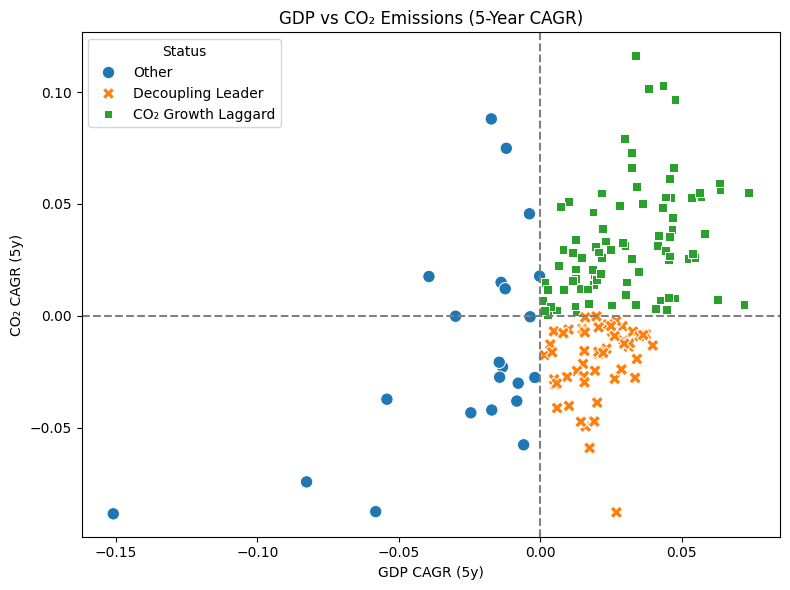

In [ ]:
#Visualize Decoupling Leaders vs Laggards
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cagr, x="gdp_cagr_5y", y="co2_cagr_5y", hue="decoupling_status", style="decoupling_status", s=80)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("GDP vs CO₂ Emissions (5-Year CAGR)")
plt.xlabel("GDP CAGR (5y)")
plt.ylabel("CO₂ CAGR (5y)")
plt.legend(title="Status")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Filter dataset for 1992–2022
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Drop rows with missing GDP or CO₂
df_clean = df_final_92.dropna(subset=['gdp', 'co2'])

# Step 1: Get first and last year values per country
gdp_co2_start = df_clean[df_clean['year'] == 1992].groupby('country')[['gdp', 'co2']].mean().rename(columns={'gdp': 'gdp_start', 'co2': 'co2_start'})
gdp_co2_end = df_clean[df_clean['year'] == 2022].groupby('country')[['gdp', 'co2']].mean().rename(columns={'gdp': 'gdp_end', 'co2': 'co2_end'})

# Step 2: Merge start and end values
growth_df = gdp_co2_start.merge(gdp_co2_end, on='country', how='inner')

# Step 3: Calculate CAGR
years = 2022 - 1992
growth_df['gdp_cagr'] = ((growth_df['gdp_end'] / growth_df['gdp_start']) ** (1 / years)) - 1
growth_df['co2_cagr'] = ((growth_df['co2_end'] / growth_df['co2_start']) ** (1 / years)) - 1

# Step 4: Flag decoupling countries
growth_df['decoupling'] = (growth_df['gdp_cagr'] > 0) & (growth_df['co2_cagr'] < 0)

# Step 5: Extract decoupling leaders
decoupling_leaders = growth_df[growth_df['decoupling']].sort_values('gdp_cagr', ascending=False)

# Display top decouplers
print("Decoupling Leaders (GDP↑, CO₂↓):")
print(decoupling_leaders[['gdp_cagr', 'co2_cagr']].round(4))


🌍 Decoupling Leaders (GDP↑, CO₂↓):
                 gdp_cagr  co2_cagr
country                            
Romania            0.0521   -0.0196
Azerbaijan         0.0490   -0.0109
Poland             0.0480   -0.0048
Malta              0.0425   -0.0085
Hungary            0.0375   -0.0109
Slovakia           0.0361   -0.0145
Czechia            0.0325   -0.0141
Georgia            0.0308   -0.0093
Russia             0.0295   -0.0029
Luxembourg         0.0287   -0.0171
Switzerland        0.0286   -0.0112
Serbia             0.0285   -0.0001
Lithuania          0.0279   -0.0165
Slovenia           0.0273   -0.0030
Sweden             0.0250   -0.0142
Latvia             0.0248   -0.0251
United States      0.0241   -0.0006
Bulgaria           0.0240   -0.0067
Netherlands        0.0239   -0.0098
Spain              0.0238   -0.0019
Estonia            0.0230   -0.0241
North Macedonia    0.0217   -0.0054
Denmark            0.0215   -0.0237
Finland            0.0208   -0.0133
Germany            0.0193   -

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_19198/2187065585.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/candela/Desktop/Final Project - Global CO2 Emissions/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


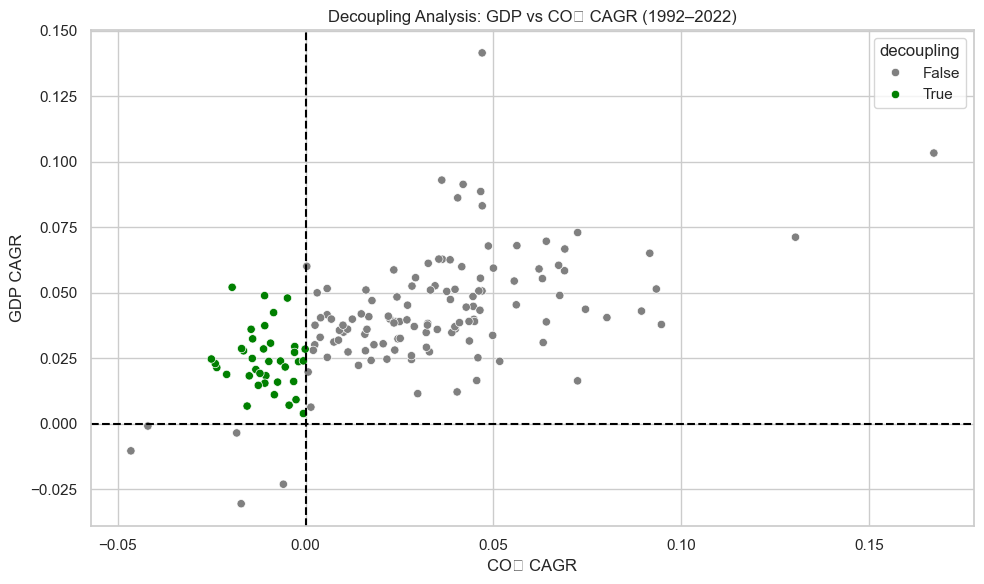

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=growth_df,
    x='co2_cagr',
    y='gdp_cagr',
    hue='decoupling',
    palette={True: 'green', False: 'gray'}
)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Decoupling Analysis: GDP vs CO2 CAGR (1992–2022)")
plt.xlabel("CO2 CAGR")
plt.ylabel("GDP CAGR")
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Filter dataset for 1992–2022
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Step 2: Drop missing values
df_clean = df_final_92.dropna(subset=['gdp', 'co2'])

# Step 3: Get start and end values
gdp_start = df_clean[df_clean['year'] == 1992].groupby('country')['gdp'].mean()
gdp_end = df_clean[df_clean['year'] == 2022].groupby('country')['gdp'].mean()
co2_start = df_clean[df_clean['year'] == 1992].groupby('country')['co2'].mean()
co2_end = df_clean[df_clean['year'] == 2022].groupby('country')['co2'].mean()

# Step 4: Combine into one DataFrame
growth_df = pd.DataFrame({
    'gdp_start': gdp_start,
    'gdp_end': gdp_end,
    'co2_start': co2_start,
    'co2_end': co2_end
}).dropna()
growth_df['co2_abs_reduction'] = growth_df['co2_start'] - growth_df['co2_end']


# Step 5: Calculate CAGR
years = 2022 - 1992
growth_df['gdp_cagr'] = ((growth_df['gdp_end'] / growth_df['gdp_start']) ** (1 / years)) - 1
growth_df['co2_cagr'] = ((growth_df['co2_end'] / growth_df['co2_start']) ** (1 / years)) - 1

# Step 6: Flag decouplers
growth_df['decoupling'] = (growth_df['gdp_cagr'] > 0) & (growth_df['co2_cagr'] < 0)

# Step 7: Rank by GDP size (2022)
growth_df['gdp_2022'] = growth_df['gdp_end']
top_decouplers = growth_df[growth_df['decoupling']].sort_values('gdp_2022', ascending=False)

# Step 8: Display results
print("Highest-impact decoupling countries:")
print(top_decouplers[['gdp_2022', 'gdp_cagr', 'co2_cagr']].round(4).head(10))
print("Highest-impact decoupling countries:")
print(top_decouplers[['gdp_2022', 'gdp_cagr', 'co2_cagr', 'co2_abs_reduction']].round(4).head(10))


Highest-impact decoupling countries:
                    gdp_2022  gdp_cagr  co2_cagr
country                                         
United States   1.949317e+13    0.0241   -0.0006
Japan           4.774495e+12    0.0071   -0.0044
Germany         3.909613e+12    0.0193   -0.0122
Russia          3.731441e+12    0.0295   -0.0029
France          2.671569e+12    0.0156   -0.0109
United Kingdom  2.615231e+12    0.0189   -0.0210
Italy           2.136009e+12    0.0111   -0.0083
Spain           1.625140e+12    0.0238   -0.0019
Poland          1.231021e+12    0.0480   -0.0048
Netherlands     8.796091e+11    0.0239   -0.0098
Highest-impact decoupling countries:
                    gdp_2022  gdp_cagr  co2_cagr  co2_abs_reduction
country                                                            
United States   1.949317e+13    0.0241   -0.0006             95.357
Japan           4.774495e+12    0.0071   -0.0044            146.205
Germany         3.909613e+12    0.0193   -0.0122            297.99

In [37]:
import pandas as pd

# Step 1: Filter dataset for 1992–2022
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Step 2: Drop missing values
df_clean = df_final_92.dropna(subset=['gdp', 'co2'])

# Step 3: Define two periods (1992–1997 vs 2018–2022)
period_1 = df_clean[(df_clean['year'] >= 1992) & (df_clean['year'] <= 1997)]
period_2 = df_clean[(df_clean['year'] >= 2018) & (df_clean['year'] <= 2022)]

# Step 4: Calculate average GDP and CO₂ for each period
gdp_p1 = period_1.groupby('country')['gdp'].mean()
gdp_p2 = period_2.groupby('country')['gdp'].mean()
co2_p1 = period_1.groupby('country')['co2'].mean()
co2_p2 = period_2.groupby('country')['co2'].mean()

# Step 5: Combine into one DataFrame
growth_df = pd.DataFrame({
    'gdp_p1': gdp_p1,
    'gdp_p2': gdp_p2,
    'co2_p1': co2_p1,
    'co2_p2': co2_p2
}).dropna()

# Step 6: Calculate absolute and CAGR changes
years = 5  # Each period spans 5 years
growth_df['co2_abs_reduction'] = growth_df['co2_p1'] - growth_df['co2_p2']
growth_df['gdp_cagr'] = ((growth_df['gdp_p2'] / growth_df['gdp_p1']) ** (1 / years)) - 1
growth_df['co2_cagr'] = ((growth_df['co2_p2'] / growth_df['co2_p1']) ** (1 / years)) - 1

# Step 7: Flag decouplers
growth_df['decoupling'] = (growth_df['gdp_cagr'] > 0) & (growth_df['co2_cagr'] < 0)

# Step 8: Rank by GDP size in recent period
growth_df['gdp_recent'] = growth_df['gdp_p2']
top_decouplers = growth_df[growth_df['decoupling']].sort_values('gdp_recent', ascending=False)

# Step 9: Add CO₂ reduction percentage
top_decouplers['co2_reduction_pct'] = ((top_decouplers['co2_abs_reduction'] / top_decouplers['co2_p1']) * 100).round(2)

# Prepare final display DataFrame
top_decouplers_display = top_decouplers[['co2_reduction_pct', 'co2_abs_reduction', 'gdp_recent']].copy()

# Reset index to bring 'country' into the DataFrame
top_decouplers_display = top_decouplers_display.reset_index()

# Display top 10 decouplers
print("Top decoupling countries (2018–2022 vs 1992–1997):")
print(top_decouplers_display[['country', 'co2_reduction_pct', 'co2_abs_reduction', 'gdp_recent']].head(10))


Top decoupling countries (2018–2022 vs 1992–1997):
          country  co2_reduction_pct  co2_abs_reduction    gdp_recent
0   United States               6.08         329.826200  1.865703e+13
1           Japan              11.67         142.220200  4.762699e+12
2         Germany              27.02         256.839200  3.845105e+12
3          France              22.84          89.792367  2.591208e+12
4  United Kingdom              40.09         231.365800  2.533872e+12
5           Italy              23.97         105.196400  2.068668e+12
6           Spain               5.98          15.190833  1.577763e+12
7          Poland              12.49          45.723733  1.139621e+12
8     Netherlands              17.97          31.275367  8.358003e+11
9     Switzerland              19.47           8.529600  5.409369e+11


In [38]:
print(growth_df.loc['Russia'][['gdp_cagr', 'co2_cagr', 'co2_abs_reduction']])


gdp_cagr              0.221835
co2_cagr              0.002112
co2_abs_reduction   -17.978567
Name: Russia, dtype: object


In [ ]:
#filtering countries that meet all three criteria (USA being a decoupler seems off)
#GDP CAGR > 0 → sustained economic growth
#CO₂ CAGR < –0.005 → at least 0.5% annual decline in emissions
#High GDP in 2022 → significant global economic footprint 

# Step 1: Filter dataset for 1992–2022
df_final_92 = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 2022)].copy()

# Step 2: Drop missing values
df_clean = df_final_92.dropna(subset=['gdp', 'co2'])

# Step 3: Get start and end values
gdp_start = df_clean[df_clean['year'] == 1992].groupby('country')['gdp'].mean()
gdp_end = df_clean[df_clean['year'] == 2022].groupby('country')['gdp'].mean()
co2_start = df_clean[df_clean['year'] == 1992].groupby('country')['co2'].mean()
co2_end = df_clean[df_clean['year'] == 2022].groupby('country')['co2'].mean()

# Step 4: Combine into one DataFrame
growth_df = pd.DataFrame({
    'gdp_start': gdp_start,
    'gdp_end': gdp_end,
    'co2_start': co2_start,
    'co2_end': co2_end
}).dropna()

# Step 5: Calculate CAGR
years = 2022 - 1992
growth_df['gdp_cagr'] = ((growth_df['gdp_end'] / growth_df['gdp_start']) ** (1 / years)) - 1
growth_df['co2_cagr'] = ((growth_df['co2_end'] / growth_df['co2_start']) ** (1 / years)) - 1
growth_df['gdp_2022'] = growth_df['gdp_end']

# Step 6: Apply refined decoupling criteria
refined_decouplers = growth_df[
    (growth_df['gdp_cagr'] > 0) &
    (growth_df['co2_cagr'] < -0.005)
].sort_values('gdp_2022', ascending=False)

# Step 7: Display top decouplers by GDP
print("True Decoupling Countries (GDP↑, CO₂↓ ≥ 0.5% annually):")
print(refined_decouplers[['gdp_2022', 'gdp_cagr', 'co2_cagr']].round(4).head(10))


🌍 True Decoupling Countries (GDP↑, CO₂↓ ≥ 0.5% annually):
                    gdp_2022  gdp_cagr  co2_cagr
country                                         
Germany         3.909613e+12    0.0193   -0.0122
France          2.671569e+12    0.0156   -0.0109
United Kingdom  2.615231e+12    0.0189   -0.0210
Italy           2.136009e+12    0.0111   -0.0083
Netherlands     8.796091e+11    0.0239   -0.0098
Switzerland     5.593850e+11    0.0286   -0.0112
Romania         5.047417e+11    0.0521   -0.0196
Sweden          4.942145e+11    0.0250   -0.0142
Belgium         4.896784e+11    0.0184   -0.0106
Czechia         3.429668e+11    0.0325   -0.0141


# Choosing 500 billion USD Minimum GDP and a minimum reduction of 40% emissions

In [ ]:
import pandas as pd

# Load dataset
df_final = pd.read_csv("df_final_92.csv")

# Step 1: Filter for the two 5-year periods
early_period = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 1995)].copy()
recent_period = df_final[(df_final['year'] >= 2018) & (df_final['year'] <= 2022)].copy()

# Step 2: Drop missing CO₂ values
early_period = early_period.dropna(subset=['co2'])
recent_period = recent_period.dropna(subset=['co2'])

# Step 3: Calculate average CO₂ emissions per country for each period
co2_early_avg = early_period.groupby('country')['co2'].mean()
co2_recent_avg = recent_period.groupby('country')['co2'].mean()

# Step 4: Combine into one DataFrame
co2_periods_df = pd.DataFrame({
    'co2_early_avg': co2_early_avg,
    'co2_recent_avg': co2_recent_avg
}).dropna()

co2_periods_df['co2_abs_reduction'] = co2_periods_df['co2_early_avg'] - co2_periods_df['co2_recent_avg']

# Step 5: Calculate percentage reduction
co2_periods_df['co2_reduction_pct'] = ((co2_periods_df['co2_early_avg'] - co2_periods_df['co2_recent_avg']) / co2_periods_df['co2_early_avg']) * 100

# Step 6: Get GDP for 2022
gdp_2022 = df_final[df_final['year'] == 2022][['country', 'gdp']].dropna()

# Step 7: Merge CO₂ reduction with GDP
merged_df = co2_periods_df.merge(gdp_2022, on='country')

# Step 8: Filter for GDP ≥ 500 billion and CO₂ reduction ≥ 20%
filtered_decouplers = merged_df[(merged_df['gdp'] >= 5.0e11) & (merged_df['co2_reduction_pct'] >= 20)]

# Step 9: Sort by CO₂ reduction
top_decouplers = filtered_decouplers.sort_values(by='co2_reduction_pct', ascending=False)

# Step 10: Display results
print("Countries with GDP ≥ $500B and ≥ 20% CO₂ Reduction (1992–1995 vs 2018–2022):")
print(top_decouplers[['country', 'co2_reduction_pct', 'gdp']].round(2))

print("Countries with GDP ≥ $500B and ≥ 20% CO₂ Reduction (1992–1995 vs 2018–2022):")
print(top_decouplers[['country', 'co2_reduction_pct', 'co2_abs_reduction', 'gdp']].round(2))


Countries with GDP ≥ $500B and ≥ 20% CO₂ Reduction (1992–1995 vs 2018–2022):
            country  co2_reduction_pct           gdp
151  United Kingdom              40.21  2.615231e+12
119         Romania              39.38  5.047417e+11
52          Germany              27.21  3.909613e+12
68            Italy              23.37  2.136009e+12
48           France              22.31  2.671569e+12
Countries with GDP ≥ $500B and ≥ 20% CO₂ Reduction (1992–1995 vs 2018–2022):
            country  co2_reduction_pct  co2_abs_reduction           gdp
151  United Kingdom              40.21             232.59  2.615231e+12
119         Romania              39.38              49.38  5.047417e+11
52          Germany              27.21             259.31  3.909613e+12
68            Italy              23.37             101.74  2.136009e+12
48           France              22.31              87.09  2.671569e+12


# Choosing 2 trillion USD Minimum GDP and a minimum reduction of 10% emissions

In [1]:
import pandas as pd

# Load dataset
df_final = pd.read_csv("df_final_92.csv")

# Step 1: Filter for the two 5-year periods
early_period = df_final[(df_final['year'] >= 1992) & (df_final['year'] <= 1996)].copy()
recent_period = df_final[(df_final['year'] >= 2018) & (df_final['year'] <= 2022)].copy()

# Step 2: Drop missing CO₂ values
early_period = early_period.dropna(subset=['co2'])
recent_period = recent_period.dropna(subset=['co2'])

# Step 3: Calculate average CO₂ emissions per country for each period
co2_early_avg = early_period.groupby('country')['co2'].mean()
co2_recent_avg = recent_period.groupby('country')['co2'].mean()

# Step 4: Combine into one DataFrame
co2_periods_df = pd.DataFrame({
    'co2_early_avg': co2_early_avg,
    'co2_recent_avg': co2_recent_avg
}).dropna()

# Step 5: Calculate absolute and percentage reduction
co2_periods_df['co2_abs_reduction'] = co2_periods_df['co2_early_avg'] - co2_periods_df['co2_recent_avg']
co2_periods_df['co2_reduction_pct'] = (co2_periods_df['co2_abs_reduction'] / co2_periods_df['co2_early_avg']) * 100

# Step 6: Get GDP for 2022
gdp_2022 = df_final[df_final['year'] == 2022][['country', 'gdp']].dropna()

# Step 7: Merge CO₂ reduction with GDP
merged_df = co2_periods_df.merge(gdp_2022, on='country')

# Step 8: Filter for GDP ≥ $2 trillion and CO₂ reduction ≥ 10%
filtered_decouplers = merged_df[(merged_df['gdp'] >= 2.0e12) & (merged_df['co2_reduction_pct'] >= 10)]

# Step 9: Sort by CO₂ reduction percentage
top_decouplers = filtered_decouplers.sort_values(by='co2_reduction_pct', ascending=False)

# Step 10: Display results
print("Countries with GDP ≥ $2T and ≥ 10% CO₂ Reduction (1992–1996 vs 2018–2022):")
print(top_decouplers[['country', 'co2_reduction_pct', 'co2_abs_reduction', 'gdp']].round(2))


Countries with GDP ≥ $2T and ≥ 10% CO₂ Reduction (1992–1996 vs 2018–2022):
            country  co2_reduction_pct  co2_abs_reduction           gdp
151  United Kingdom              40.38             234.26  2.615231e+12
52          Germany              27.31             260.64  3.909613e+12
68            Italy              23.63             103.24  2.136009e+12
48           France              22.77              89.44  2.671569e+12
70            Japan              11.30             137.11  4.774495e+12


# Global CO2 Emissions Share

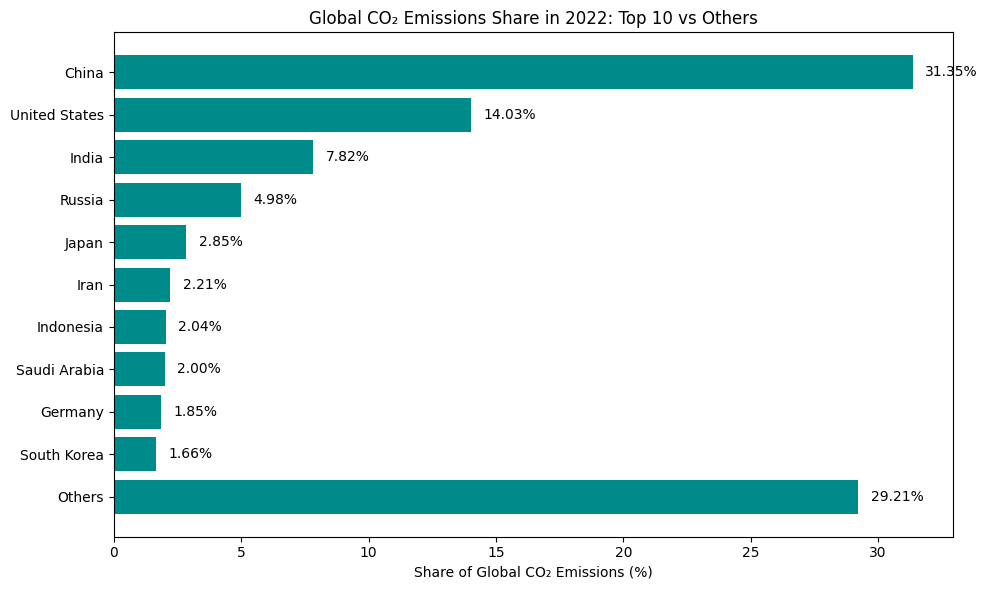

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("df_final_92.csv")

# Filter for the year 2022 and drop rows with missing CO₂ values
df_2022 = df[df["year"] == 2022].dropna(subset=["co2"])

# Calculate total global CO₂ emissions
global_total = df_2022["co2"].sum()

# Compute each country's share of global emissions
df_2022["co2_share_percent"] = (df_2022["co2"] / global_total) * 100

# Sort and select top 10 emitters
top10 = df_2022.sort_values(by="co2_share_percent", ascending=False).head(10)

# Calculate 'Others' share
others_share = 100 - top10["co2_share_percent"].sum()

# Create a new DataFrame for plotting
plot_df = top10[["country", "co2_share_percent"]].copy()
plot_df.loc[len(plot_df.index)] = ["Others", others_share]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df["country"], plot_df["co2_share_percent"], color="darkcyan")
plt.xlabel("Share of Global CO₂ Emissions (%)")
plt.title("Global CO₂ Emissions Share in 2022: Top 10 vs Others")
plt.gca().invert_yaxis()

# Add percentage labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.2f}%", va='center')

plt.tight_layout()
plt.show()


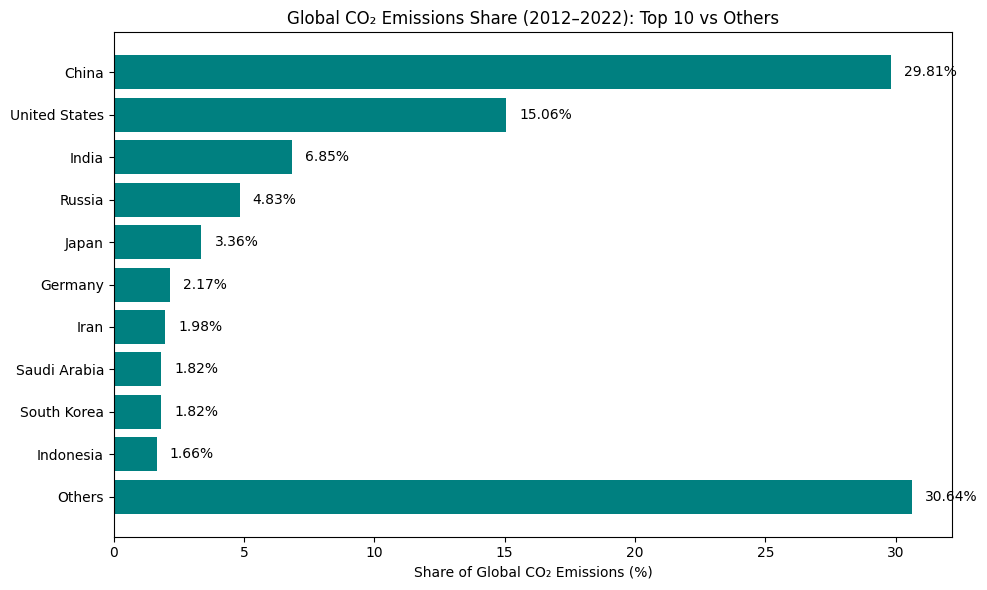

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("df_final_92.csv")

# Filter for years 2012 to 2022 and drop missing CO₂ values
df_filtered = df[(df["year"] >= 2012) & (df["year"] <= 2022)].dropna(subset=["co2"])

# Aggregate total CO₂ emissions by country
country_totals = df_filtered.groupby("country")["co2"].sum().reset_index()

# Calculate global total emissions
global_total = country_totals["co2"].sum()

# Compute each country's share
country_totals["co2_share_percent"] = (country_totals["co2"] / global_total) * 100

# Sort and select top 10 emitters
top10 = country_totals.sort_values(by="co2_share_percent", ascending=False).head(10)

# Calculate 'Others' share
others_share = 100 - top10["co2_share_percent"].sum()

# Create a new DataFrame for plotting
plot_df = top10[["country", "co2_share_percent"]].copy()
plot_df.loc[len(plot_df.index)] = ["Others", others_share]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df["country"], plot_df["co2_share_percent"], color="teal")
plt.xlabel("Share of Global CO₂ Emissions (%)")
plt.title("Global CO₂ Emissions Share (2012–2022): Top 10 vs Others")
plt.gca().invert_yaxis()

# Add percentage labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.2f}%", va='center')

plt.tight_layout()
plt.show()


# Export cleaned data for SQL and dashboard

In [ ]:
# Export cleaned long-format data
df_recent.to_csv("co2_cleaned_long.csv", index=False)

# Export latest snapshot with KPIs
df_feats.to_csv("co2_latest_kpis.csv", index=False)

# Save to SQLite for SQL analysis
conn = sqlite3.connect("co2_case_study.db")
df_recent.to_sql("co2_long", conn, if_exists="replace", index=False)
df_feats.to_sql("co2_country_latest", conn, if_exists="replace", index=False)



164